In [ ]:
!pip install ipythonblocks

In [82]:
import random

class Pokemon(Agent):
    def __init__(self, name, type_):
        super().__init__(program=self.program)
        self.name = name
        self.type = type_
        self.wins = 0
        self.alive = True
        self.location = None
        self.in_battle = False

    def __str__(self):
        return f"{self.name} [{self.type}]"

    def add_win(self):
        self.wins += 1

    def program(self, percept):
        return "move"

def battle(pokemon1, pokemon2):
    ventaja = {
        "fuego": {"fuego": 0.5, "agua": 0.2, "planta": 0.8, "eléctrico": 0.5, "tierra": 0.5, "roca": 0.2, "volador": 0.8, "fantasma": 0.5, "psiquico": 0.2, "lucha": 0.5, "normal": 0.5},
        "agua": {"fuego": 0.8, "agua": 0.5, "planta": 0.2, "eléctrico": 0.5, "tierra": 0.8, "roca": 0.8, "volador": 0.5, "fantasma": 0.5, "psiquico": 0.2, "lucha": 0.5, "normal": 0.5},
        "planta": {"fuego": 0.2, "agua": 0.8, "planta": 0.5, "eléctrico": 0.5, "tierra": 0.8, "roca": 0.8, "volador": 0.5, "fantasma": 0.5, "psiquico": 0.2, "lucha": 0.5, "normal": 0.5},
        "eléctrico": {"fuego": 0.5, "agua": 0.5, "planta": 0.5, "eléctrico": 0.5, "tierra": 0.8, "roca": 0.2, "volador": 0.5, "fantasma": 0.5, "psiquico": 0.5, "lucha": 0.5, "normal": 0.5},
        "tierra": {"fuego": 0.5, "agua": 0.2, "planta": 0.2, "eléctrico": 0.8, "tierra": 0.5, "roca": 0.8, "volador": 0.2, "fantasma": 0.5, "psiquico": 0.5, "lucha": 0.5, "normal": 0.5},
        "roca": {"fuego": 0.8, "agua": 0.5, "planta": 0.5, "eléctrico": 0.8, "tierra": 0.5, "roca": 0.5, "volador": 0.8, "fantasma": 0.5, "psiquico": 0.5, "lucha": 0.5, "normal": 0.5},
        "volador": {"fuego": 0.2, "agua": 0.8, "planta": 0.8, "eléctrico": 0.5, "tierra": 0.8, "roca": 0.2, "volador": 0.5, "fantasma": 0.5, "psiquico": 0.5, "lucha": 0.5, "normal": 0.5},
        "fantasma": {"fuego": 0.5, "agua": 0.5, "planta": 0.5, "eléctrico": 0.5, "tierra": 0.5, "roca": 0.5, "volador": 0.5, "fantasma": 0.5, "psiquico": 0.8, "lucha": 0.2, "normal": 0.2},
        "psiquico": {"fuego": 0.8, "agua": 0.8, "planta": 0.8, "eléctrico": 0.5, "tierra": 0.5, "roca": 0.5, "volador": 0.5, "fantasma": 0.2, "psiquico": 0.5, "lucha": 0.2, "normal": 0.2},
        "lucha": {"fuego": 0.5, "agua": 0.5, "planta": 0.5, "eléctrico": 0.5, "tierra": 0.5, "roca": 0.5, "volador": 0.8, "fantasma": 0.8, "psiquico": 0.8, "lucha": 0.5, "normal": 0.5},
        "normal": {"fuego": 0.5, "agua": 0.5, "planta": 0.5, "eléctrico": 0.5, "tierra": 0.5, "roca": 0.5, "volador": 0.5, "fantasma": 0.5, "psiquico": 0.5, "lucha": 0.5, "normal": 0.5}
    }

    prob_poke1_gana = ventaja[pokemon1.type][pokemon2.type]
    winner = pokemon1 if random.random() < prob_poke1_gana else pokemon2
    return winner


In [83]:
from utils import *
from agents import *
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class Park2D(Environment):
    def __init__(self, width, height):
        super().__init__()
        self.width = width
        self.height = height
        self.to_remove = []
        self.grid = [[None for _ in range(width)] for _ in range(height)]
        self.pokemons = []

    def add_thing(self, thing, location):
        super().add_thing(thing, location)
        x, y = location
        self.grid[y][x] = thing
        thing.location = location
        self.pokemons.append(thing)

    def move_thing(self, thing, new_location):
        x, y = thing.location
        self.grid[y][x] = None

        x, y = new_location
        self.grid[y][x] = thing
        thing.location = new_location

    def step(self):
      self.to_remove = []
      for pokemon in self.pokemons:
          if pokemon and pokemon.alive and not pokemon.in_battle:
              self.execute_action(pokemon, pokemon.program(None))
      for pokemon in self.to_remove:
          if pokemon in self.pokemons:
              self.pokemons.remove(pokemon)
      self.unlock_all_pokemons()

    def execute_action(self, agent, action):
      if action == "move":
          neighbors = self.get_neighbors(agent.location)
          if any(self.grid[ny][nx] and not self.grid[ny][nx].in_battle for nx, ny in neighbors):
              for nx, ny in neighbors:
                  if self.grid[ny][nx] and self.grid[ny][nx].alive and not self.grid[ny][nx].in_battle:
                      opponent = self.grid[ny][nx]
                      agent.in_battle = True
                      opponent.in_battle = True
                      winner = battle(agent, opponent)
                      winner.add_win()
                      loser = agent if winner == opponent else opponent
                      loser.alive = False
                      x, y = loser.location
                      self.grid[y][x] = None
                      if loser == agent:
                          if agent in self.pokemons:
                              self.to_remove.append(agent)
                          else:
                              print(f"Error: {agent} not found in pokemons list.")
                              print(f"Current pokemons: {self.pokemons}")
                      else:
                          if opponent in self.pokemons:
                              self.to_remove.append(opponent)
                          else:
                              print(f"Error: {opponent} not found in pokemons list.")
                              print(f"Current pokemons: {self.pokemons}")
          else:
              direction = random.choice(["up", "down", "left", "right"])
              x, y = agent.location
              new_location = None
              if direction == "up" and y > 0:
                  new_location = (x, y - 1)
              elif direction == "down" and y < self.height - 1:
                  new_location = (x, y + 1)
              elif direction == "left" and x > 0:
                  new_location = (x - 1, y)
              elif direction == "right" and x < self.width - 1:
                  new_location = (x + 1, y)
              else:
                  return

              if new_location and self.grid[new_location[1]][new_location[0]] is None:
                  self.move_thing(agent, new_location)


    def get_neighbors(self, location):
        x, y = location
        neighbors = []
        if y > 0:
            neighbors.append((x, y - 1))
        if y < self.height - 1:
            neighbors.append((x, y + 1))
        if x > 0:
            neighbors.append((x - 1, y))
        if x < self.width - 1:
            neighbors.append((x + 1, y))
        return neighbors

    def is_done(self):
        return all(pokemon is None or pokemon.alive for pokemon in self.pokemons)

    def unlock_all_pokemons(self):
        for pokemon in self.pokemons:
            if pokemon:
                pokemon.in_battle = False

    def visualize(self):
        colors = {"fuego": 1, "agua": 2, "planta": 3, "eléctrico": 4, "tierra": 5, "roca": 6, "volador": 7, "fantasma": 8, "psiquico": 9, "lucha": 10, "normal": 11, None: 0}
        cmap = ListedColormap(["white", "red", "blue", "green", "yellow", "brown", "grey", "orange", "purple", "pink", "black", "cyan"])

        grid_colors = [[colors[self.grid[y][x].type] if self.grid[y][x] else 0 for x in range(self.width)] for y in range(self.height)]
        plt.figure(figsize=(10, 10))
        plt.imshow(grid_colors, cmap=cmap, origin="upper")
        plt.title("Pokémon Simulation")
        plt.show()



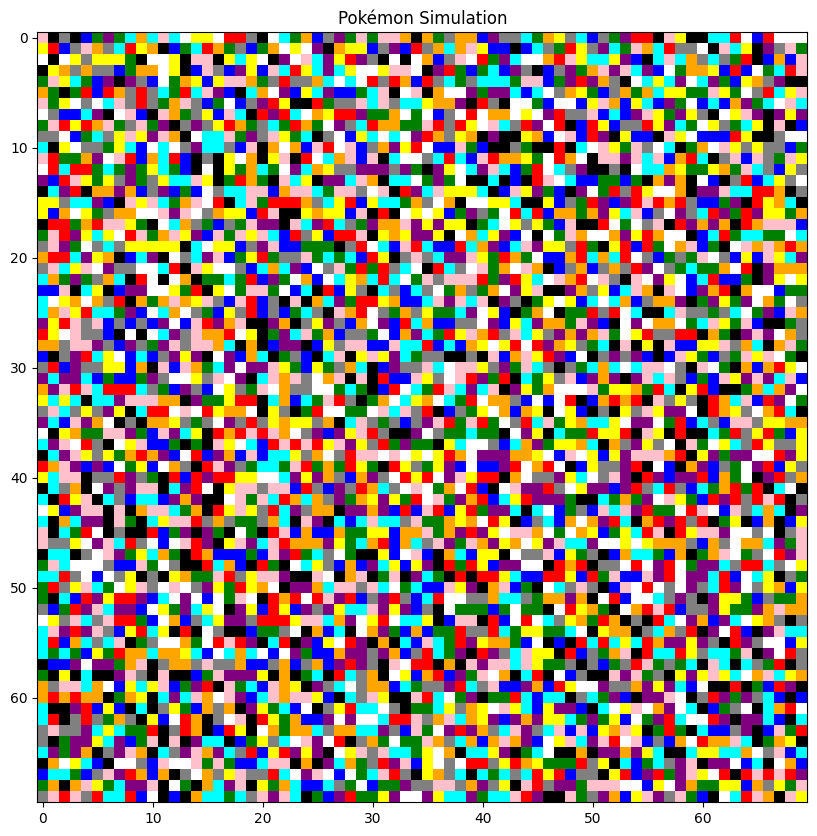

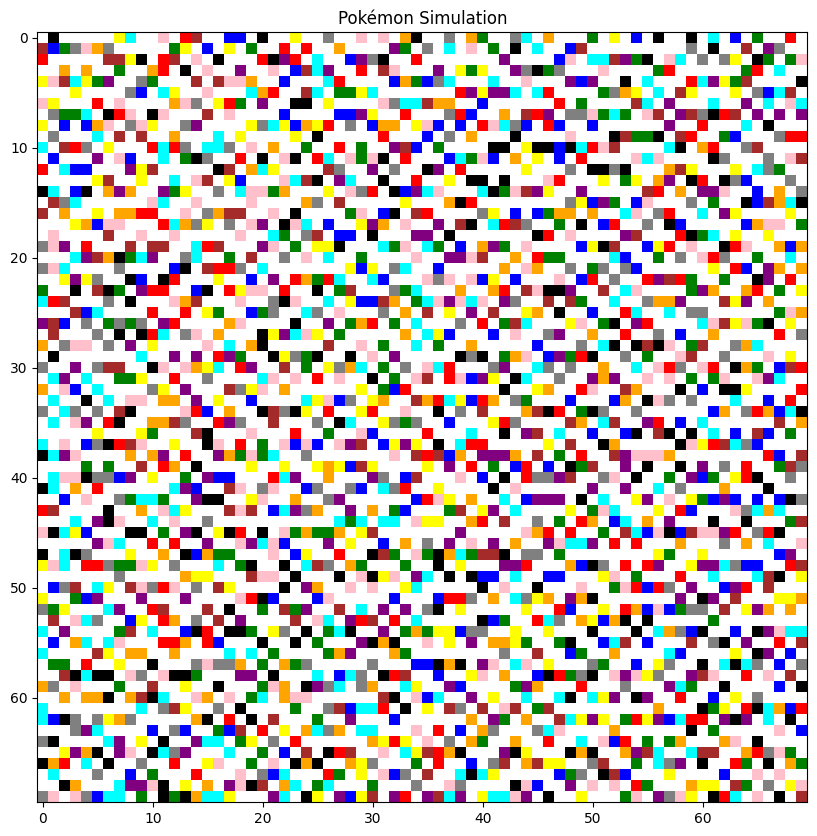

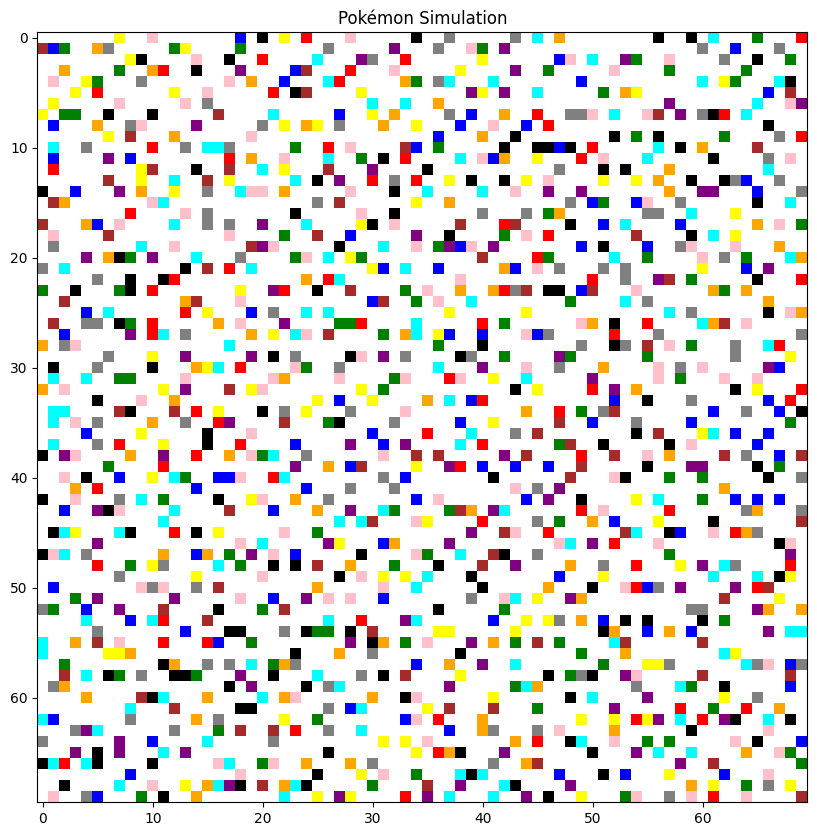

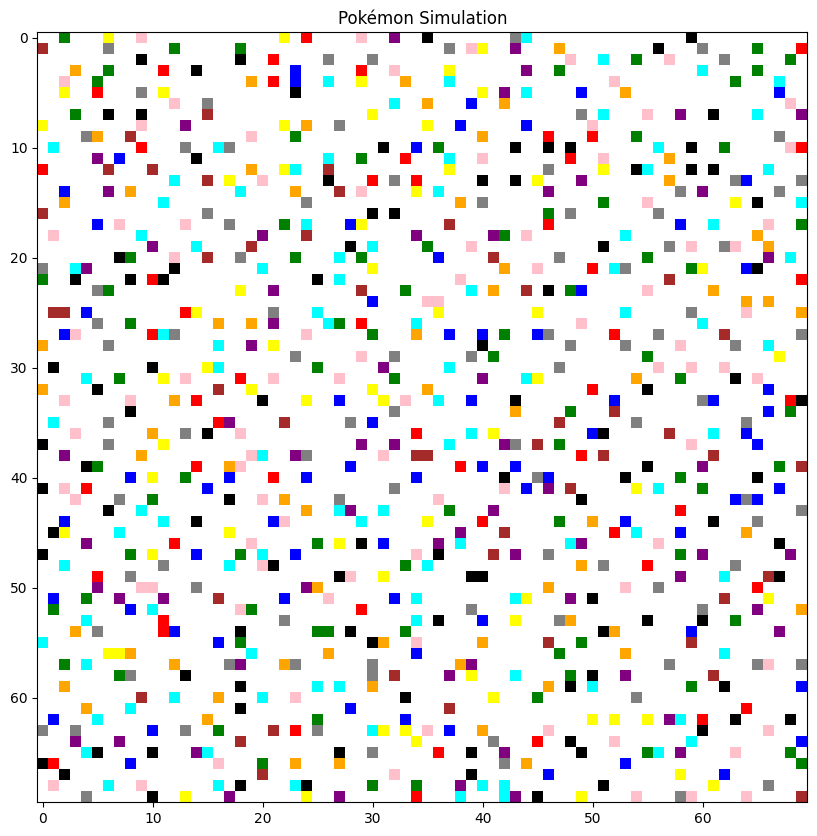

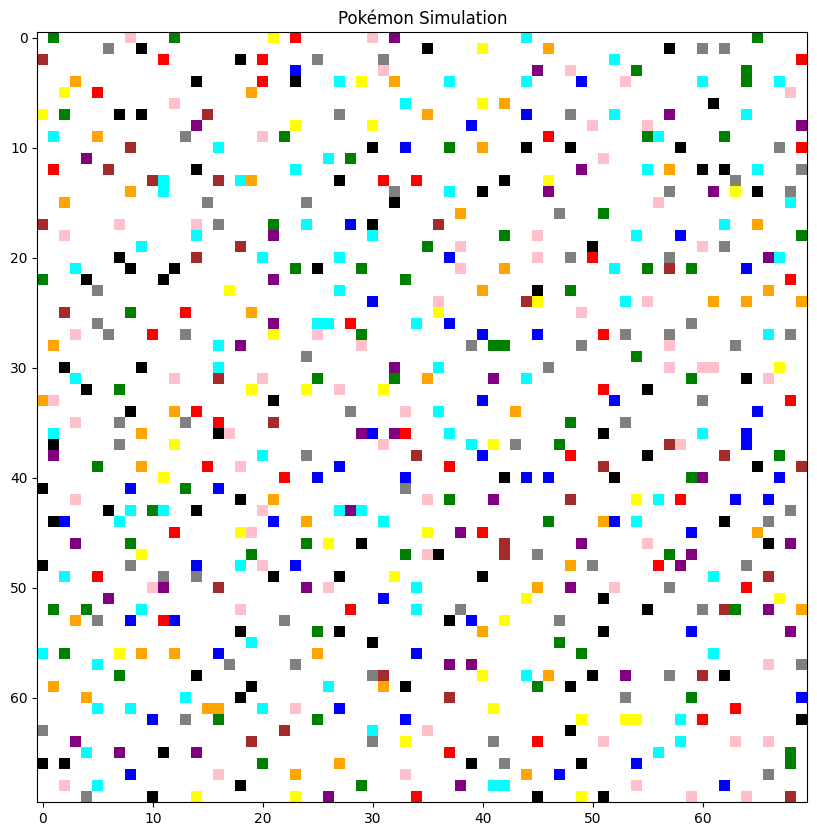

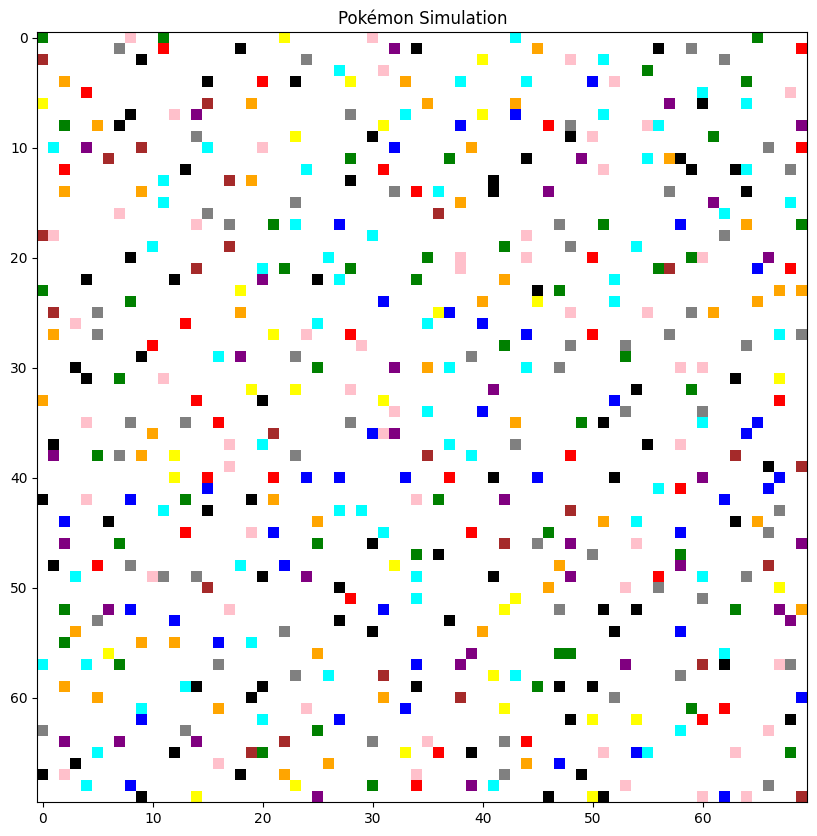

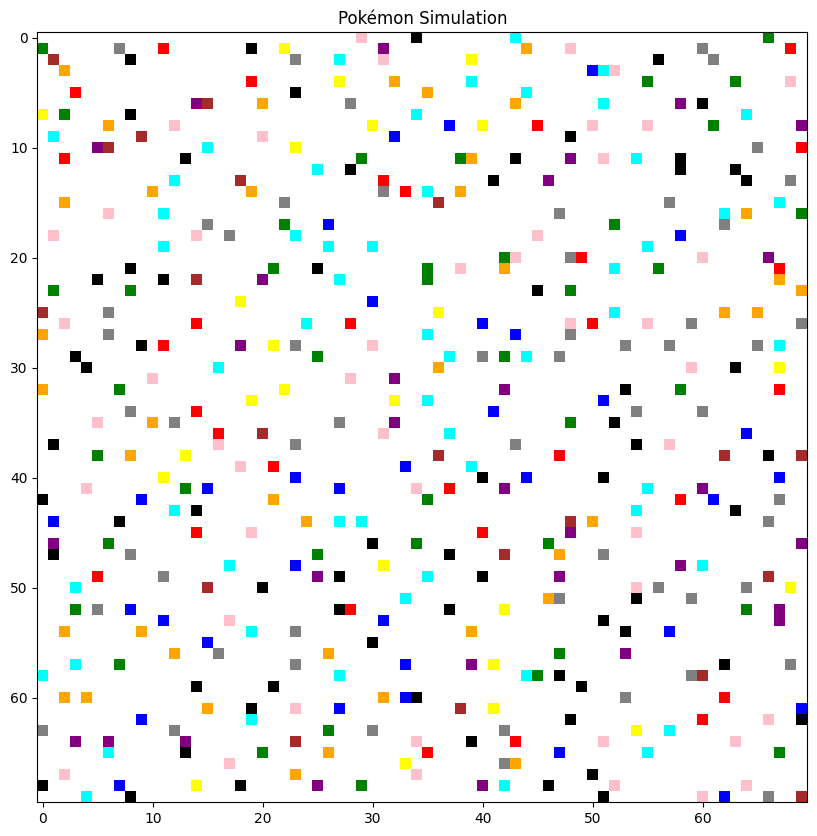

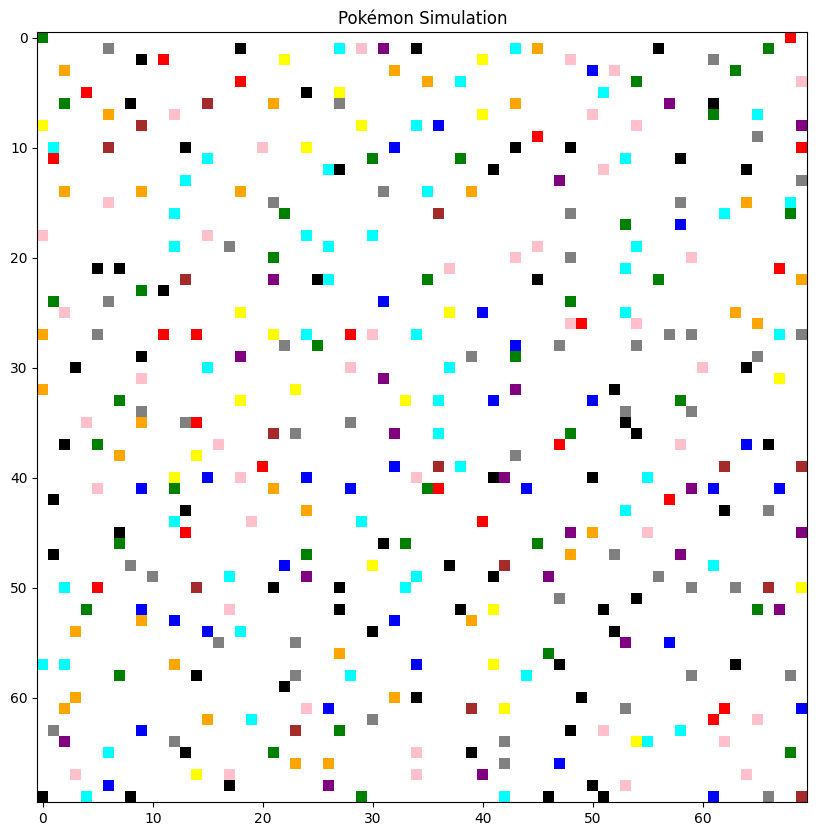

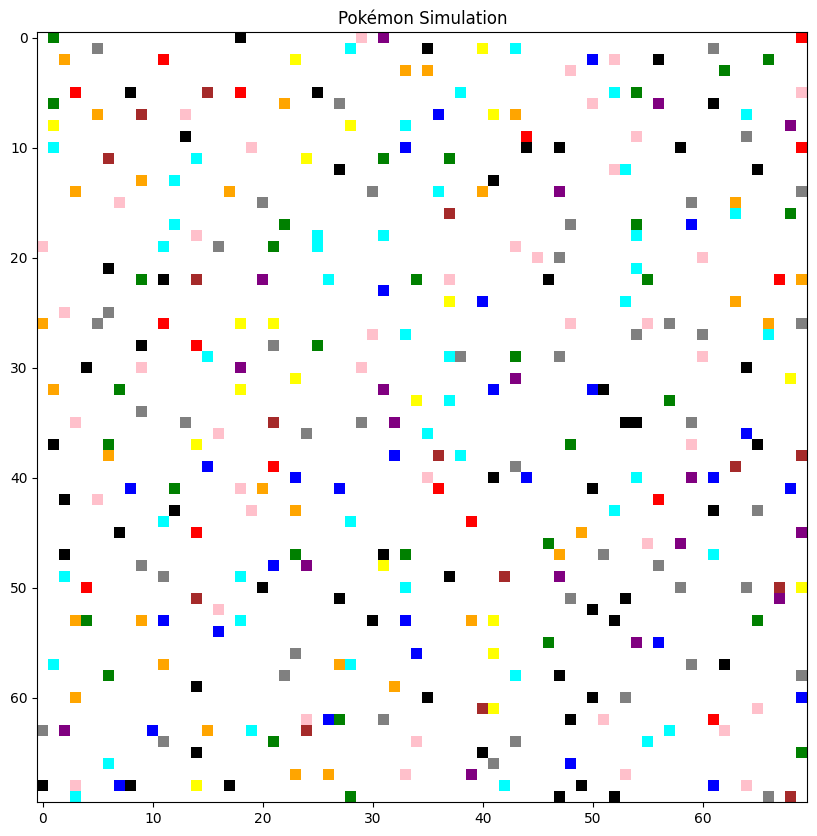

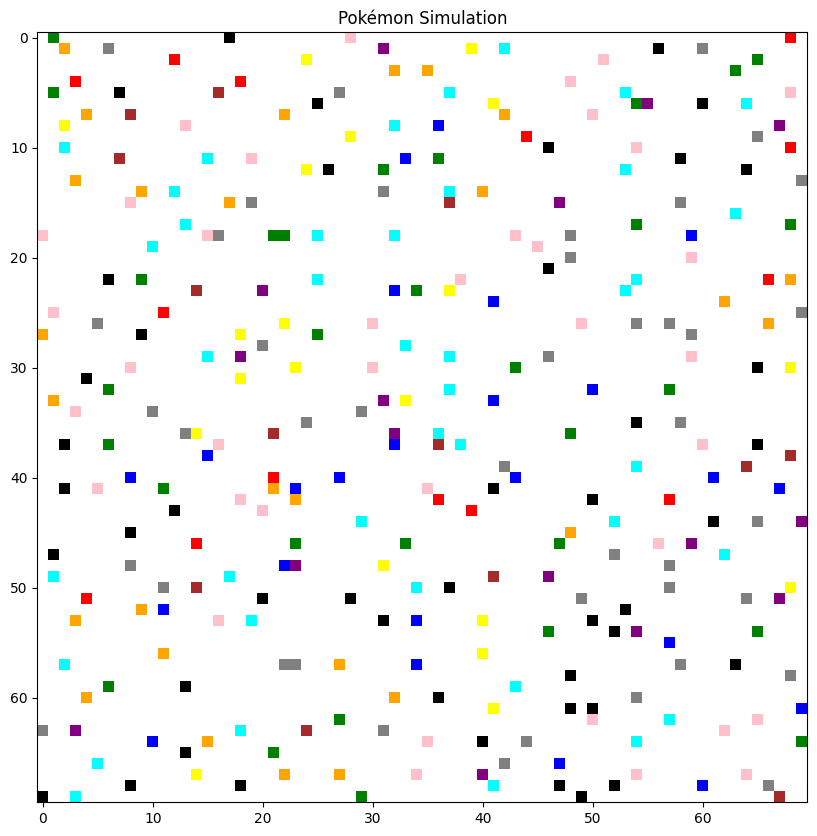

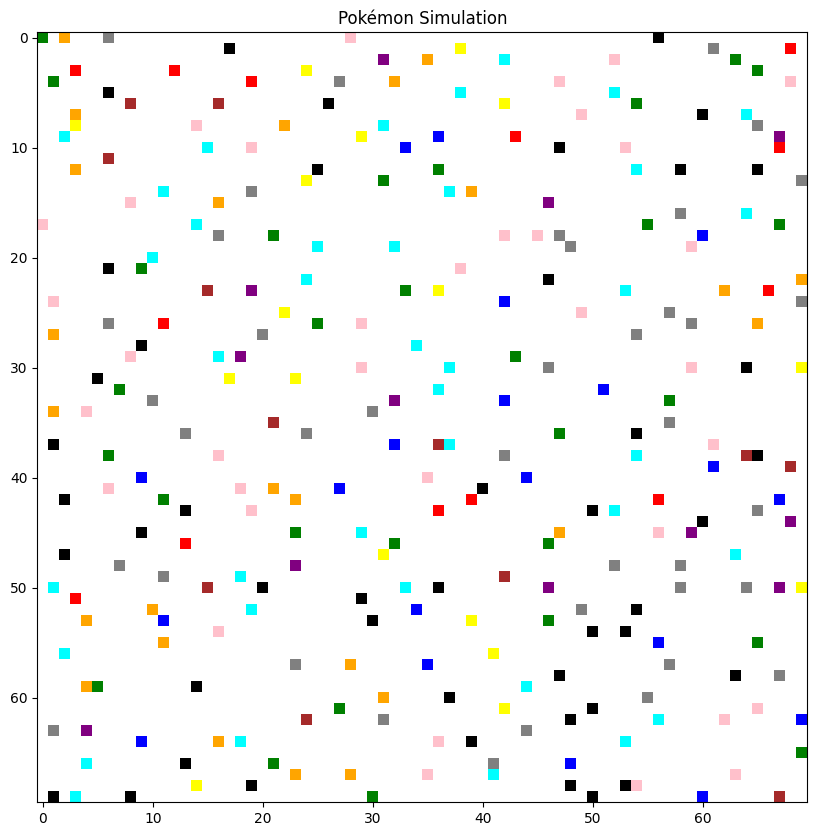

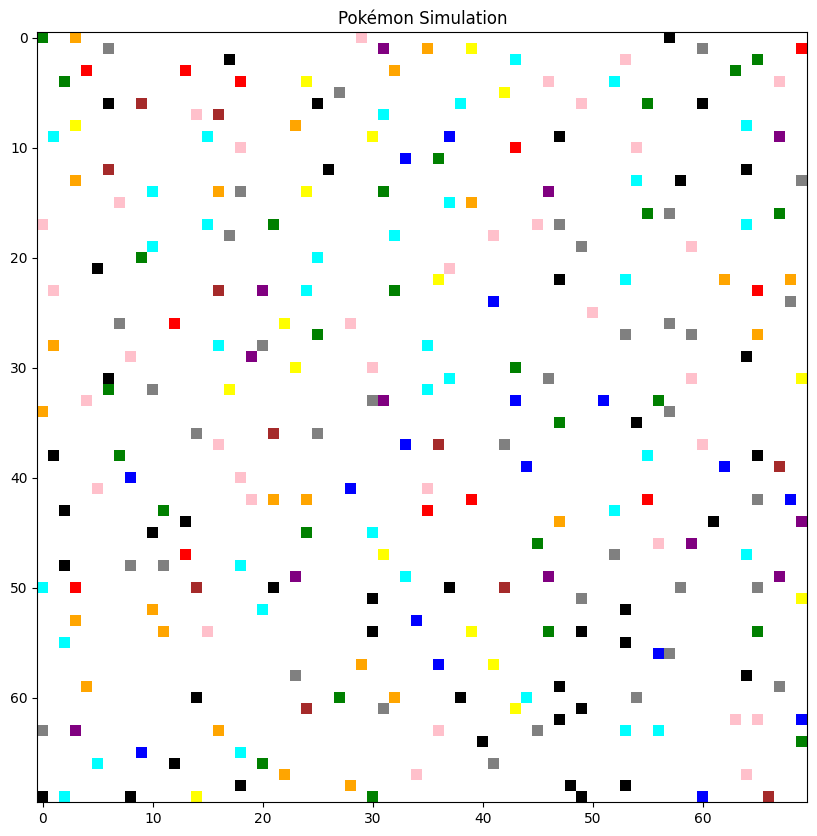

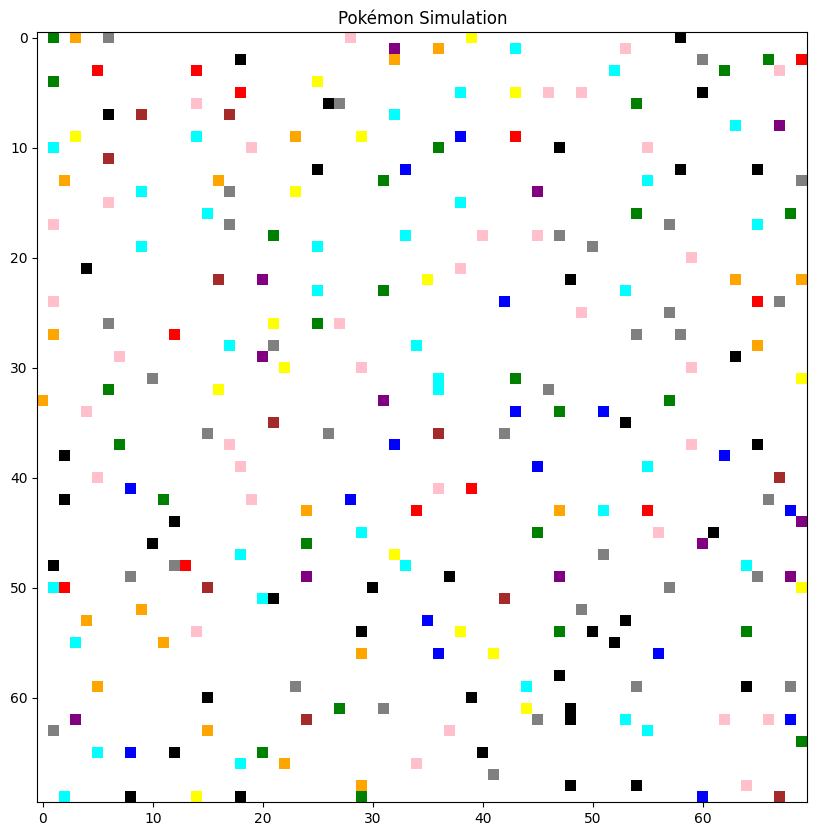

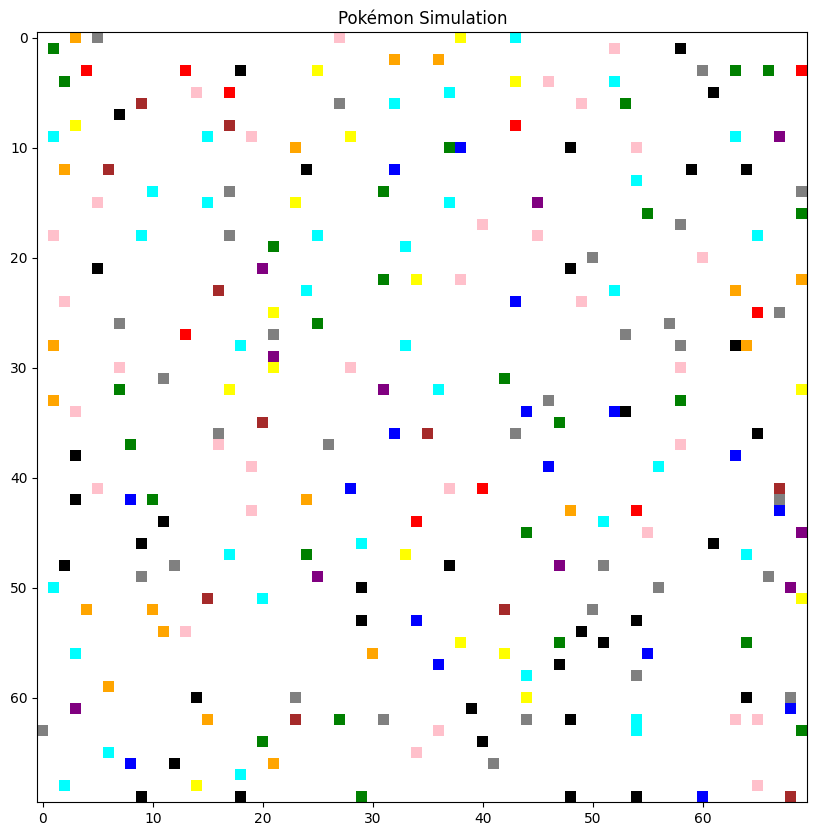

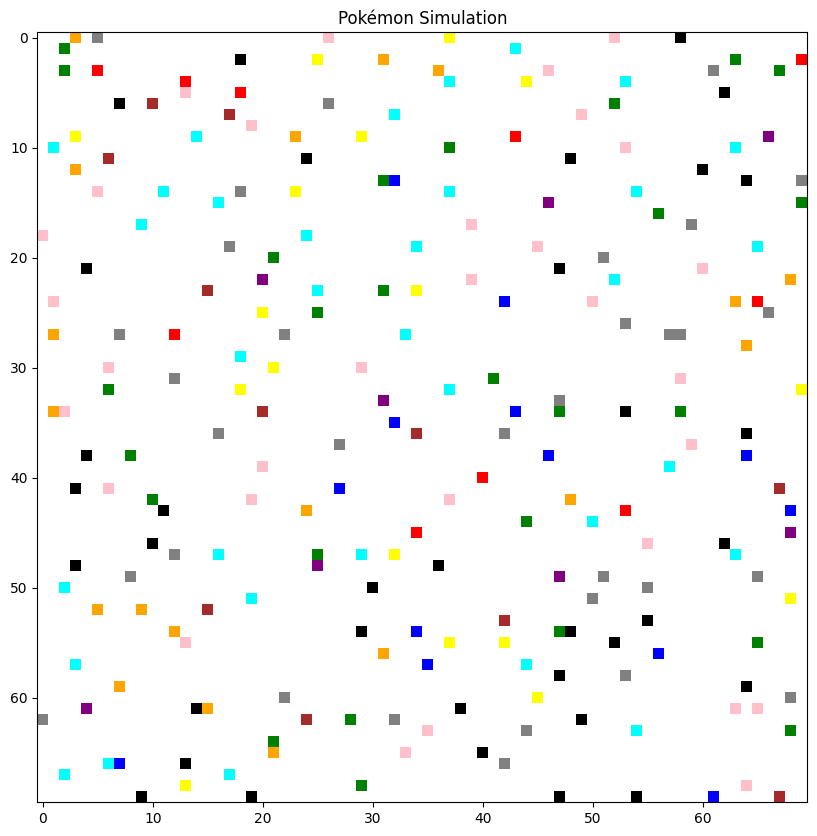

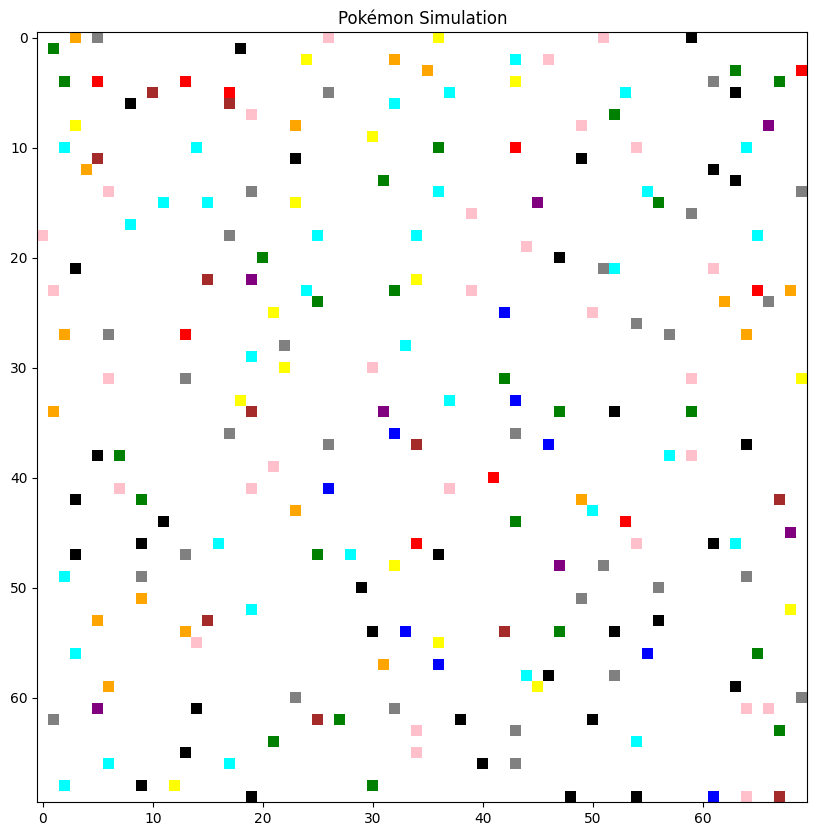

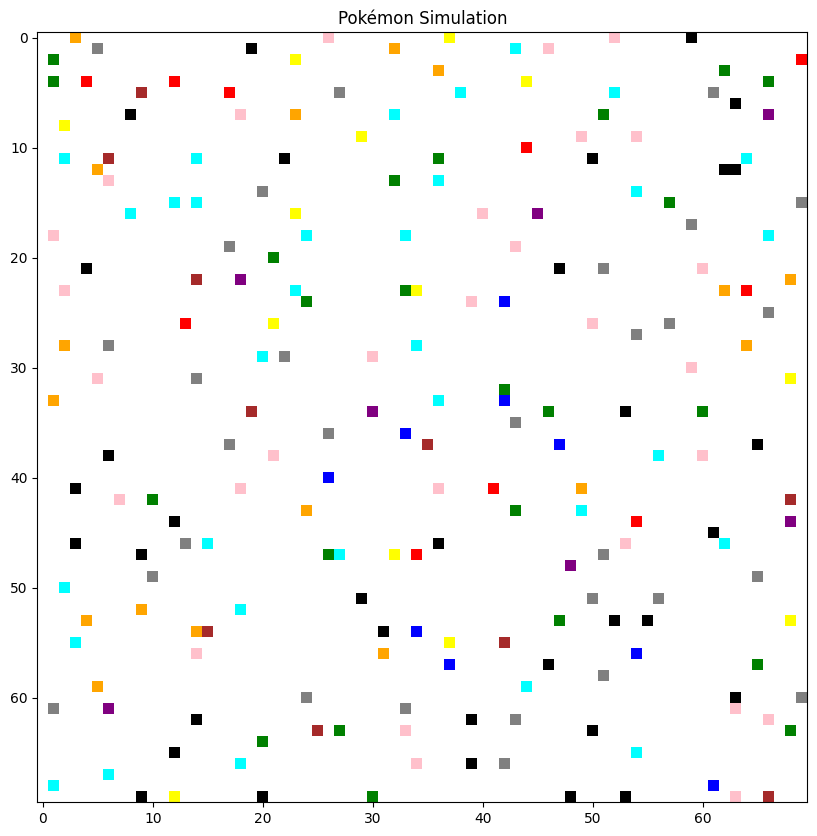

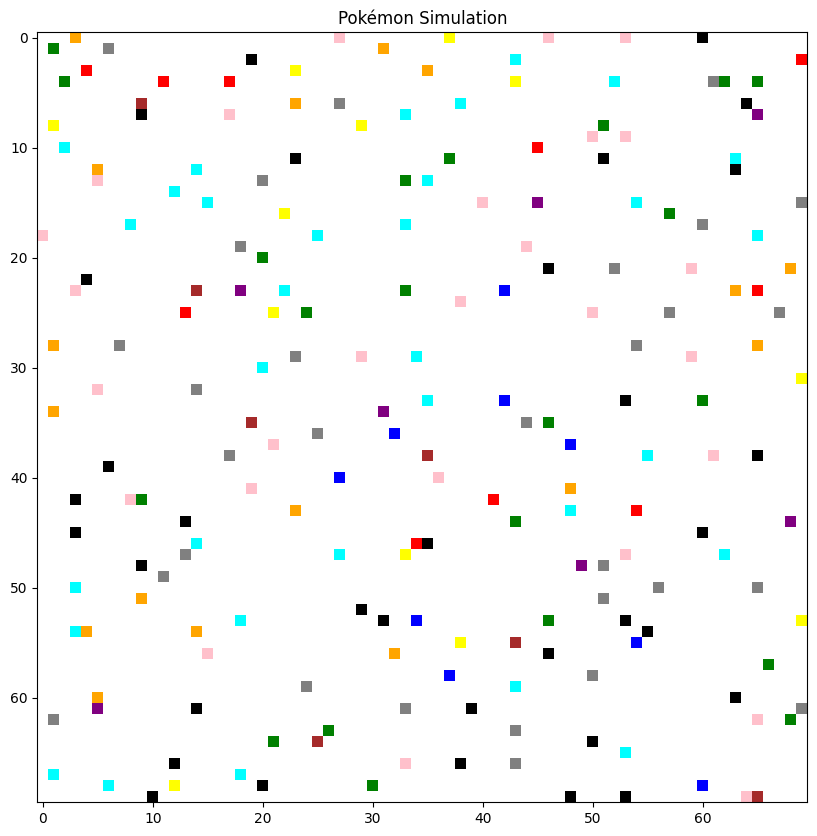

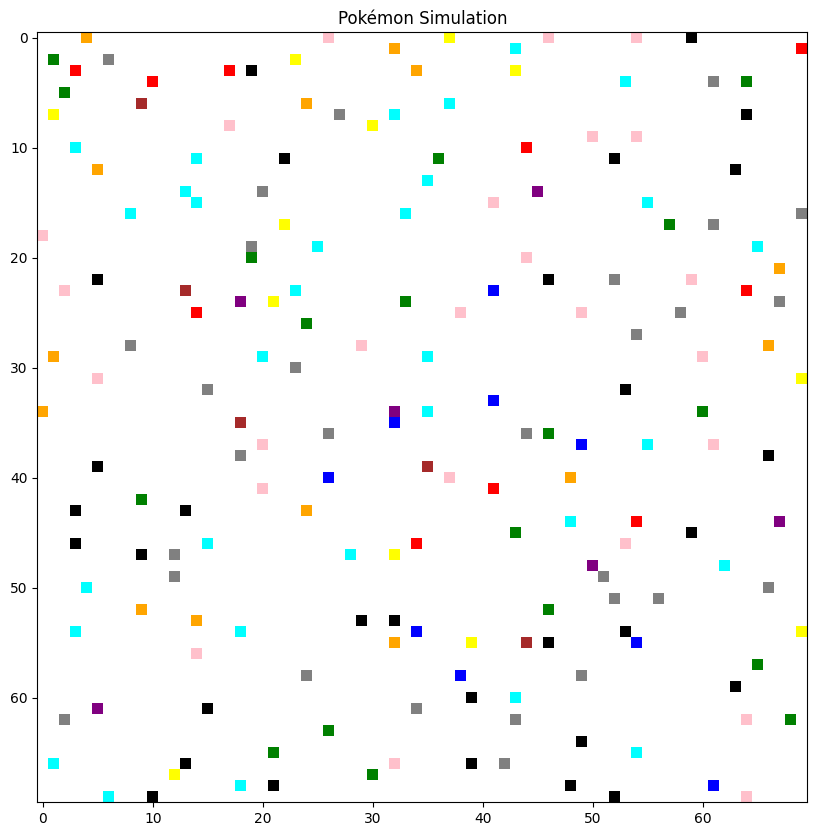

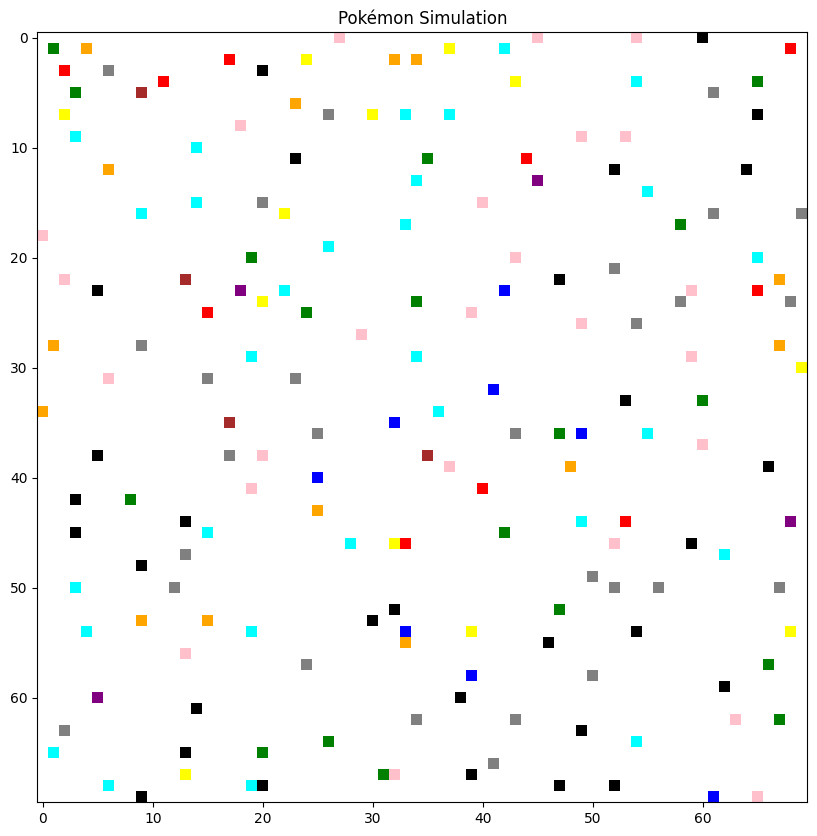

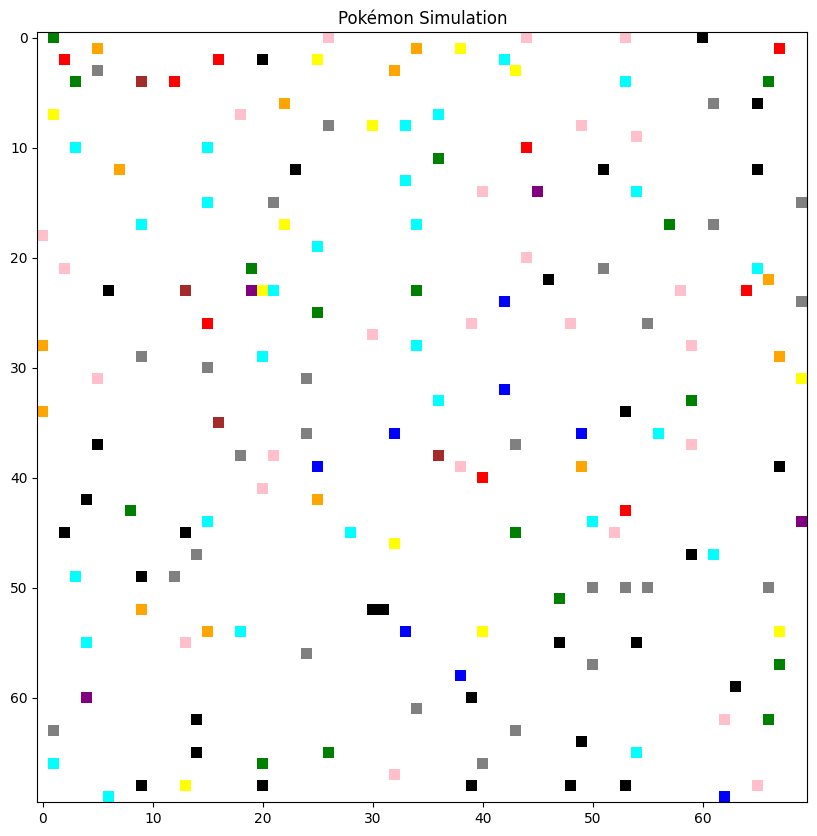

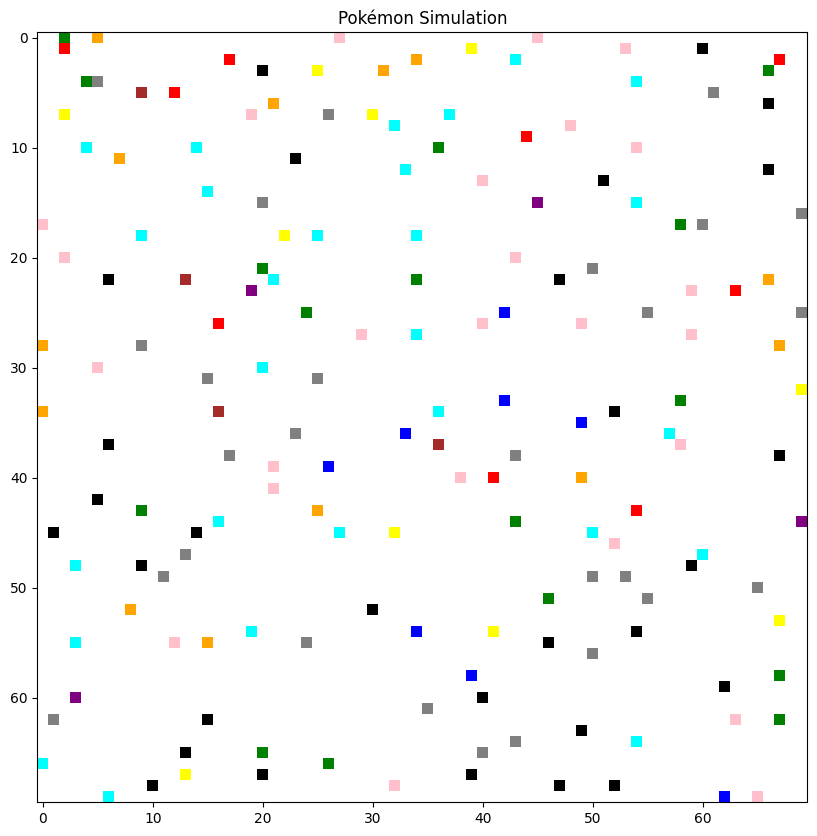

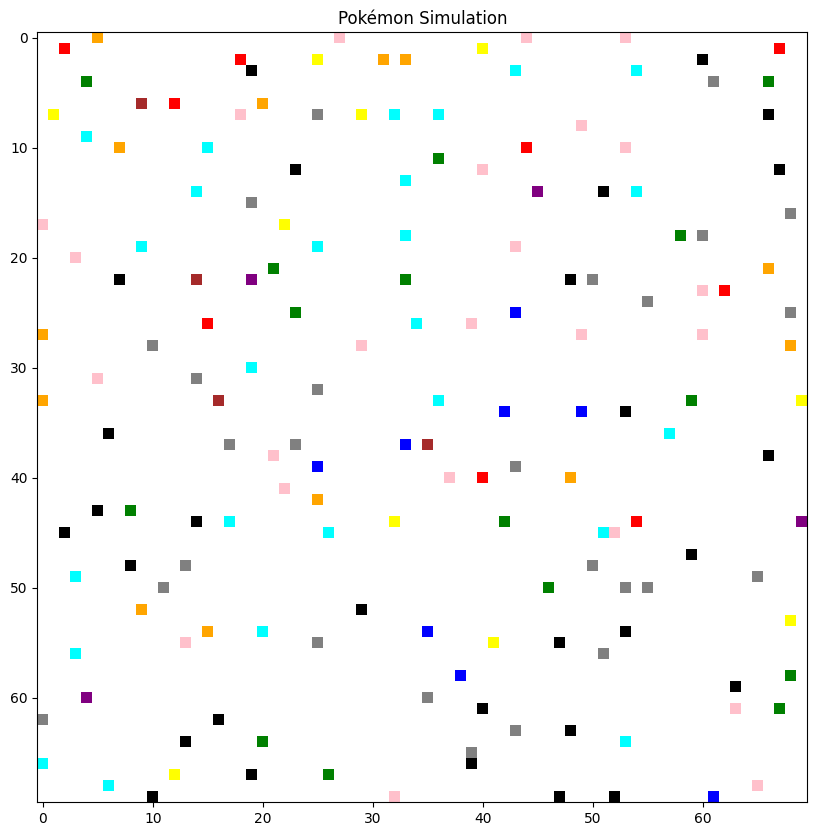

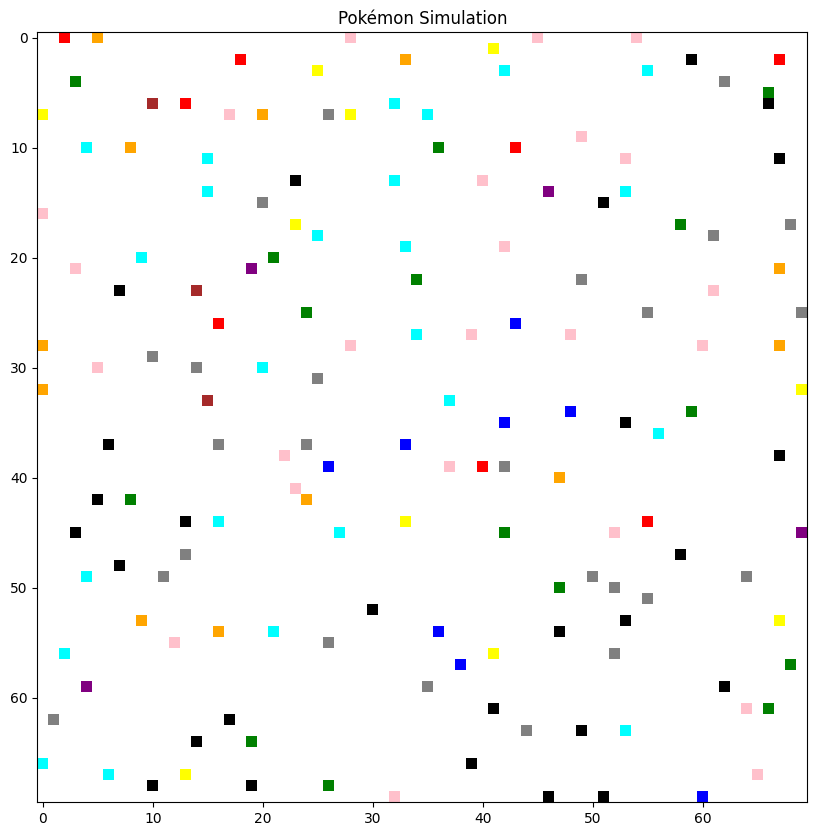

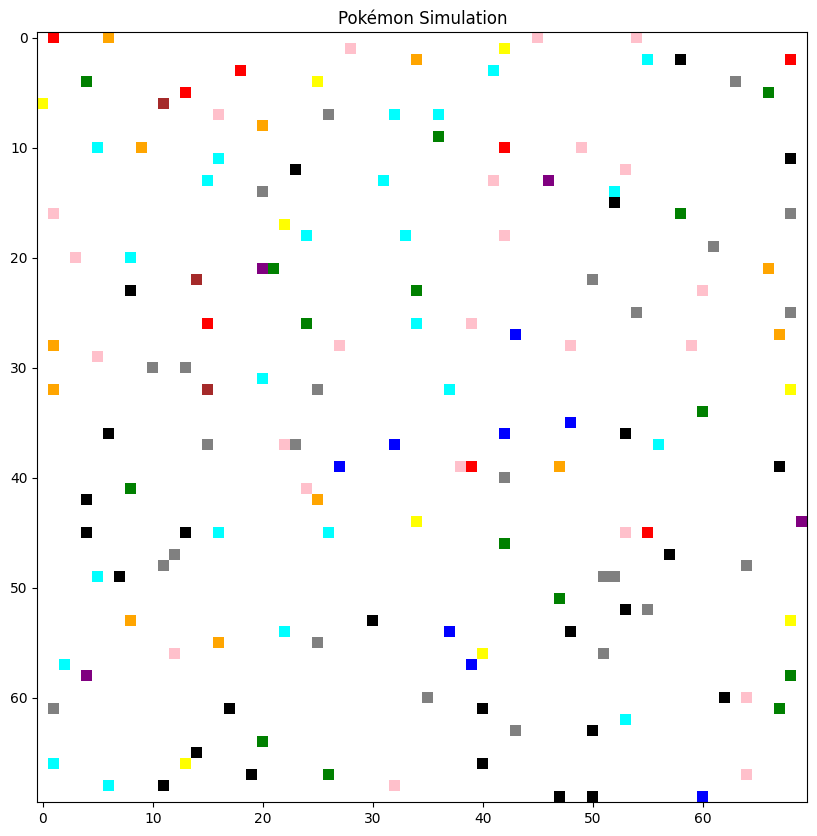

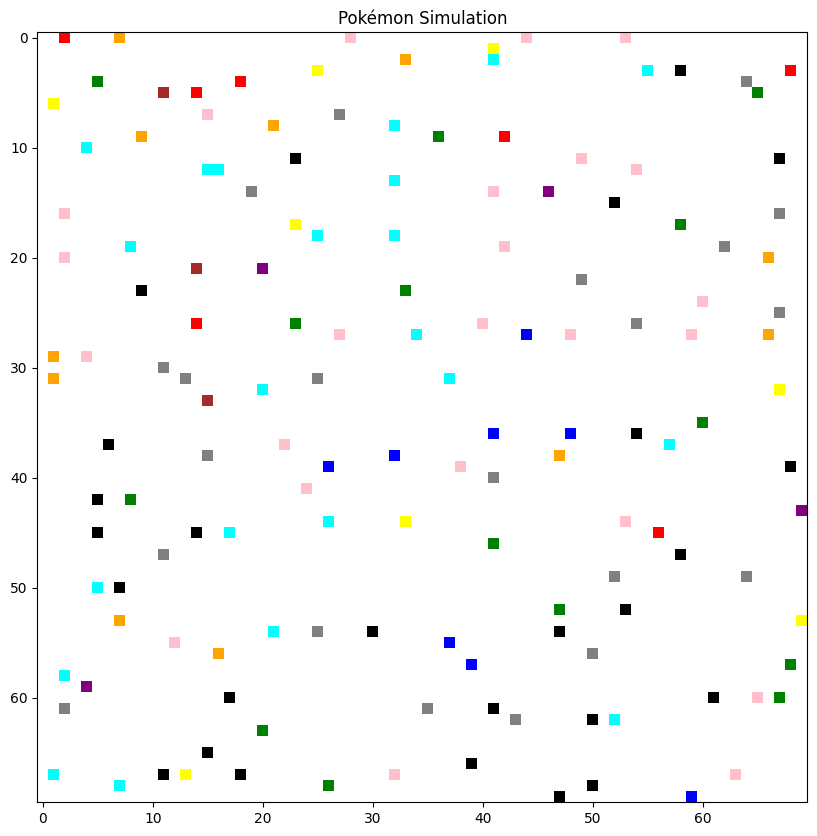

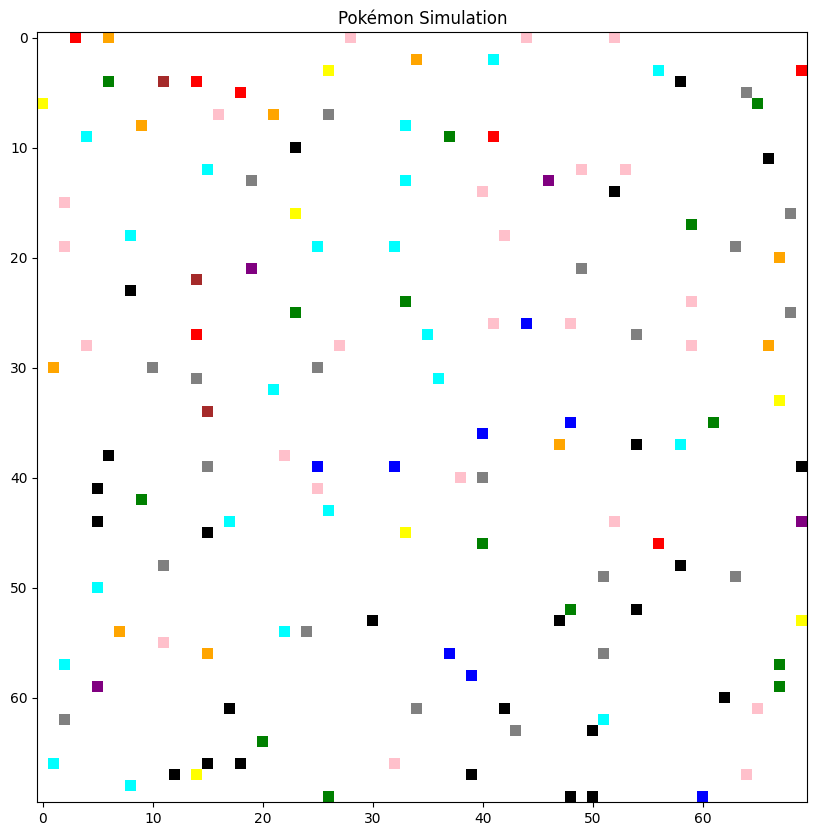

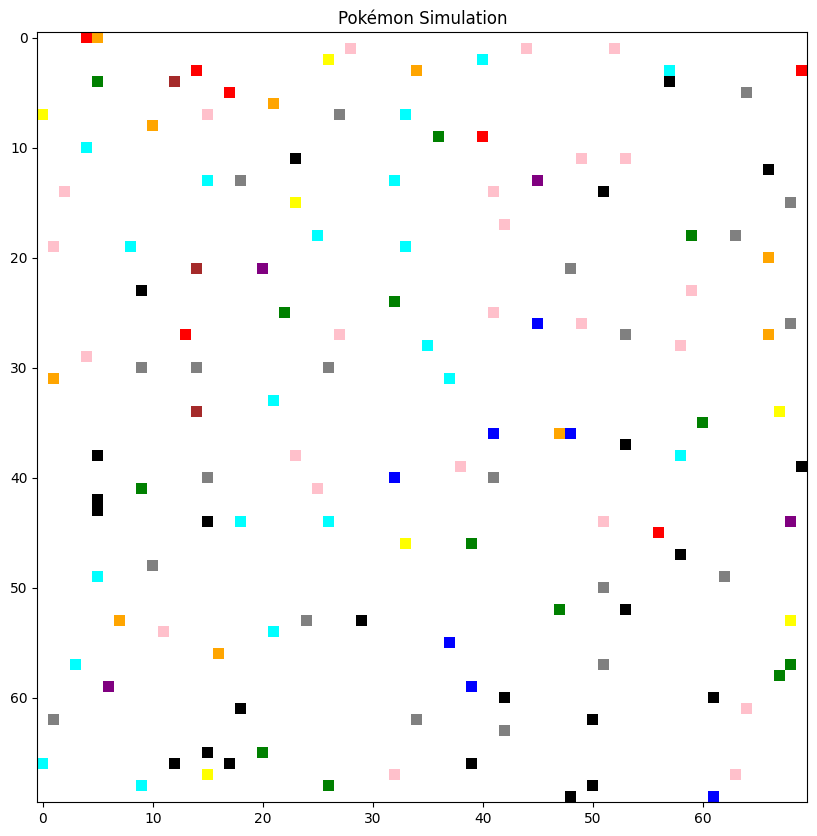

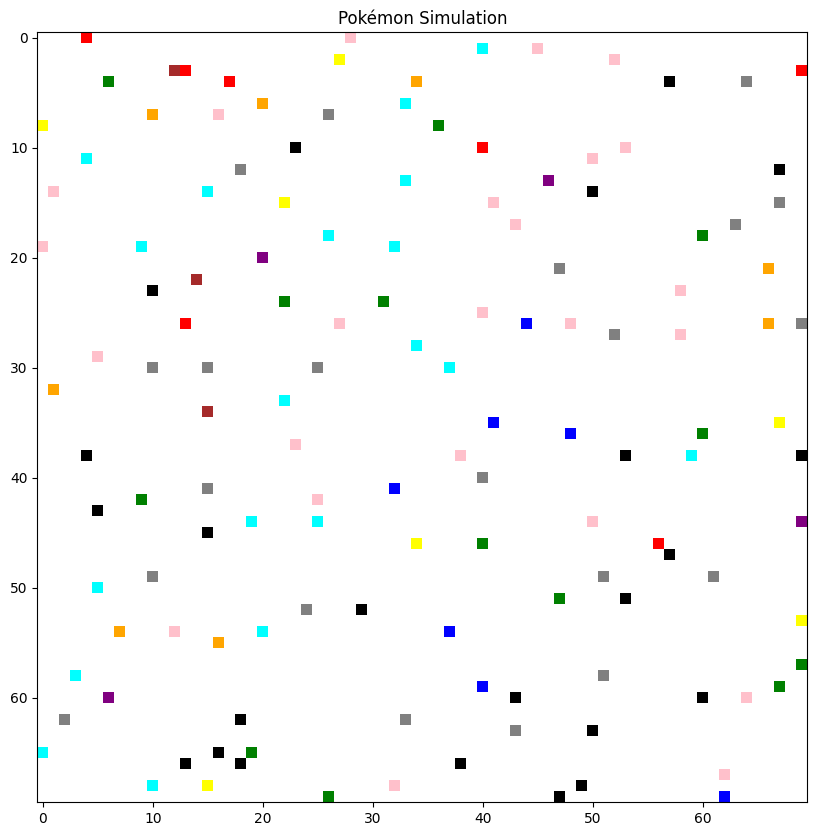

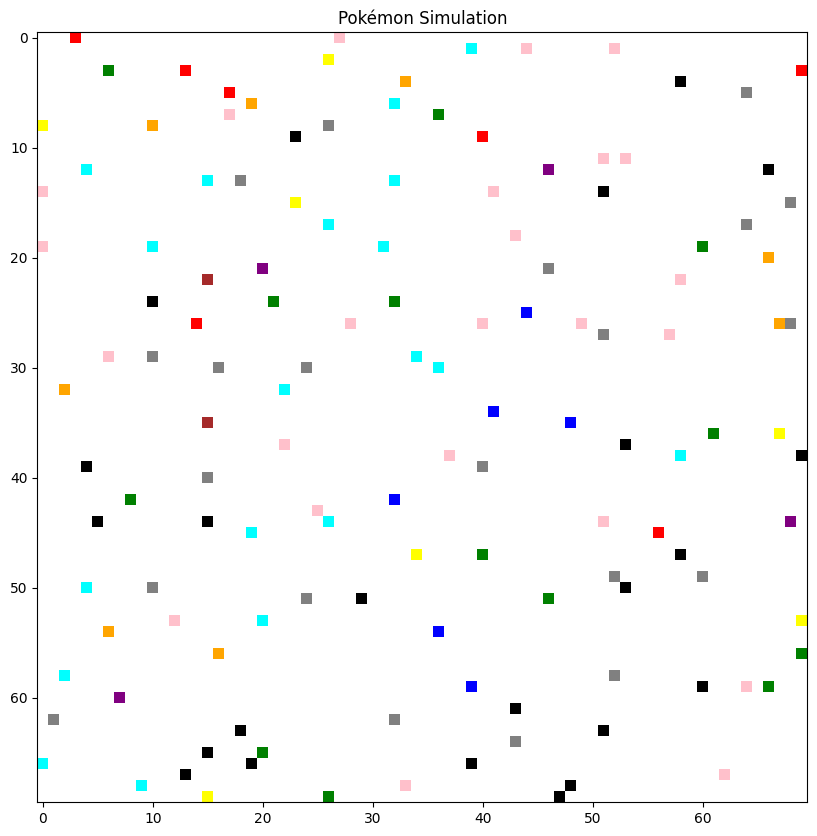

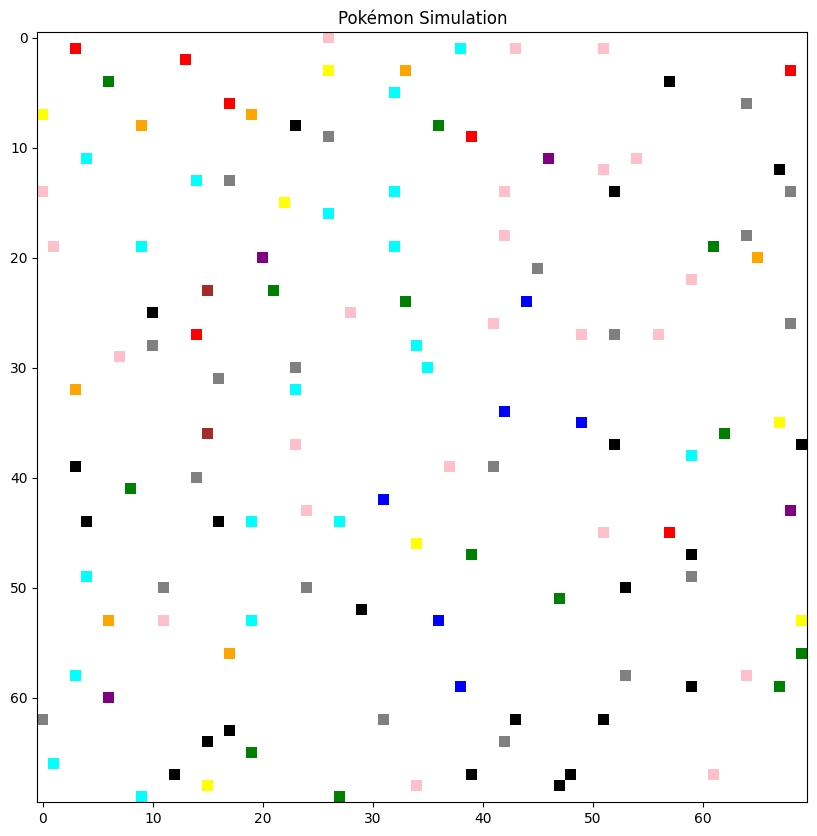

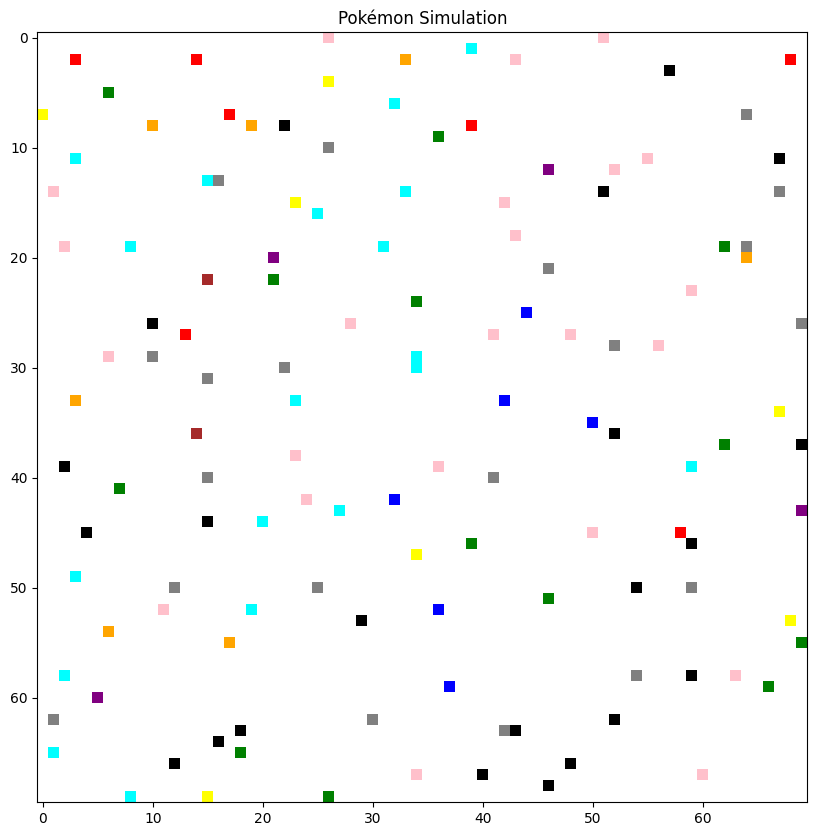

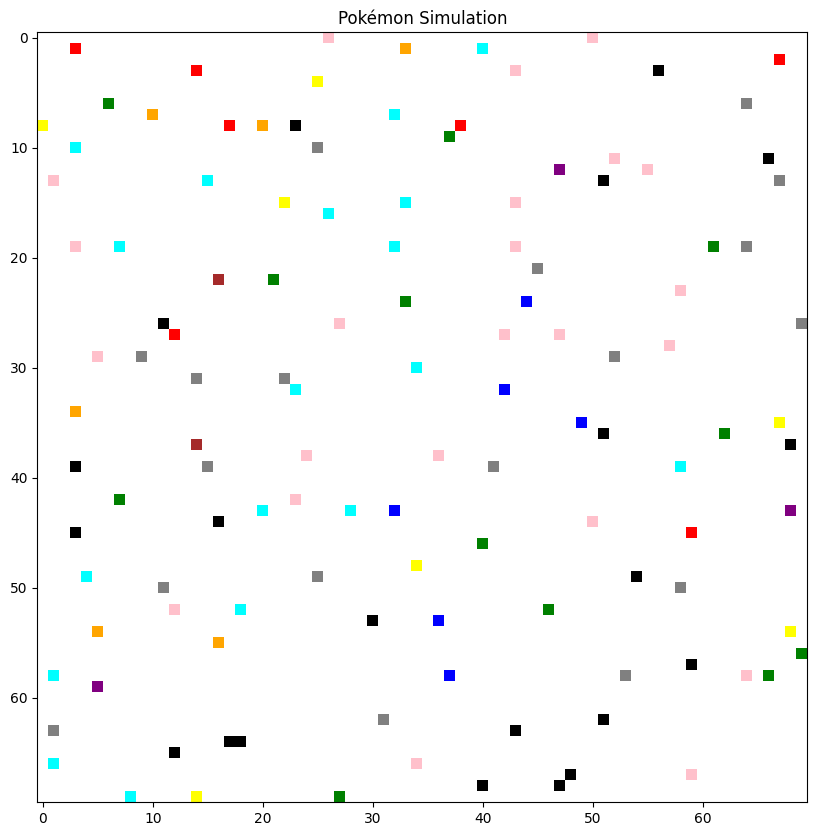

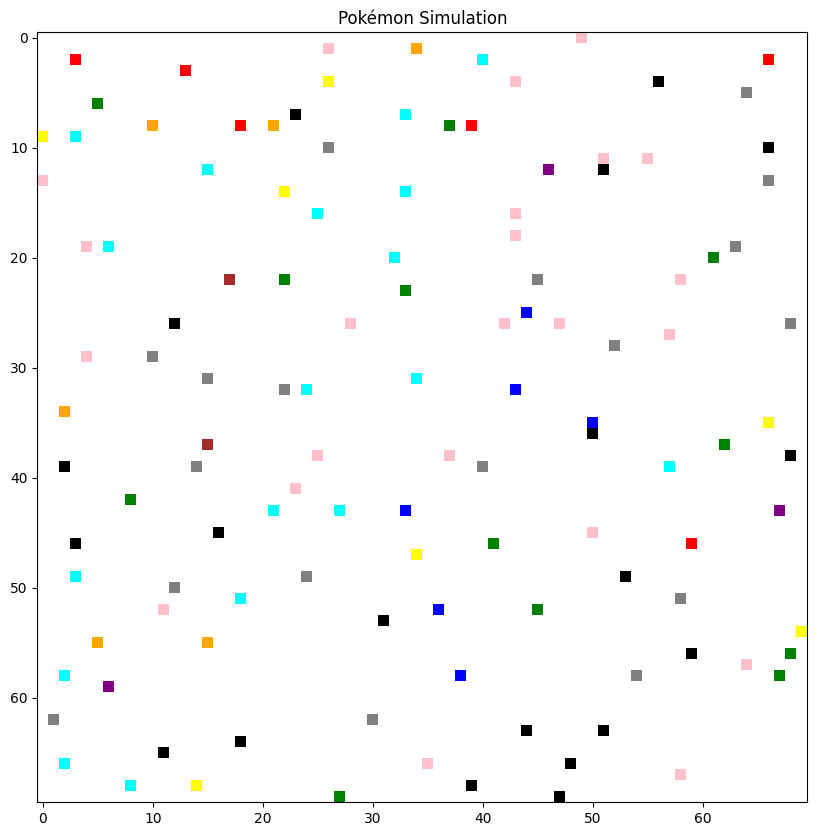

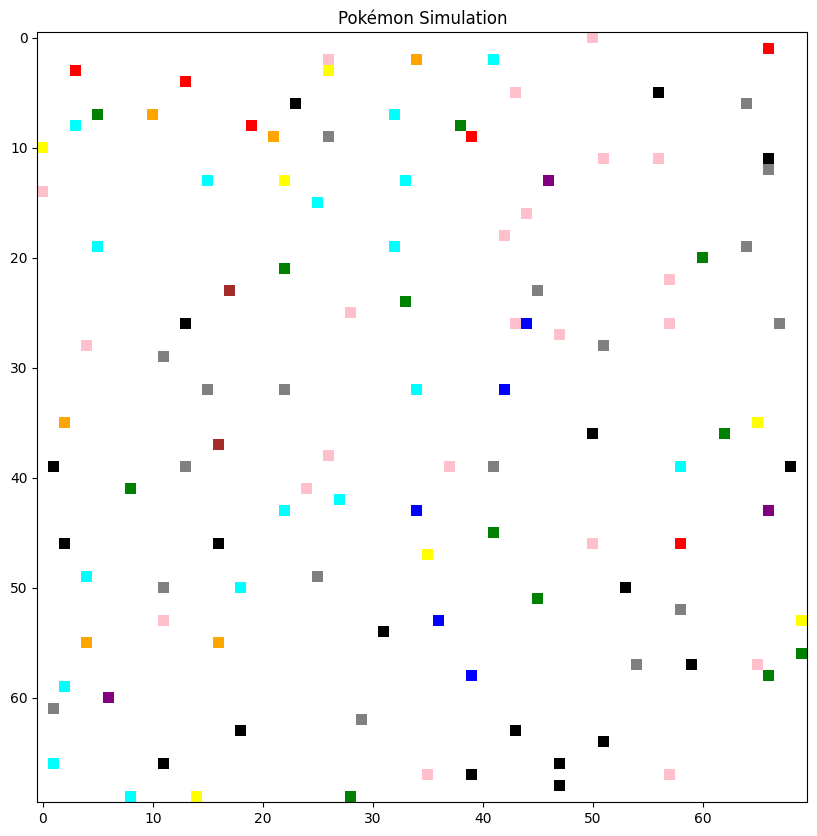

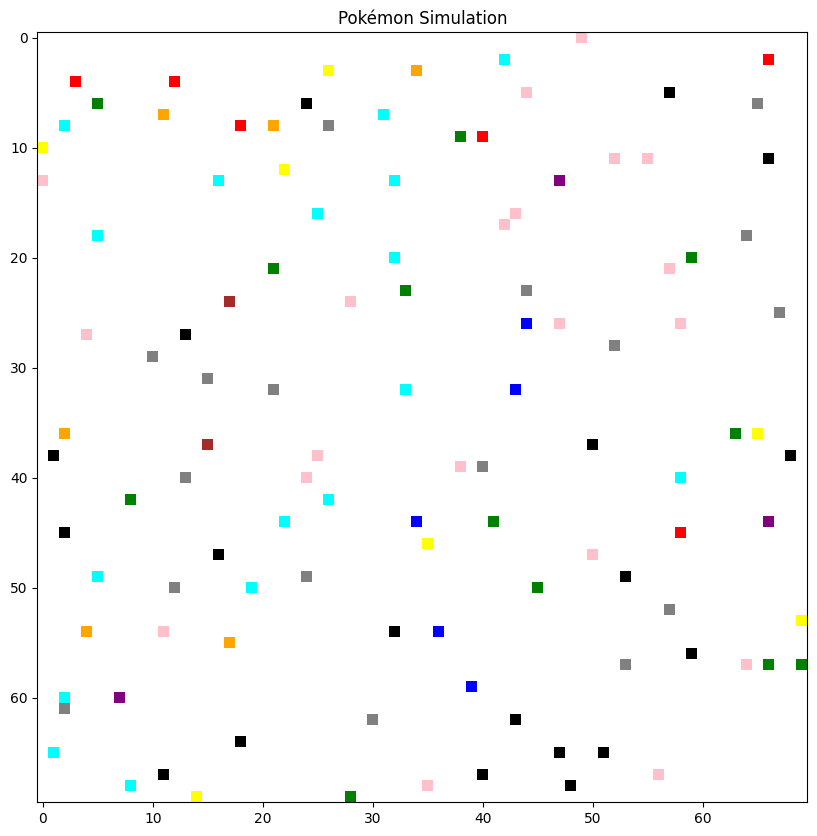

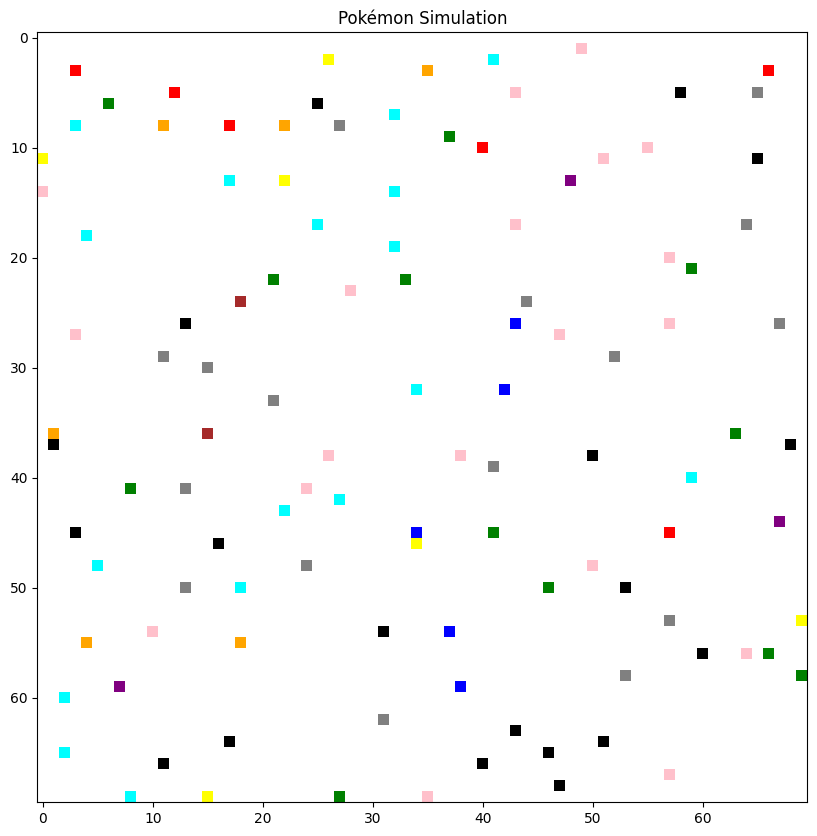

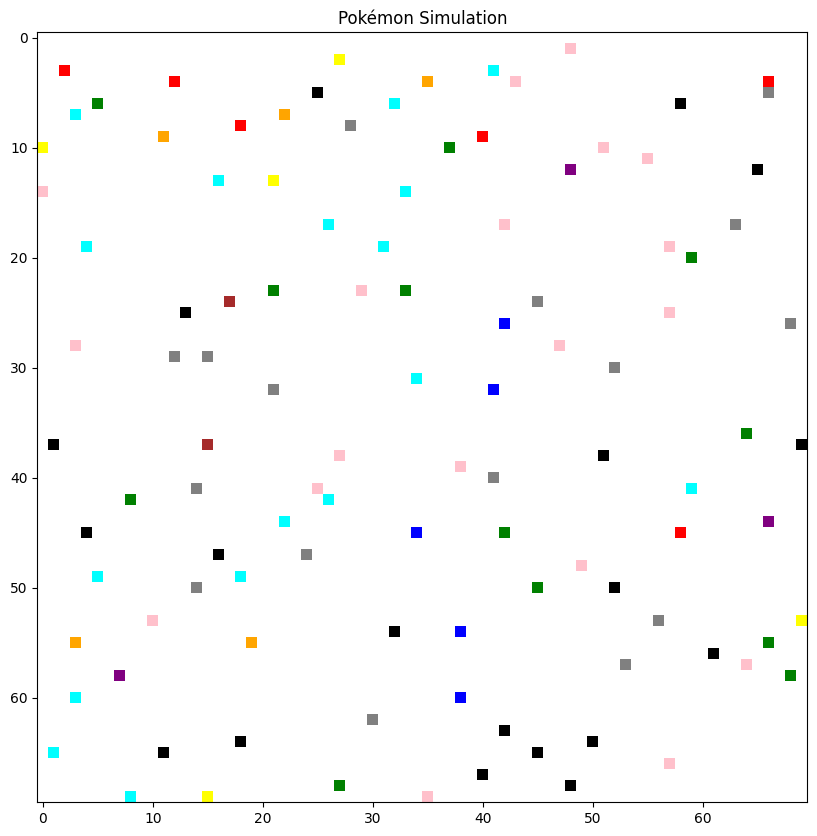

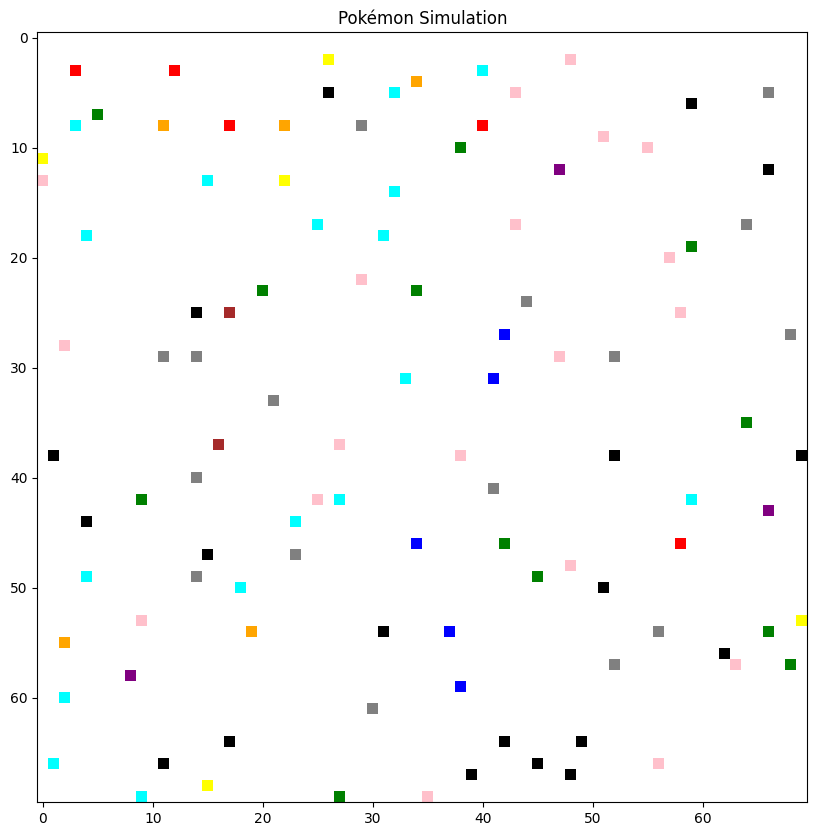

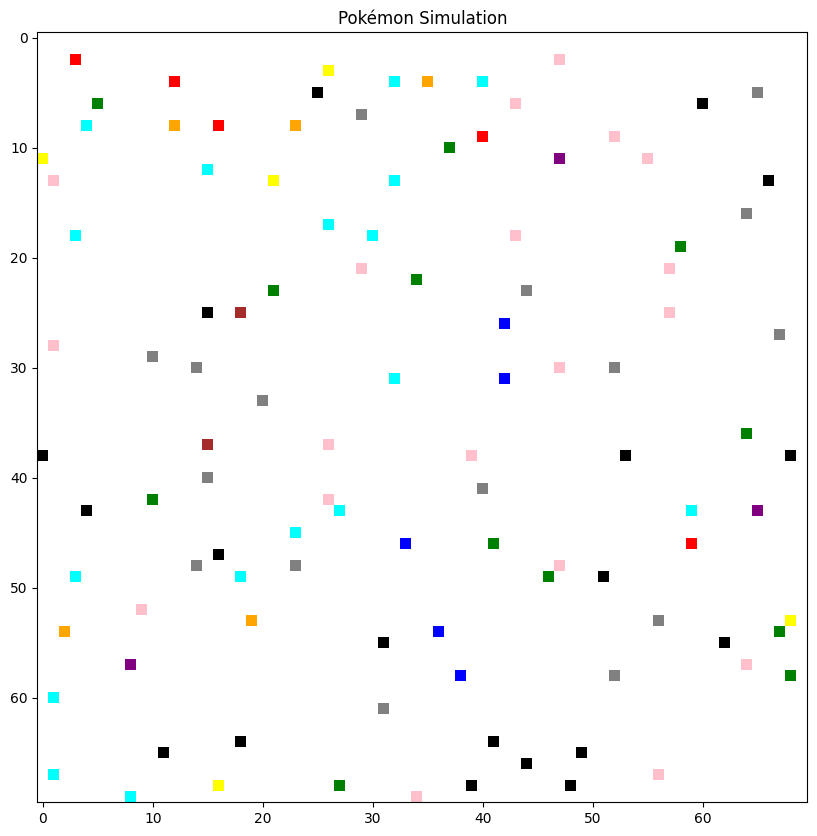

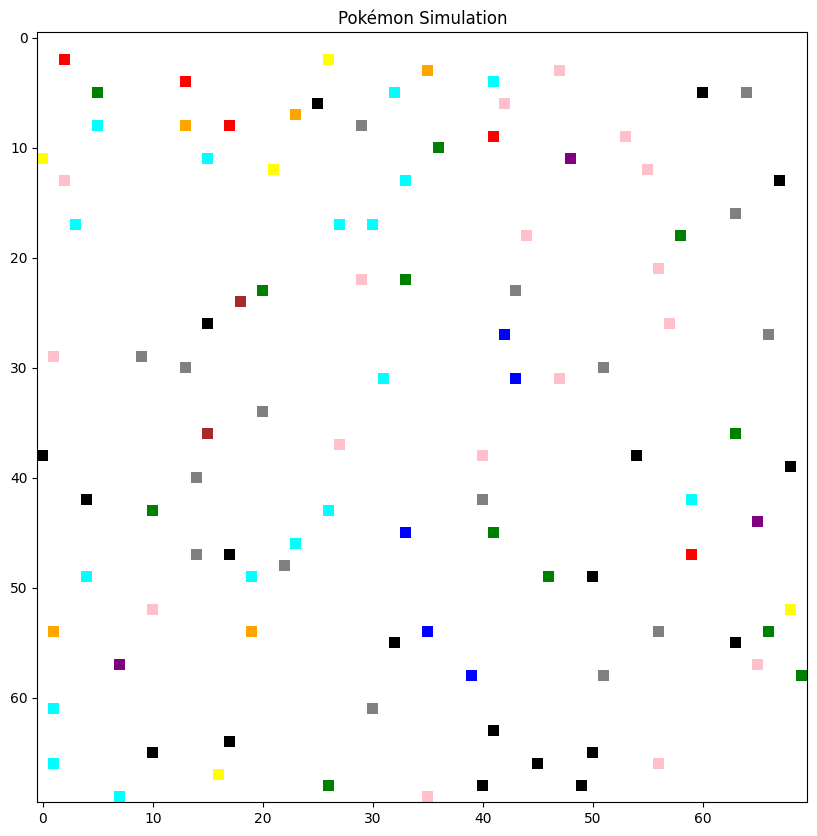

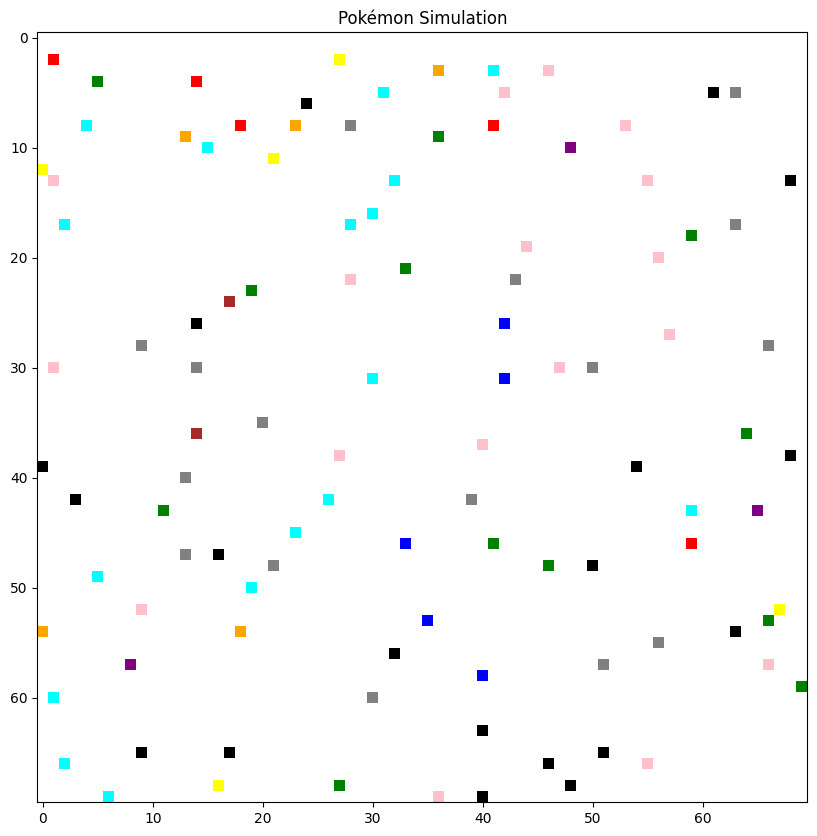

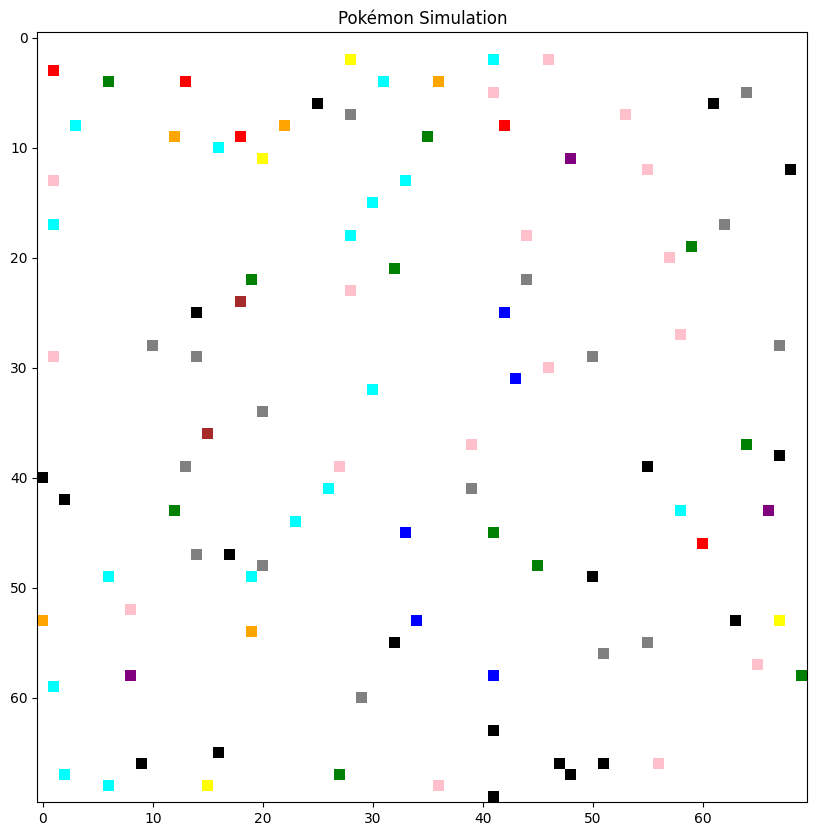

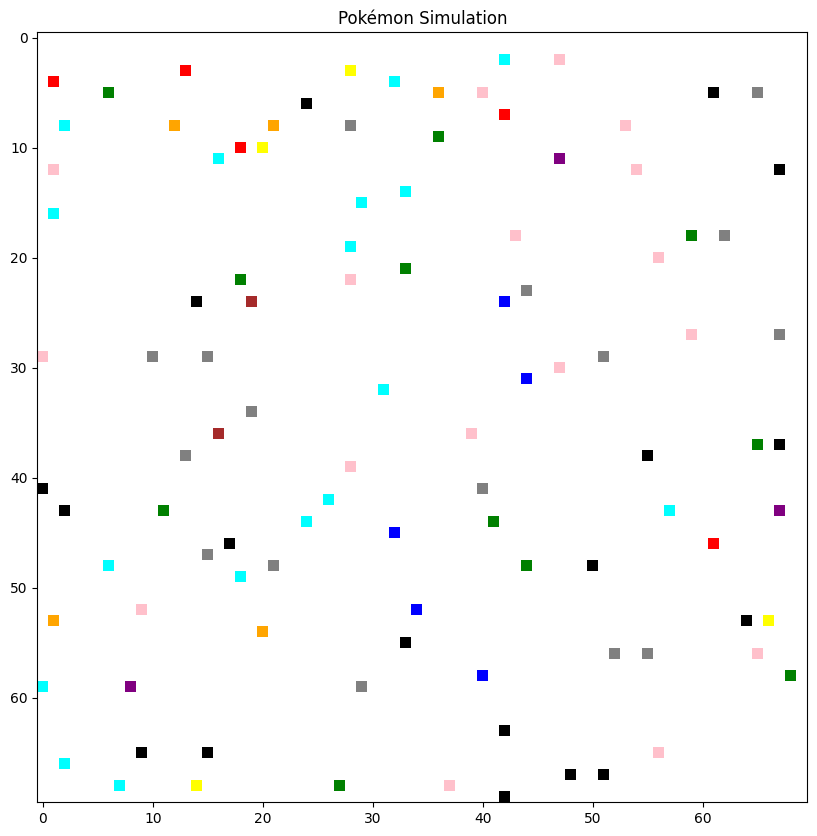

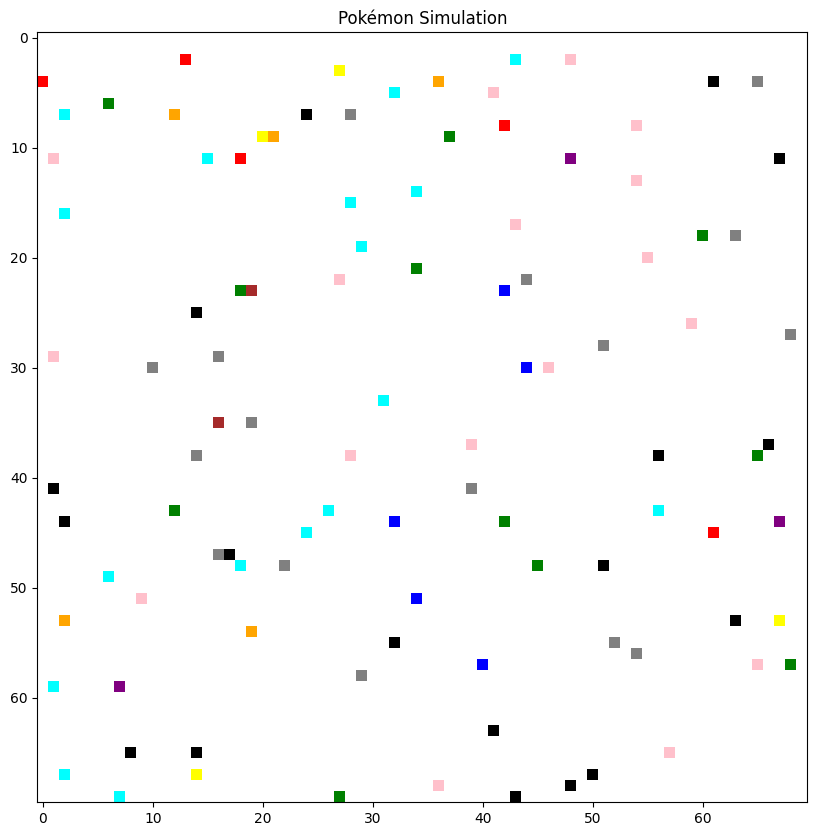

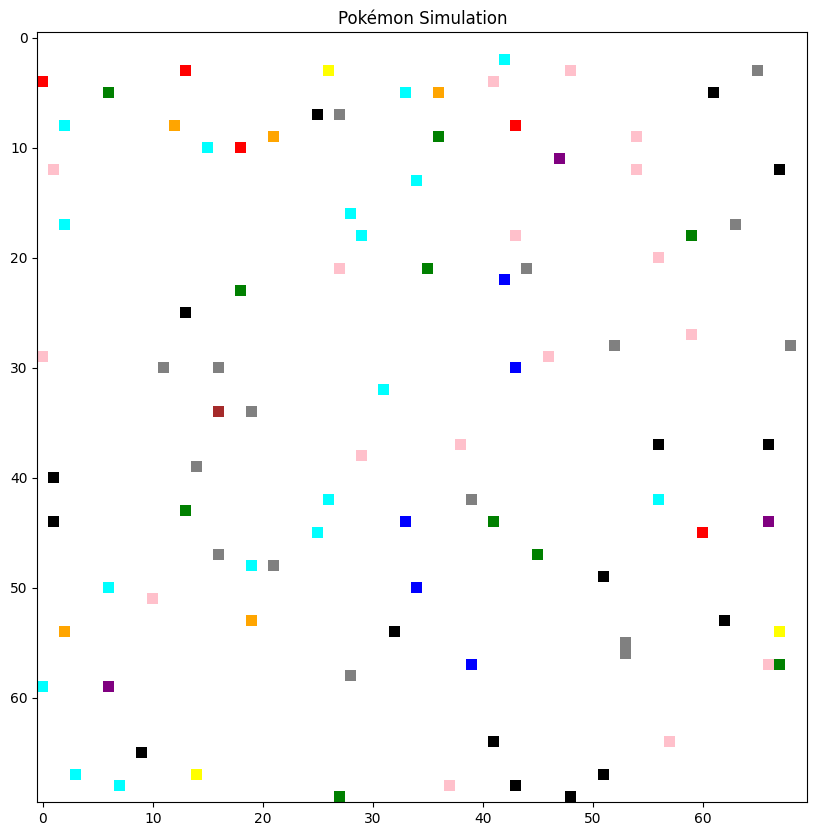

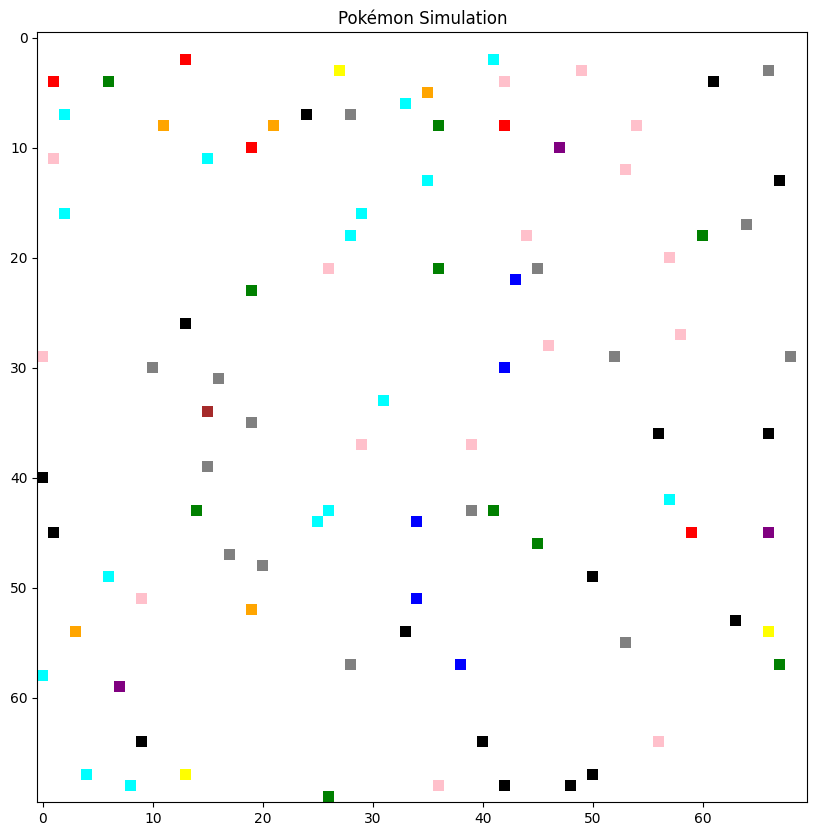

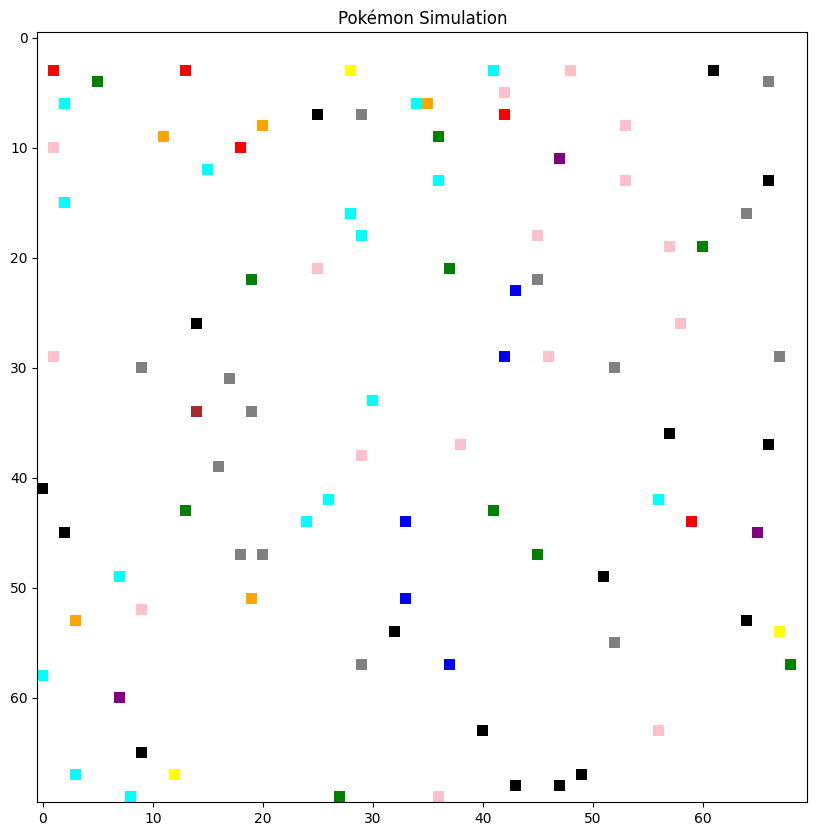

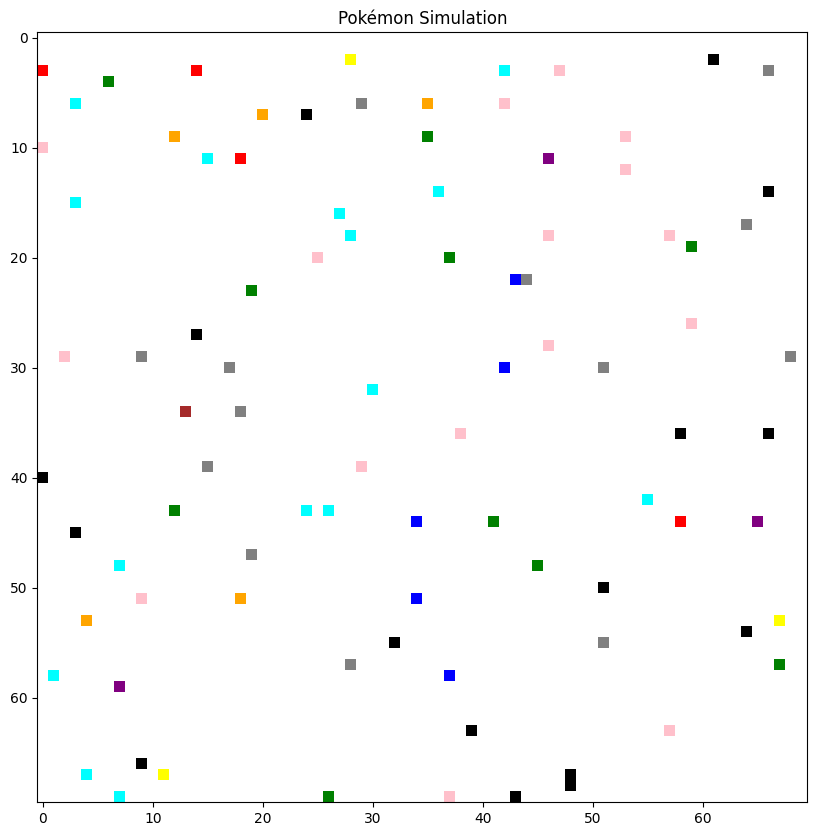

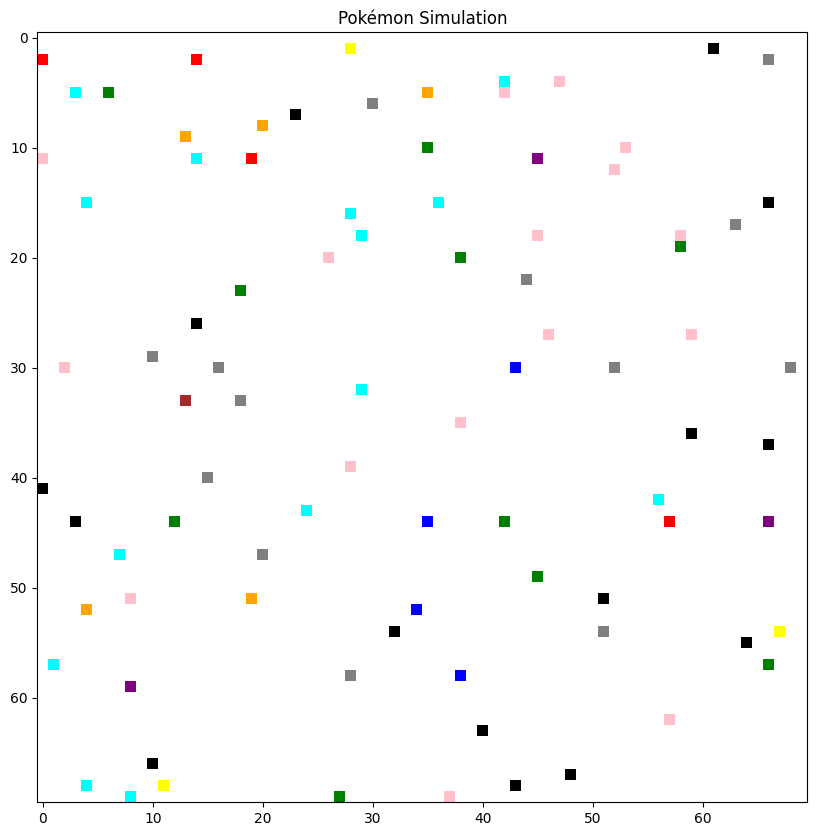

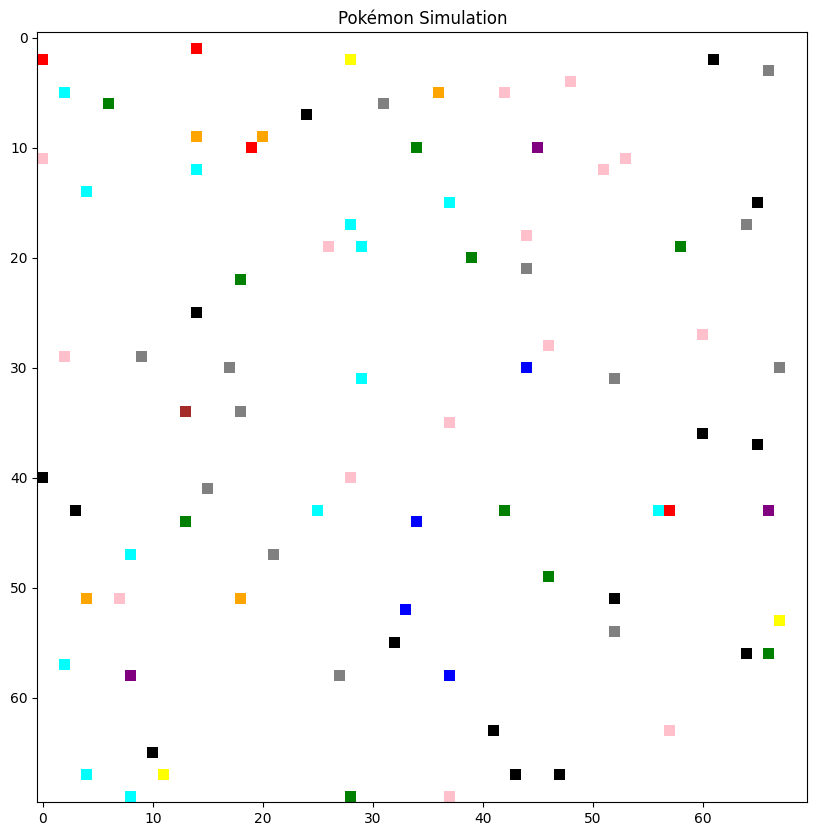

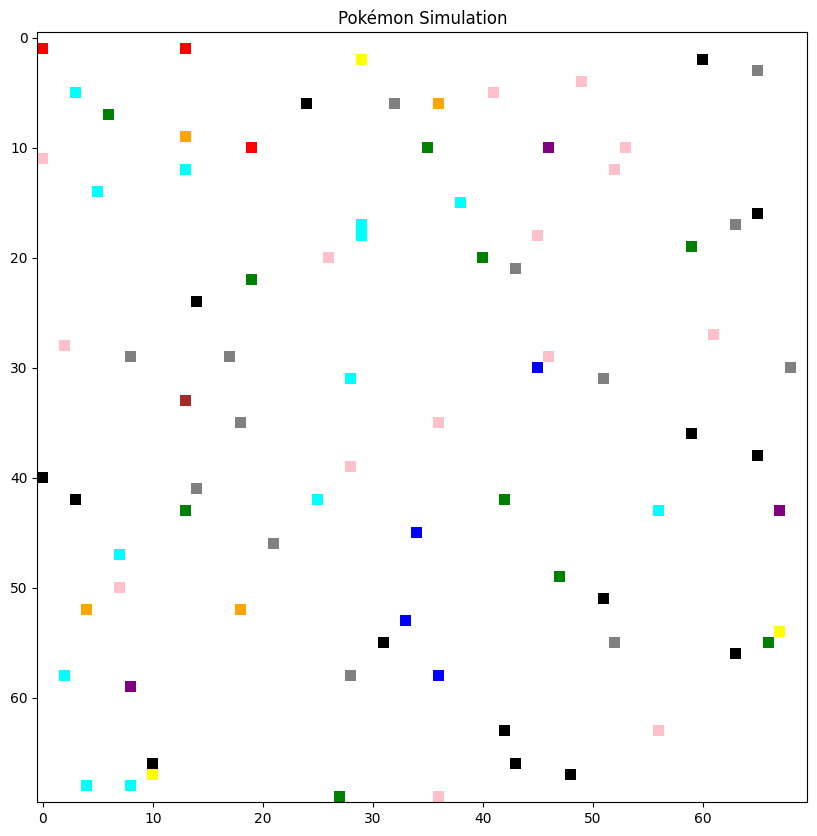

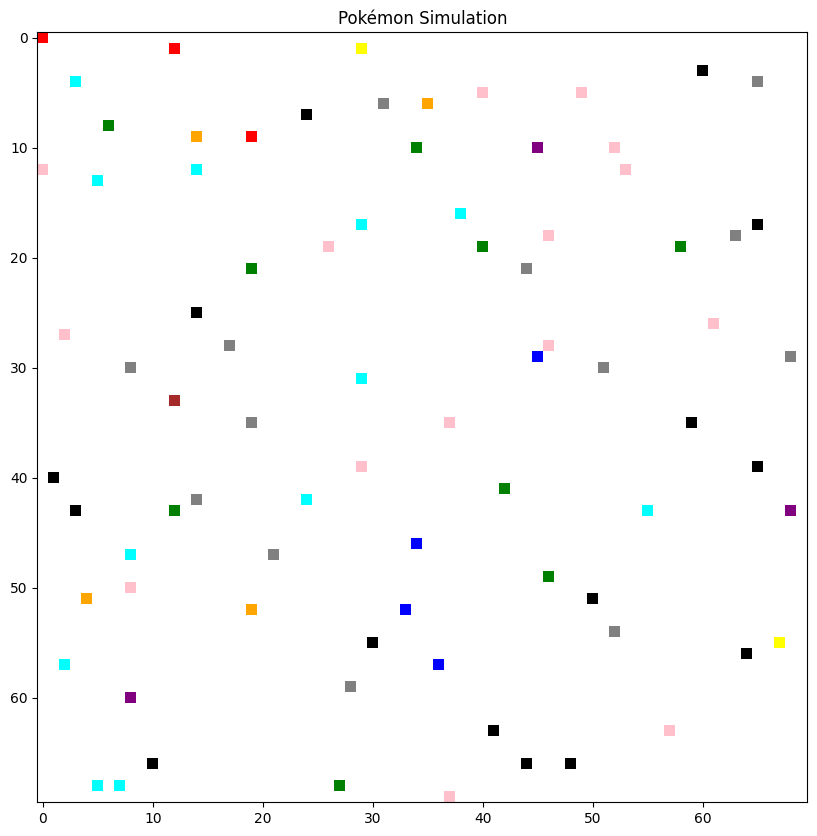

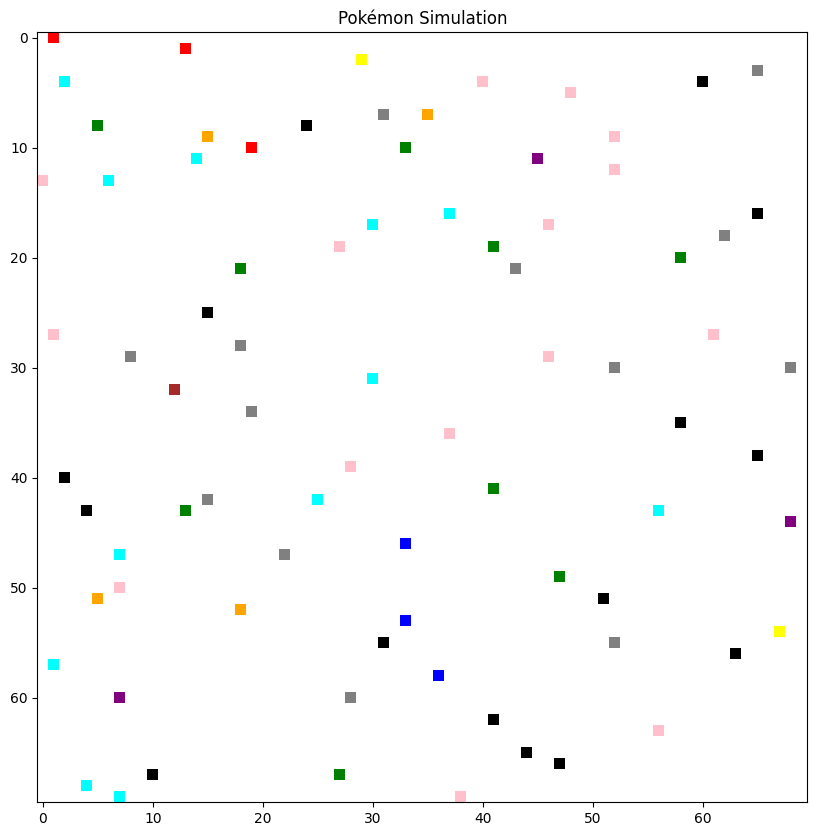

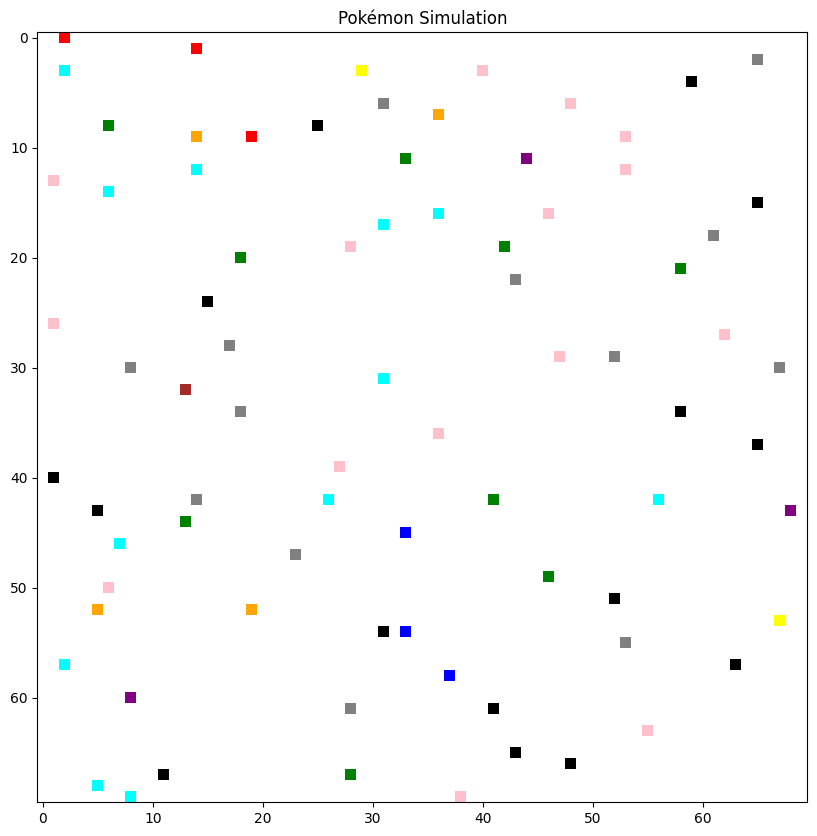

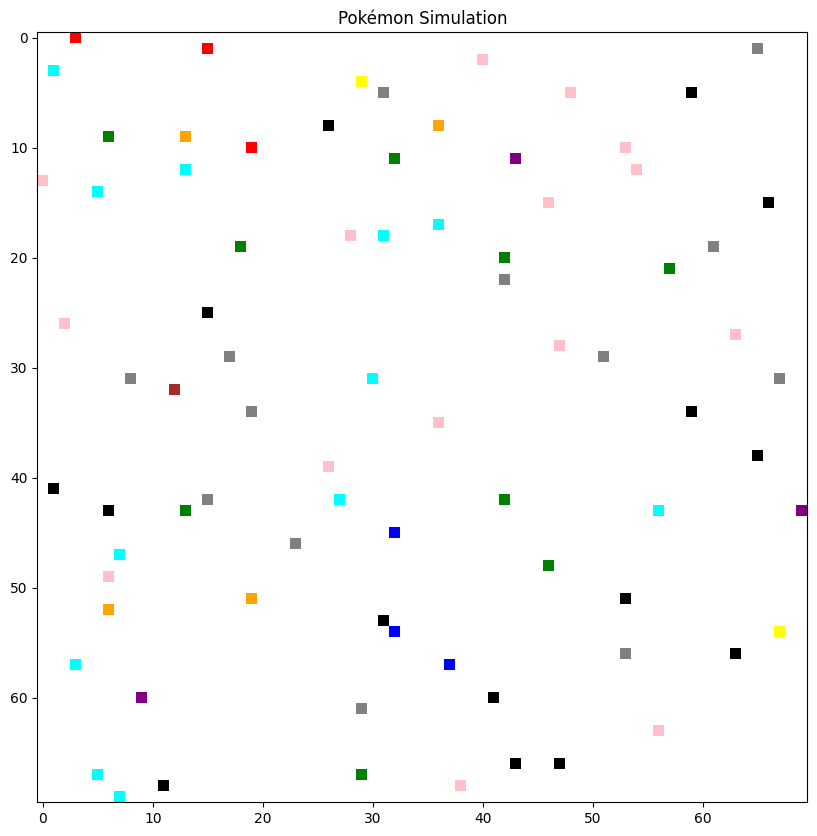

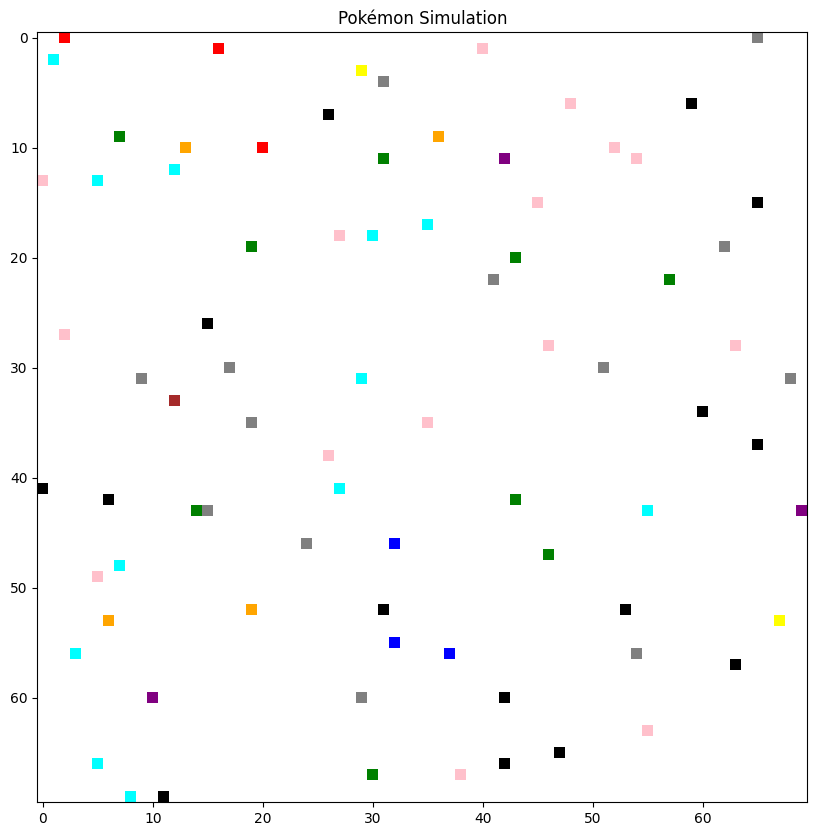

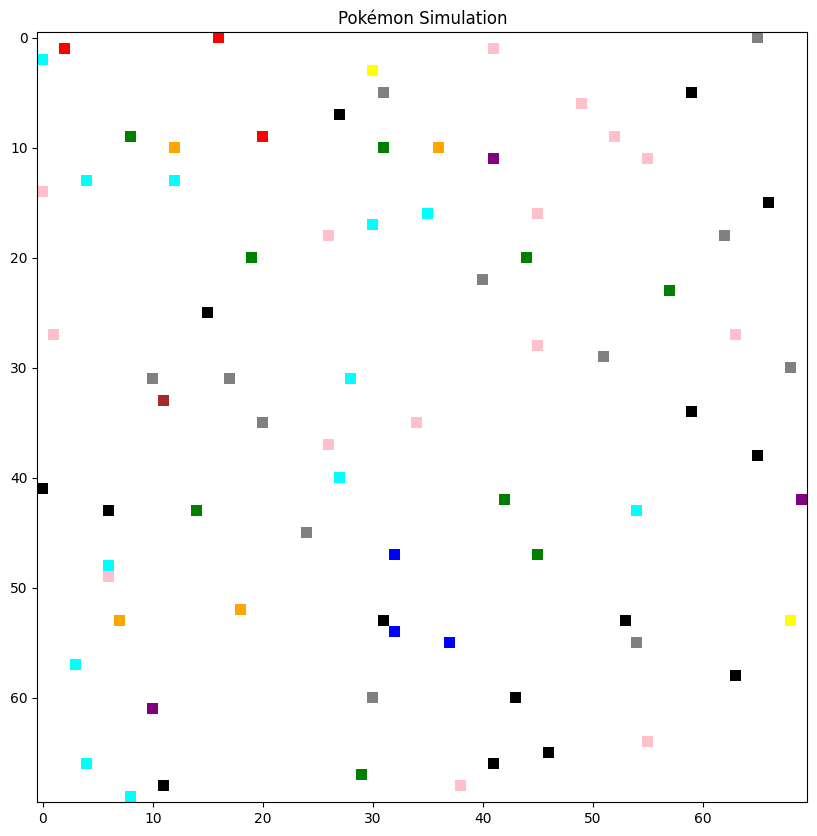

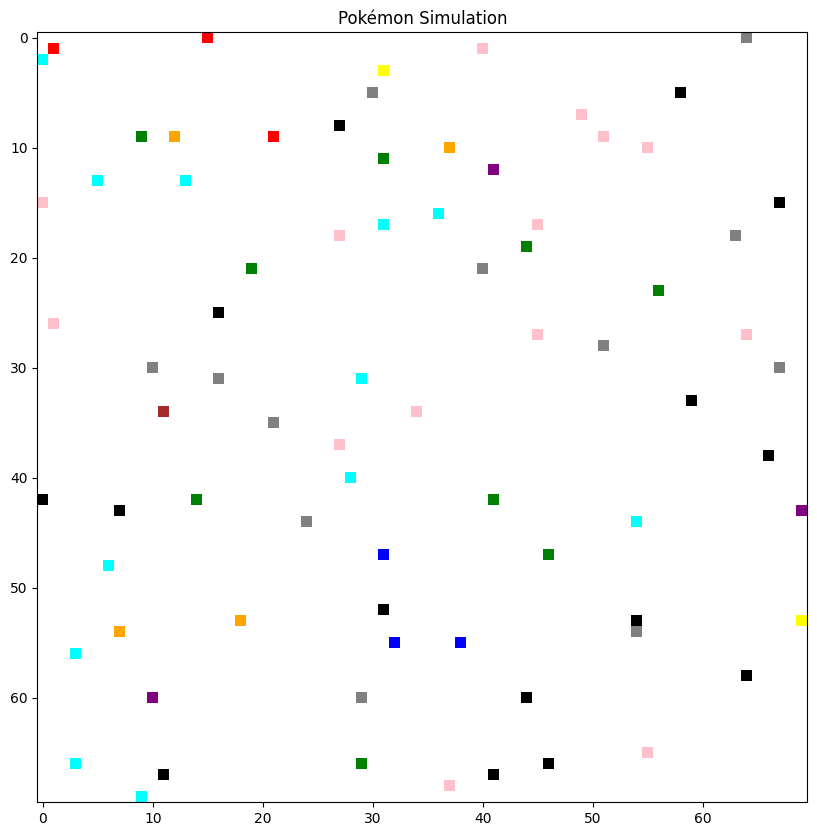

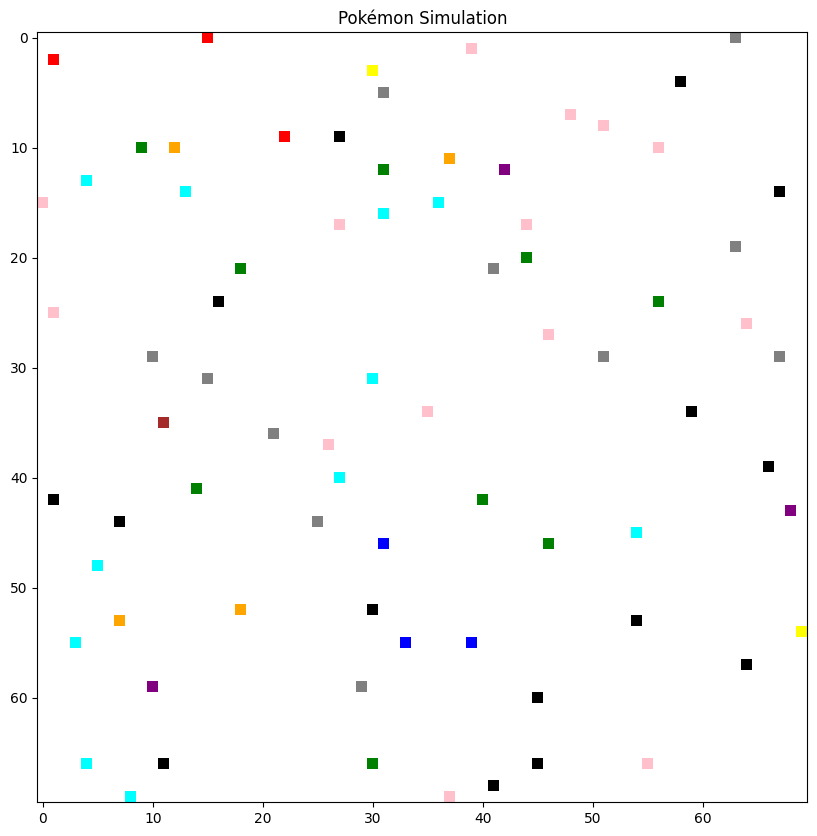

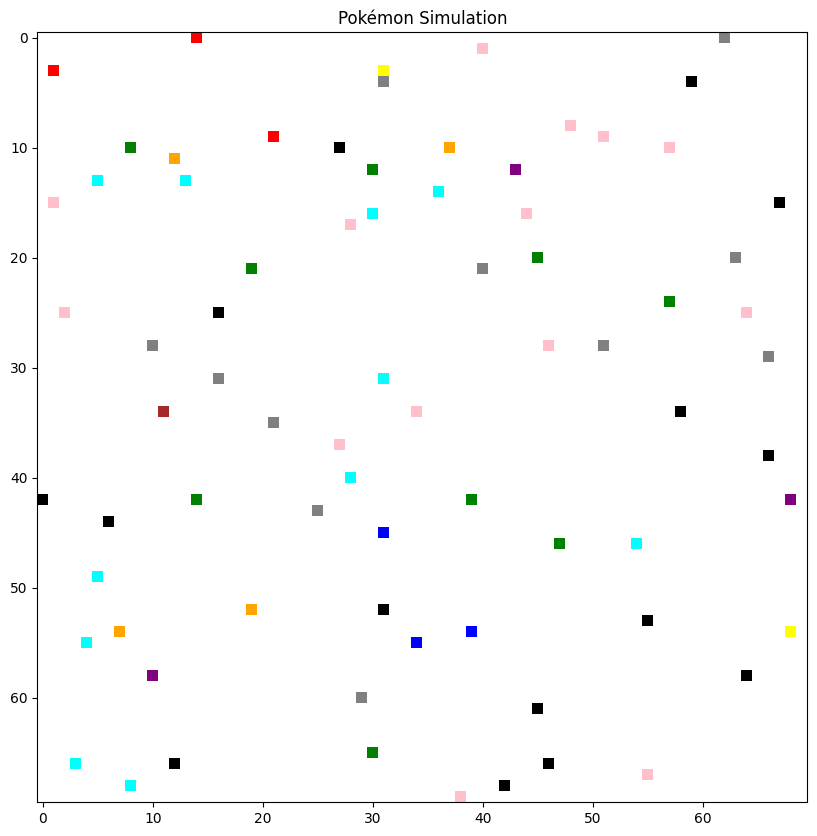

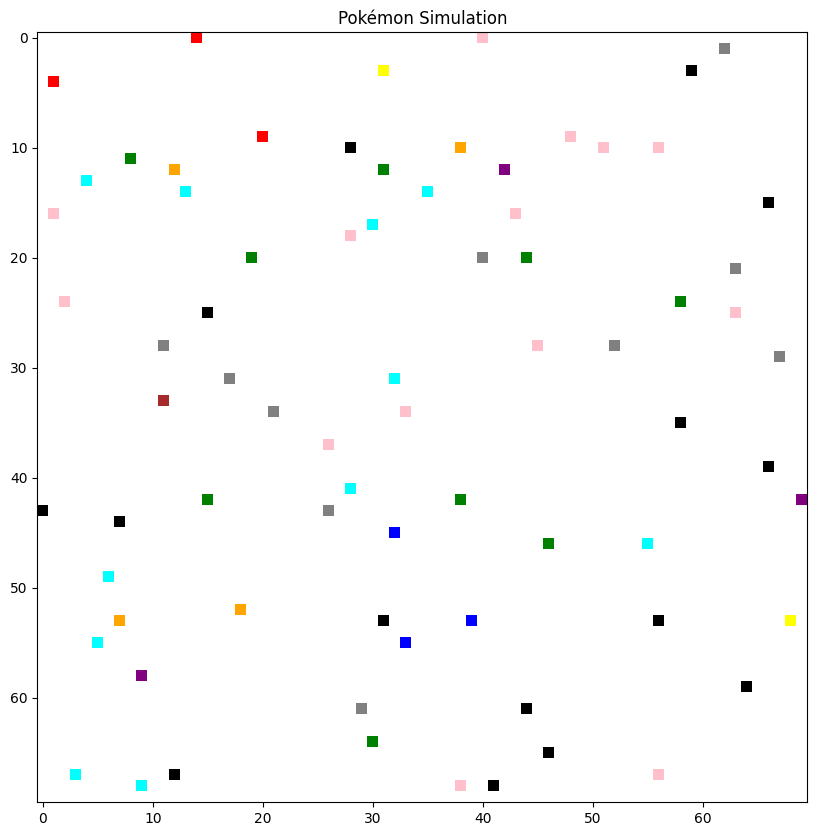

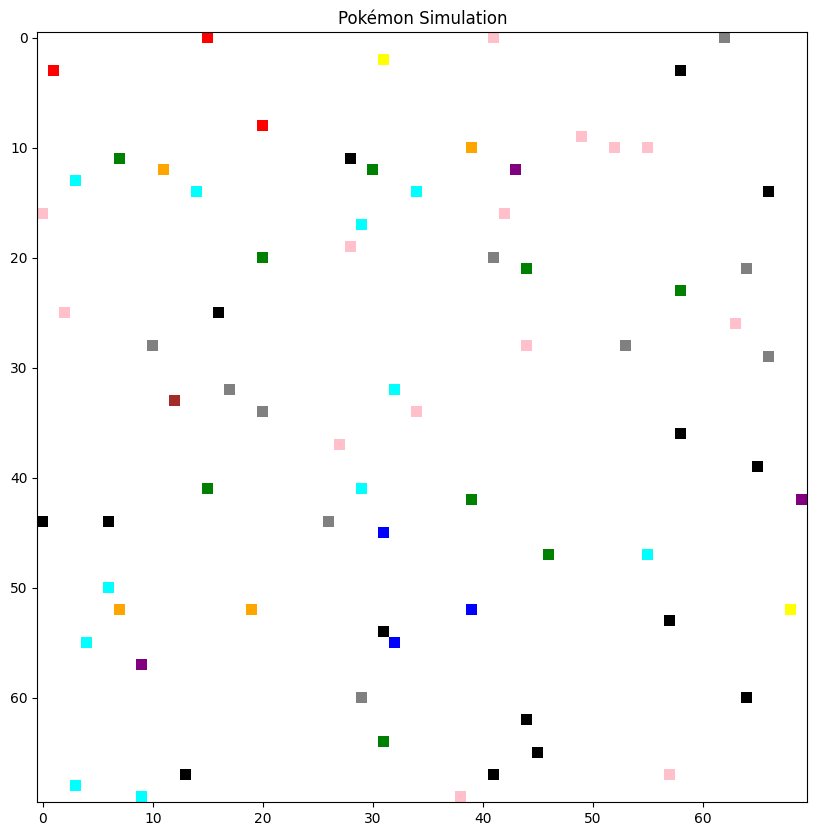

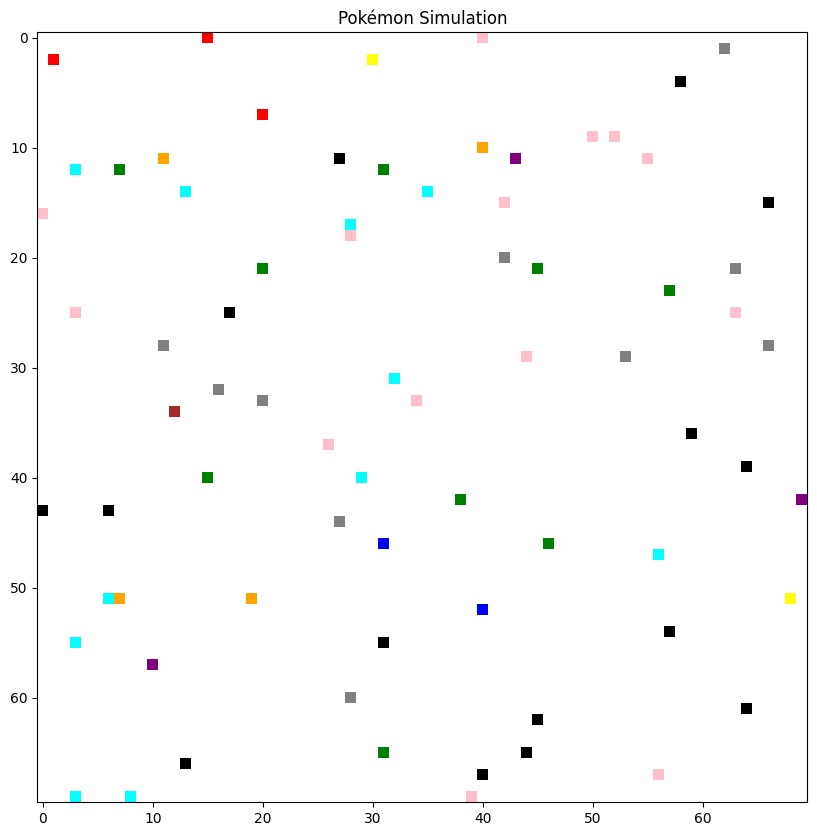

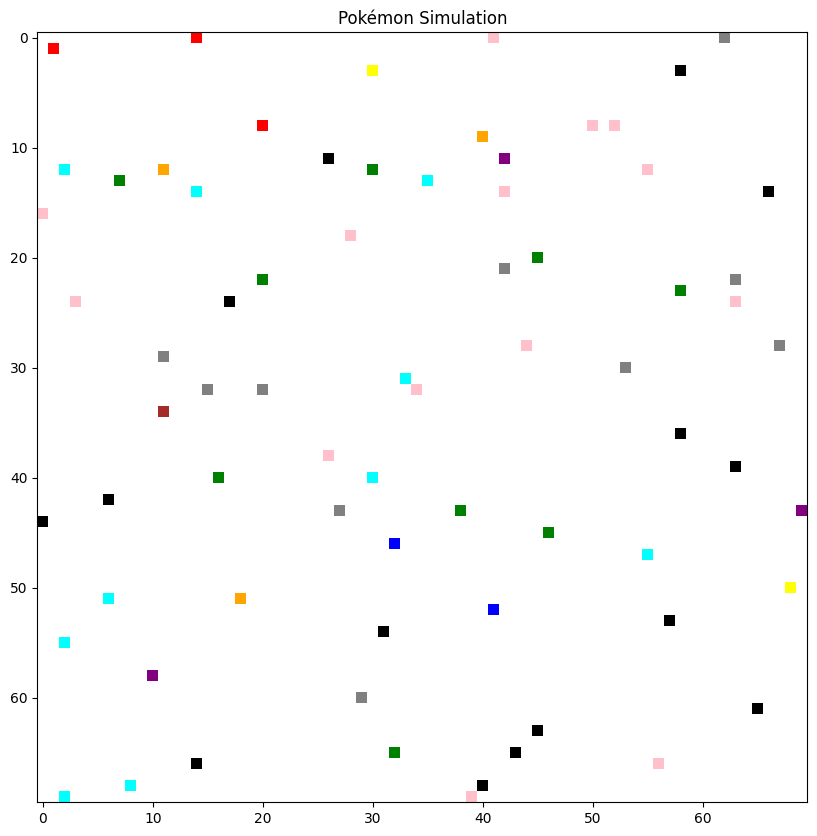

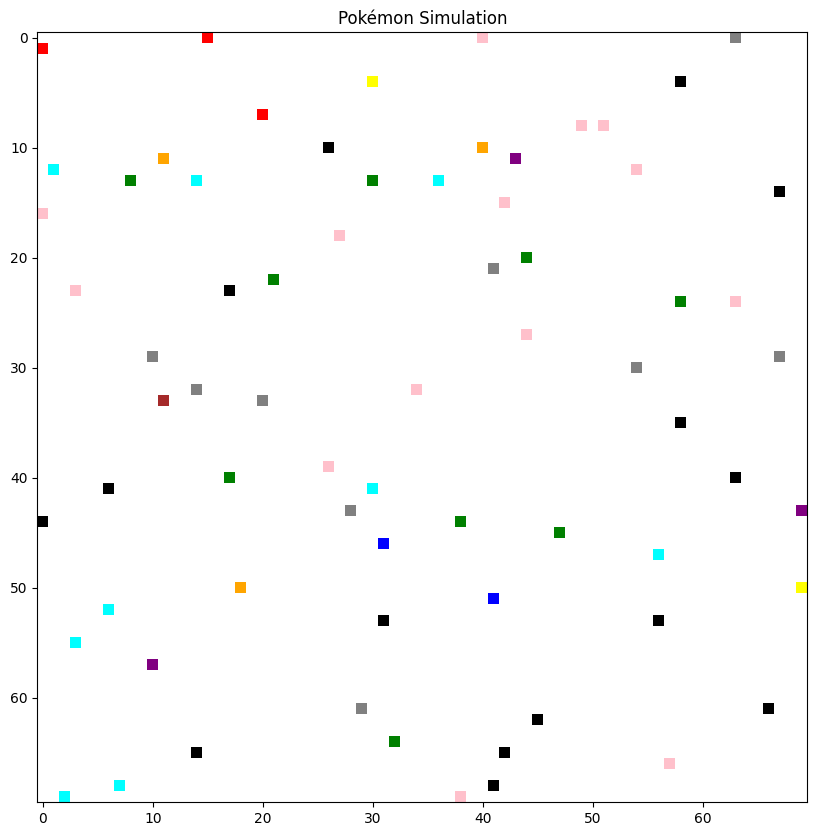

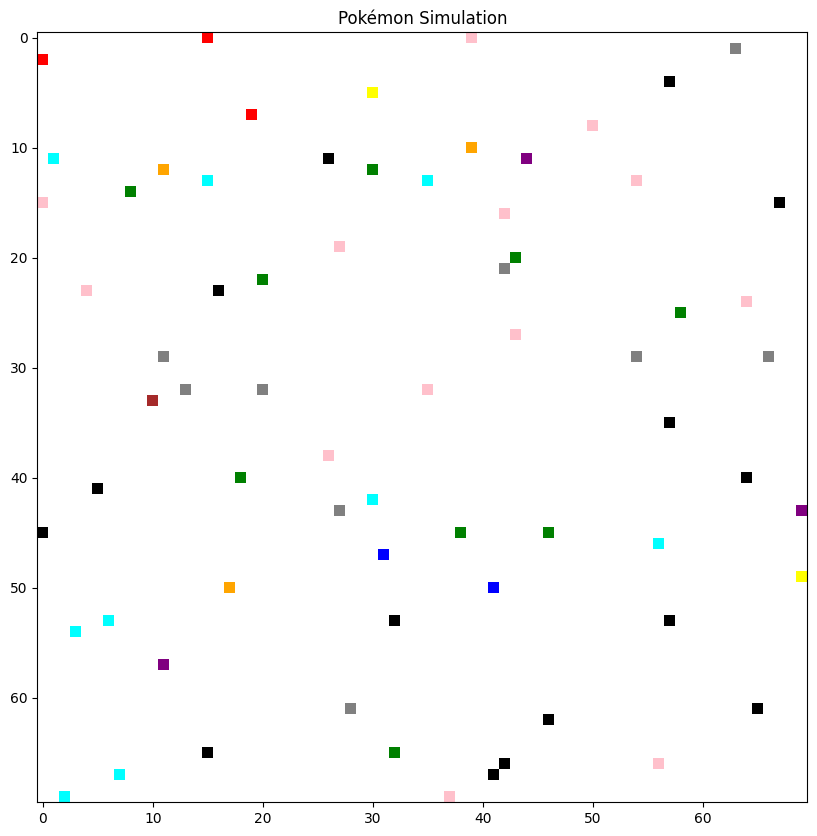

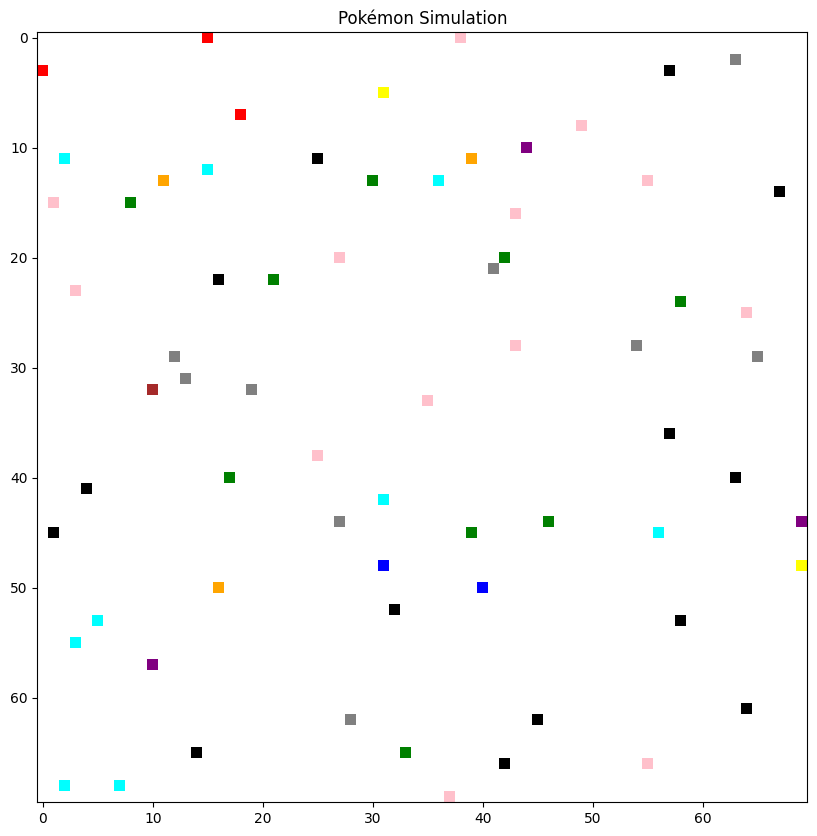

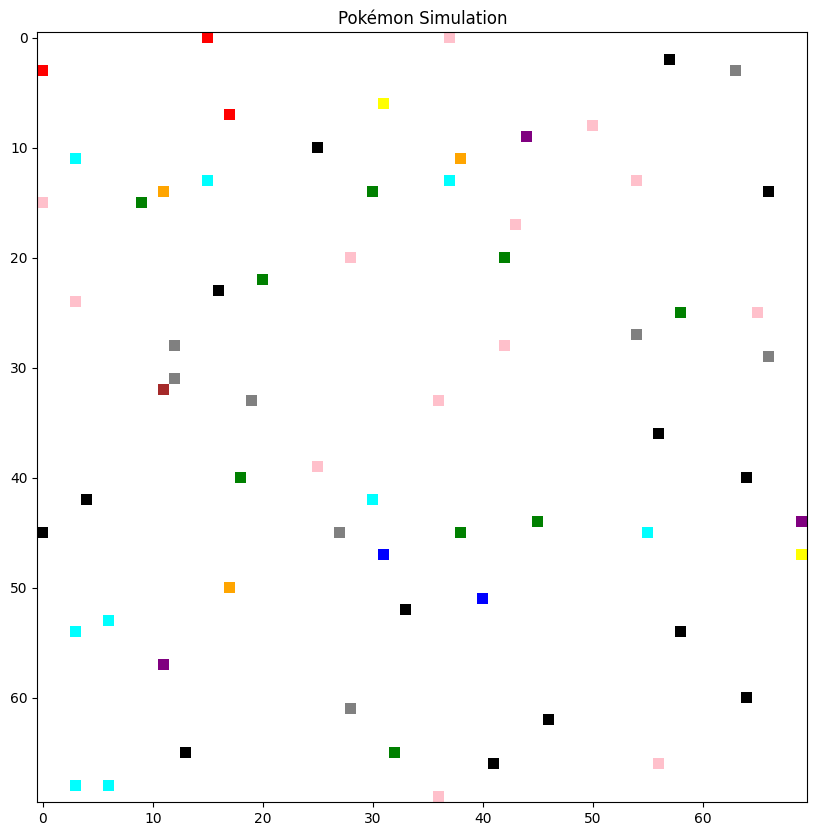

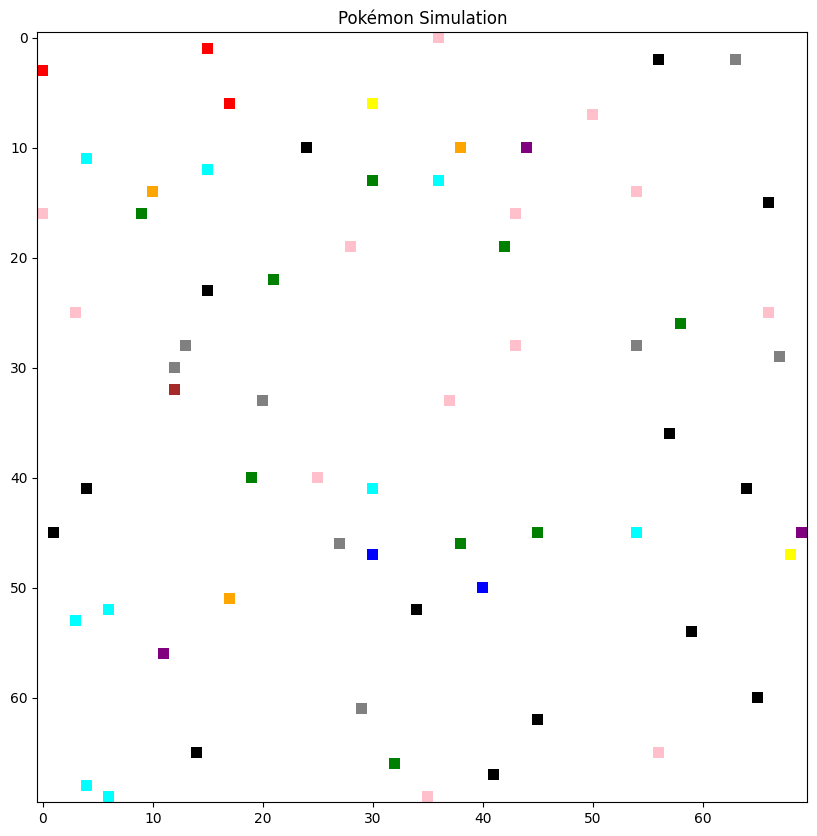

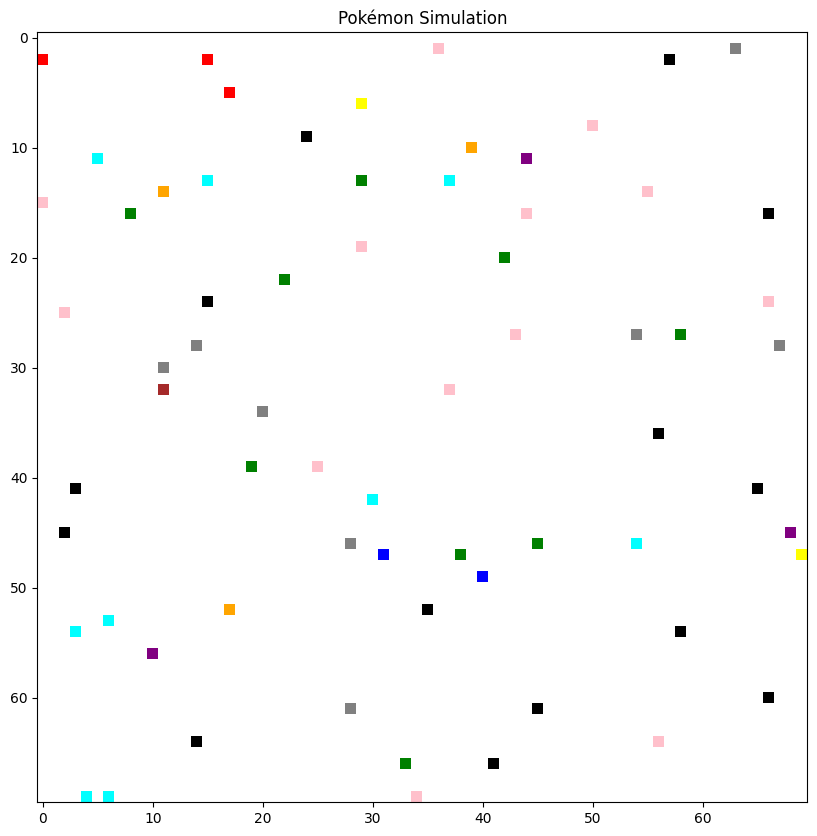

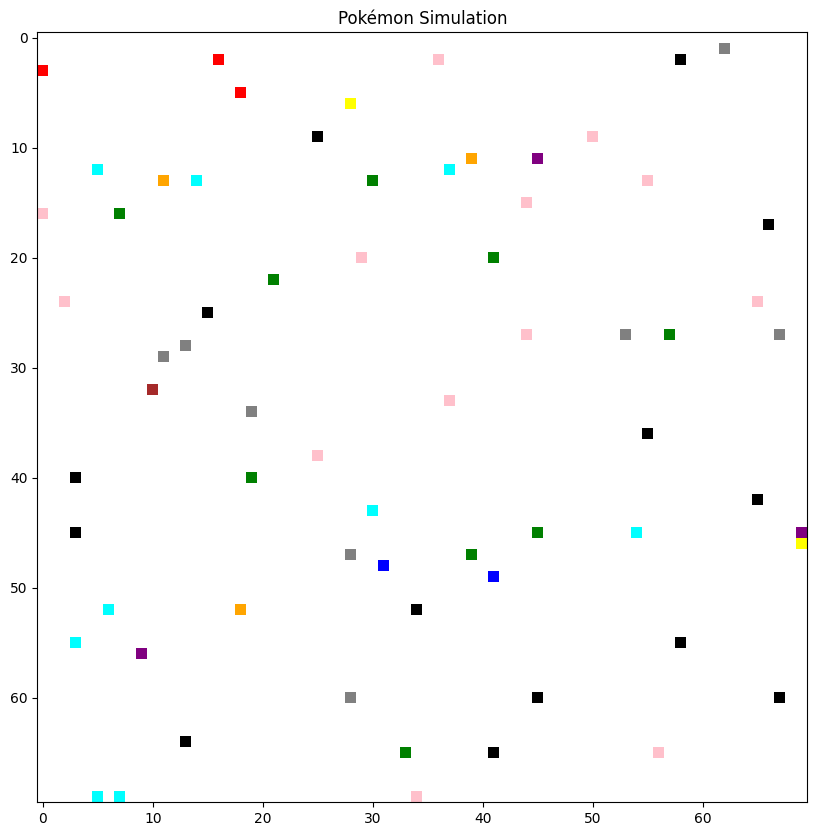

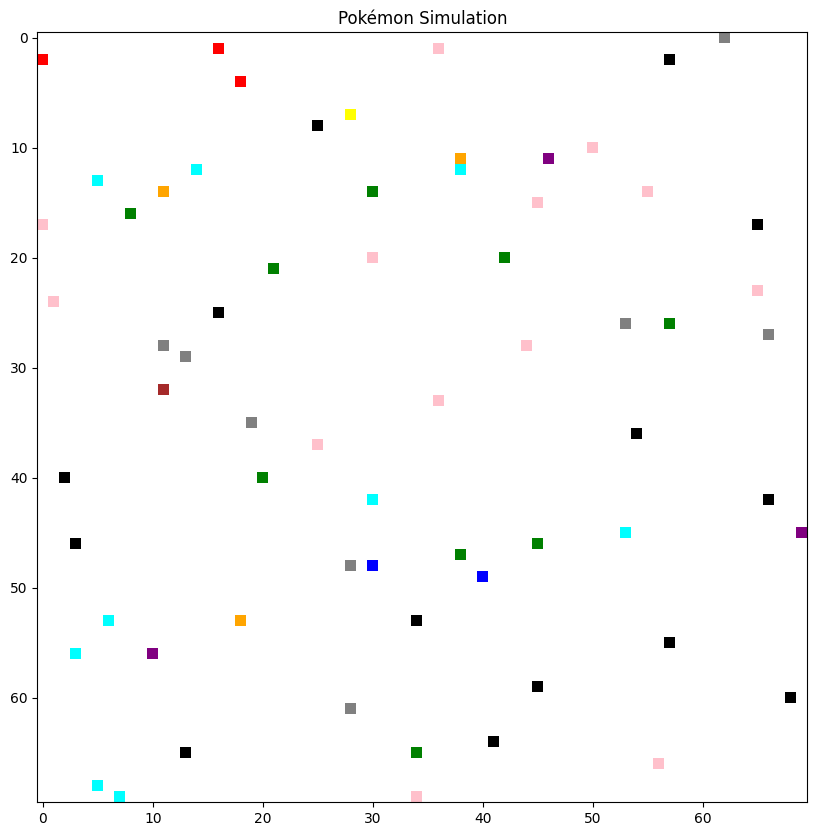

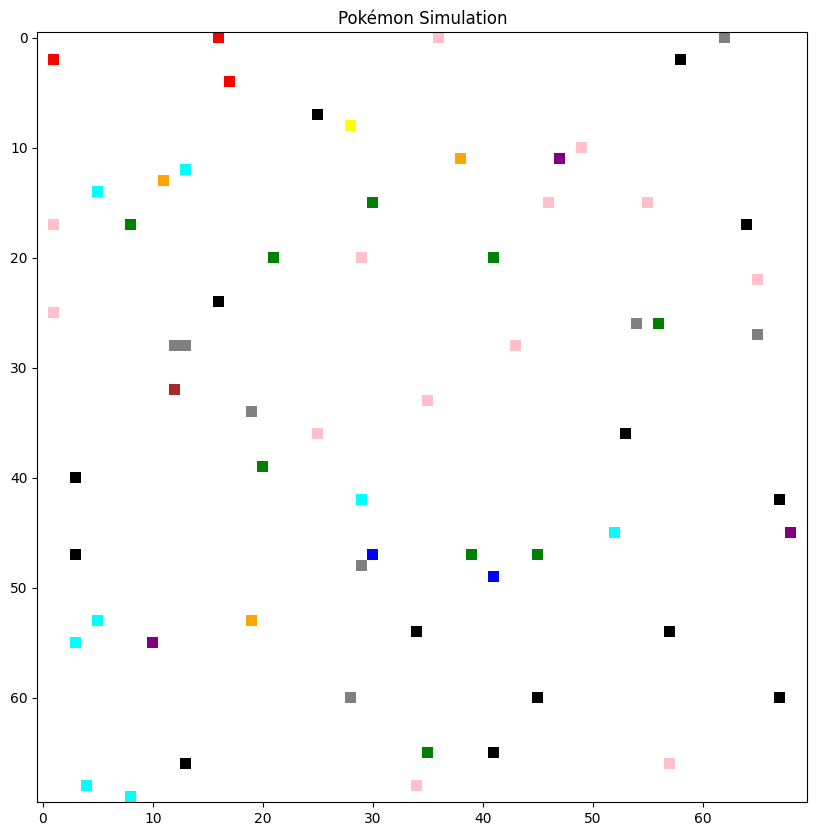

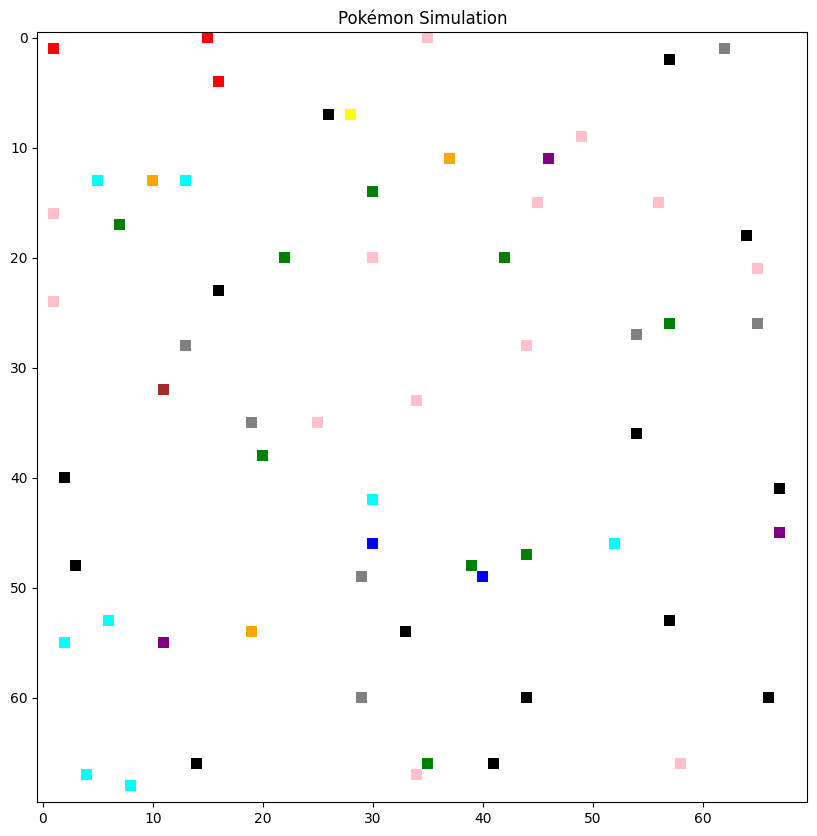

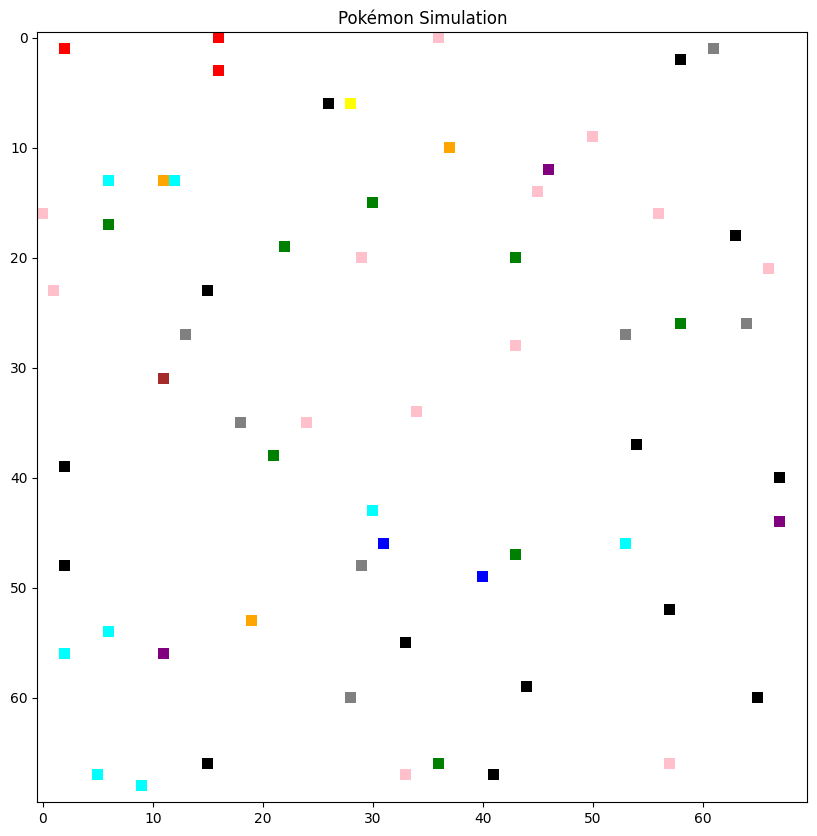

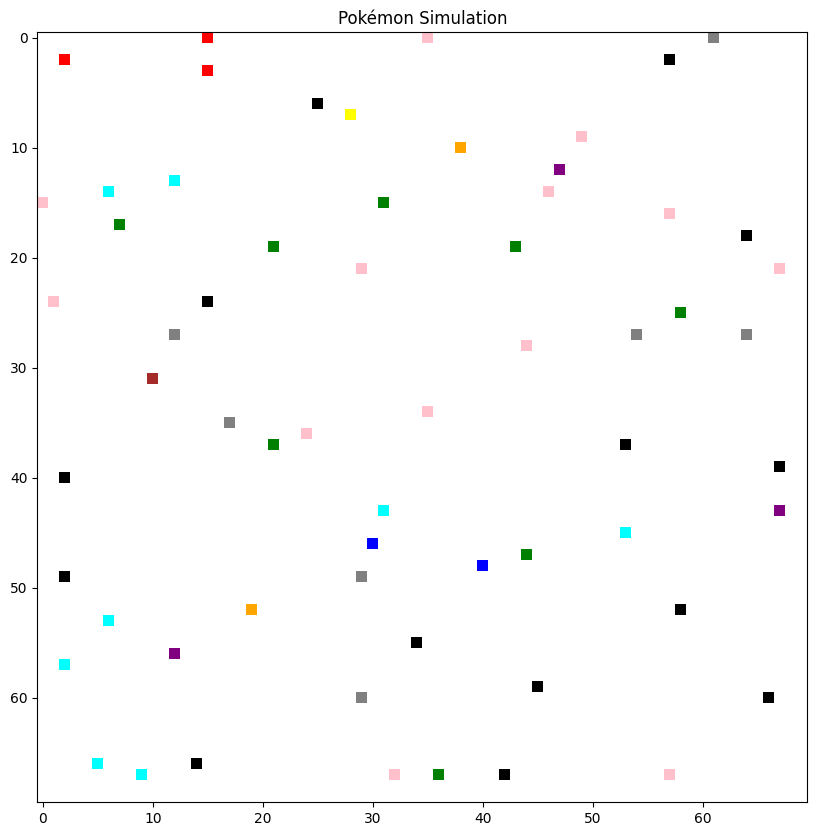

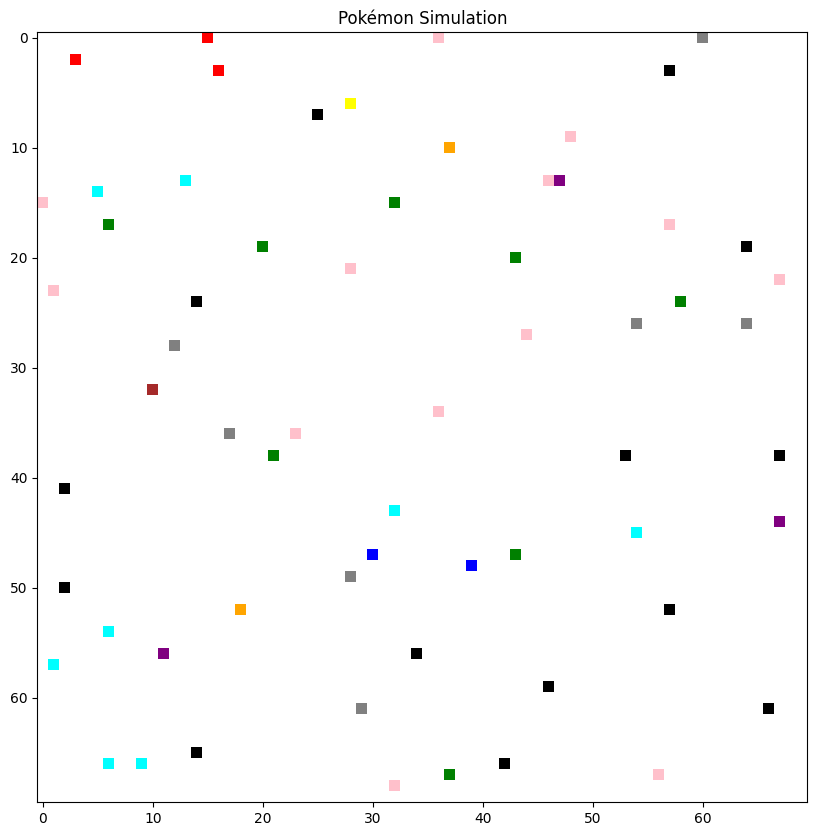

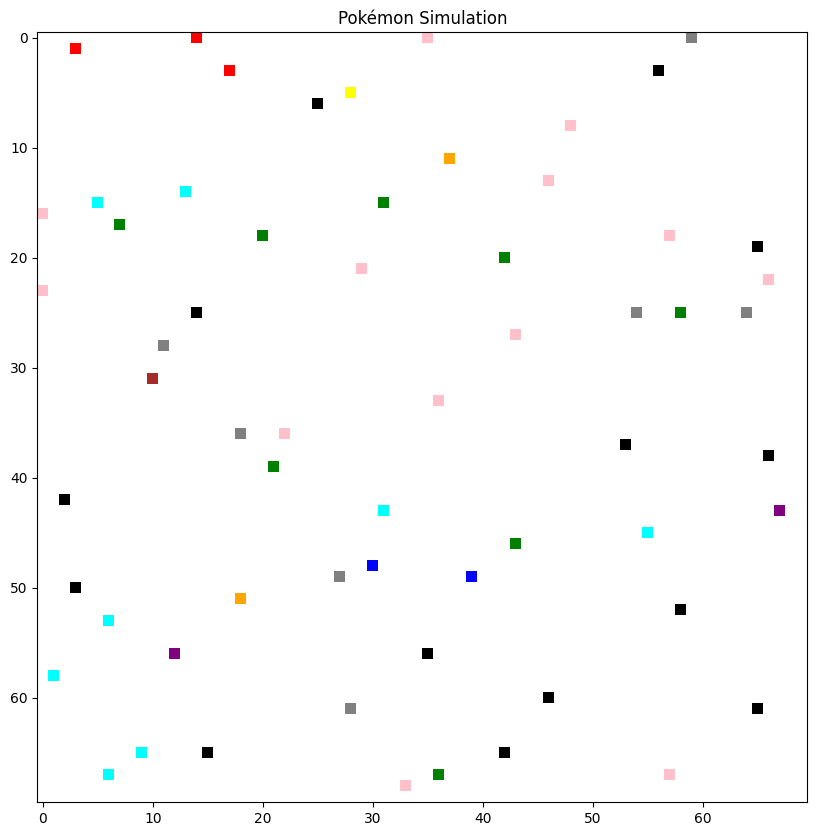

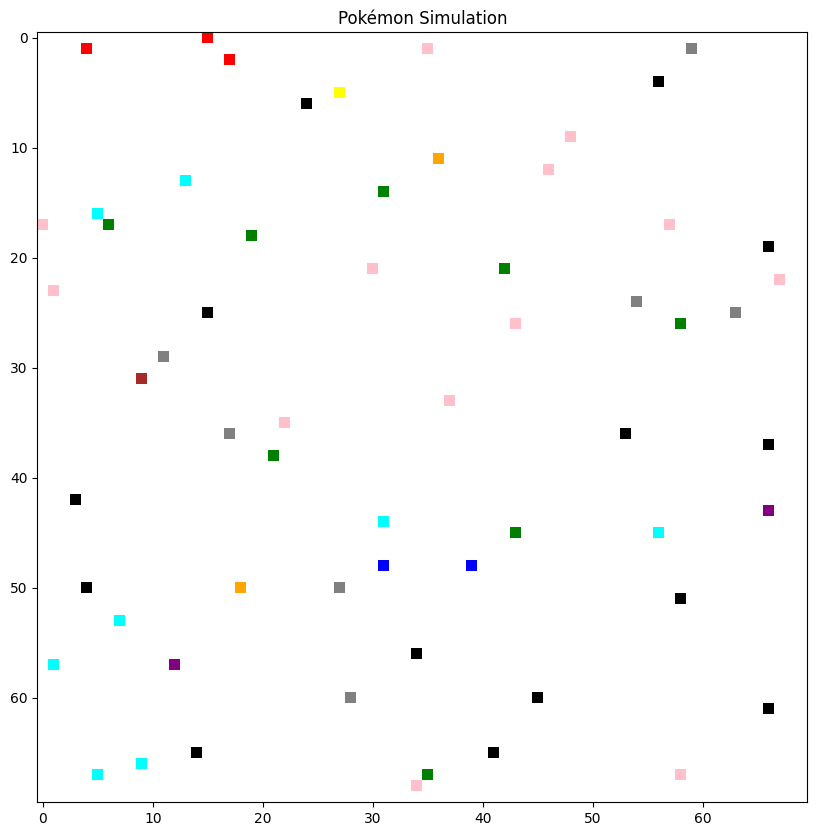

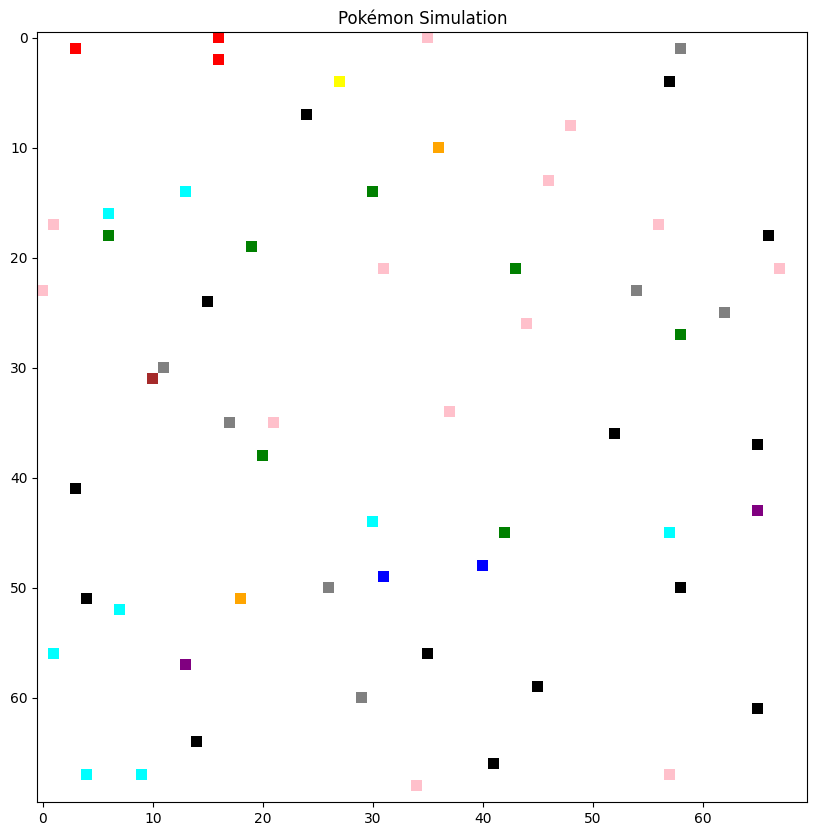

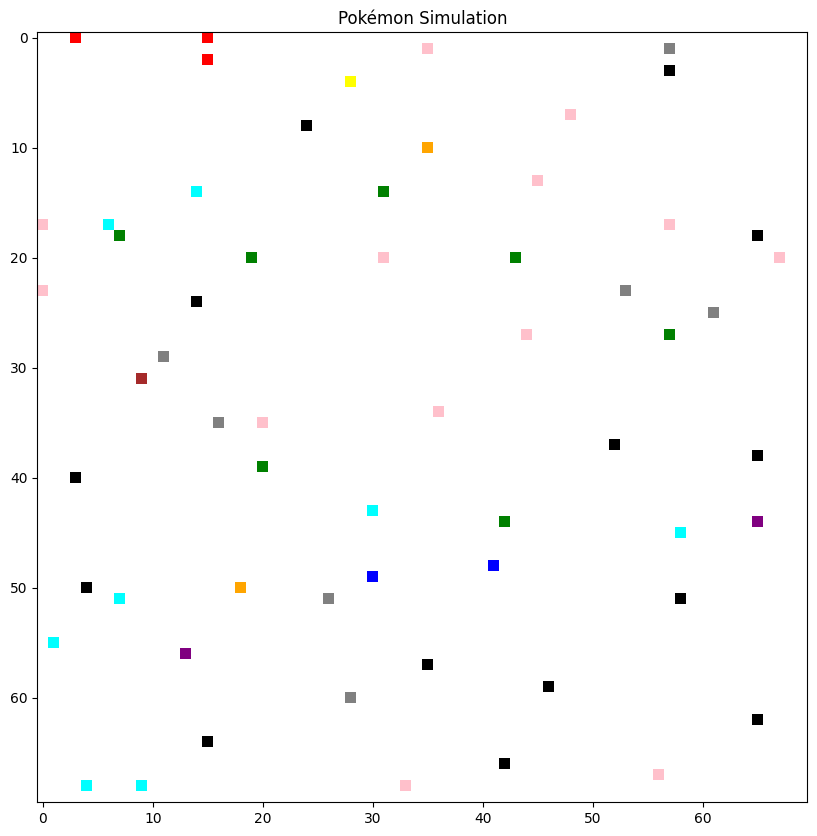

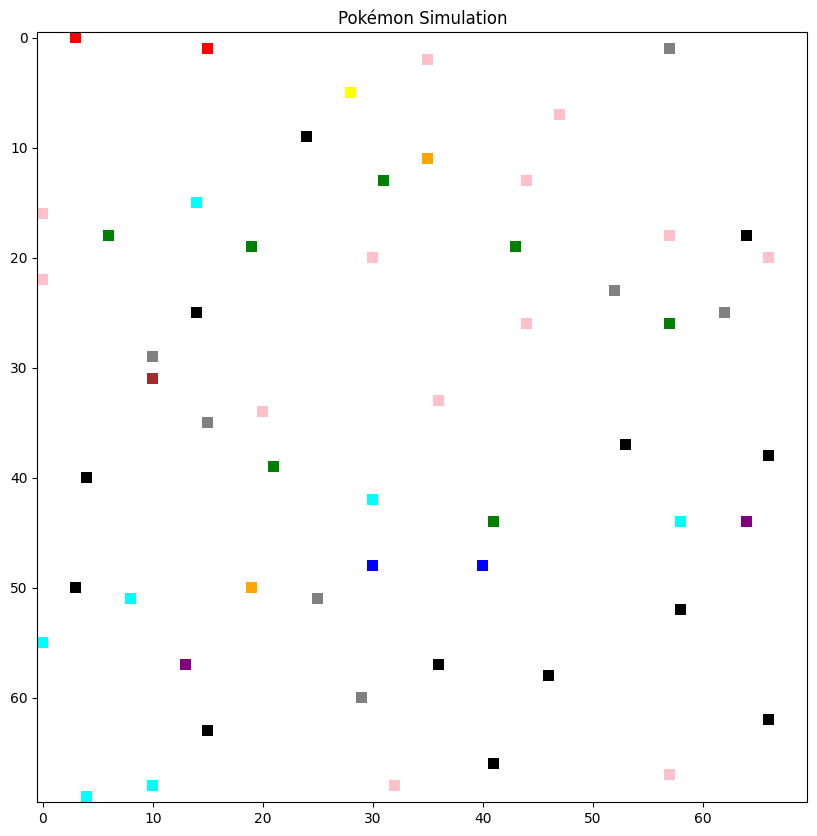

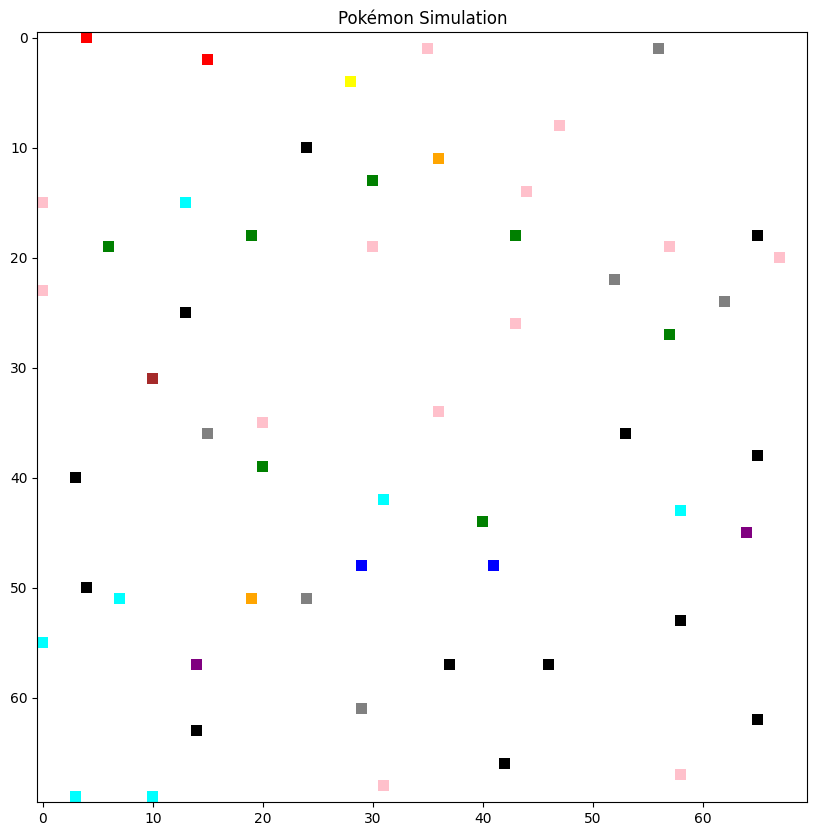

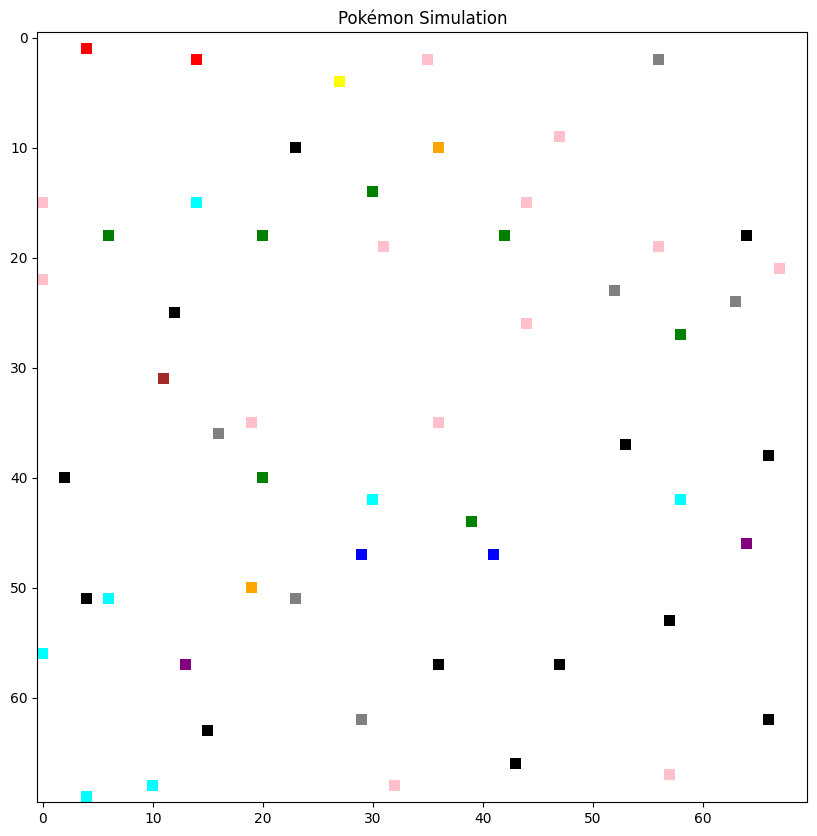

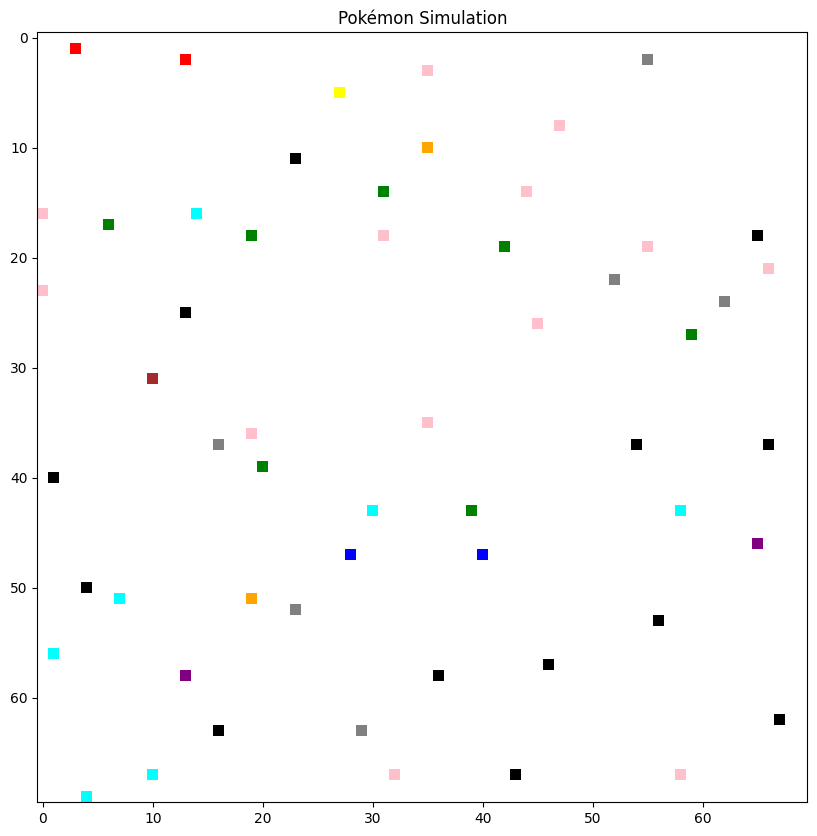

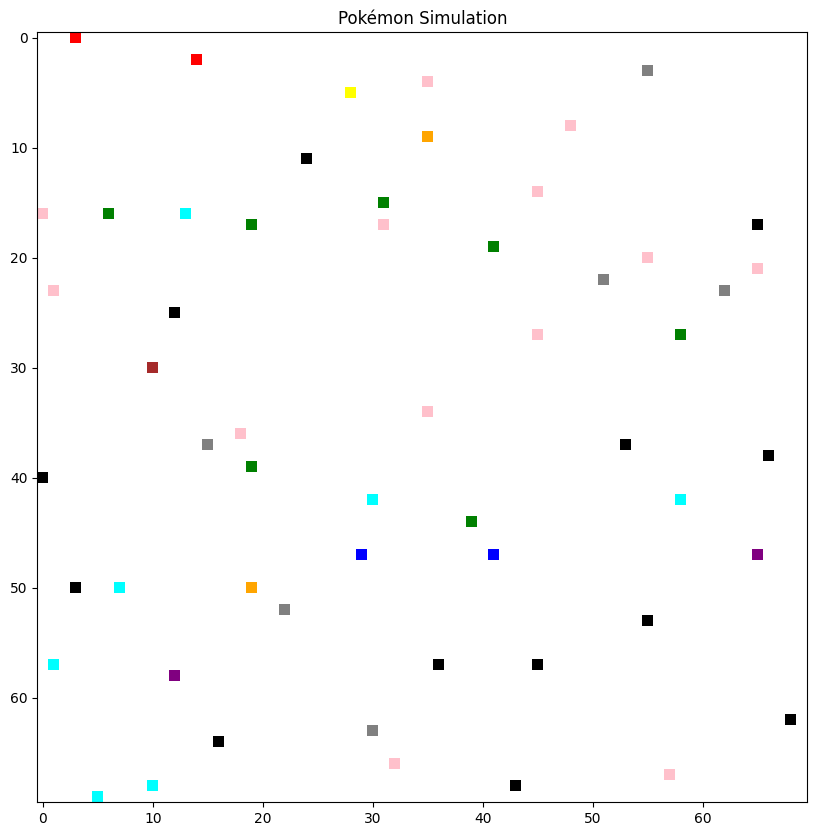

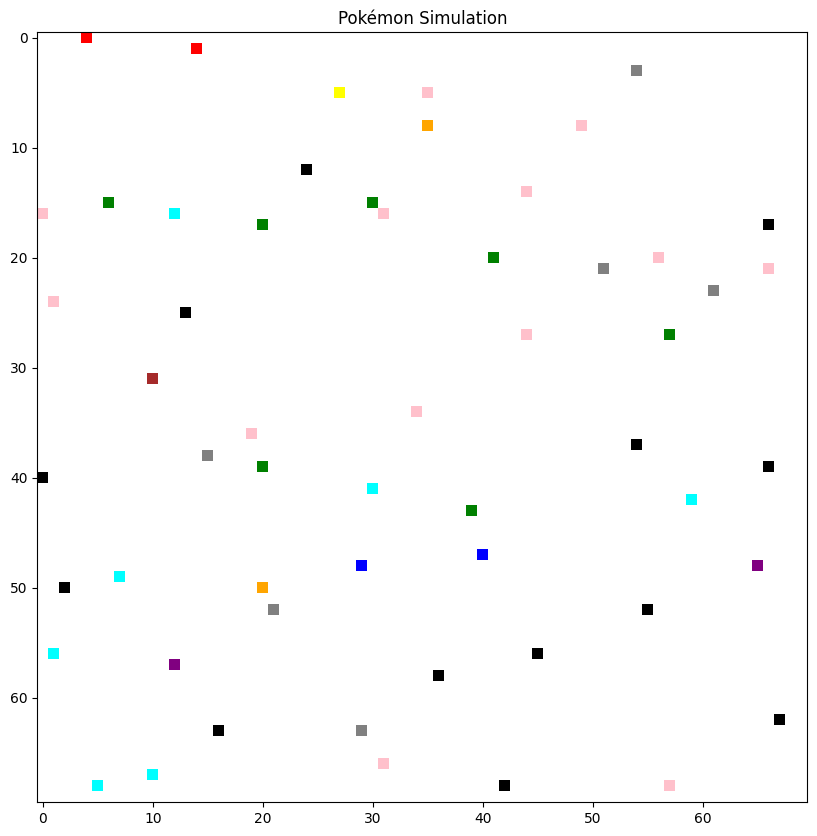

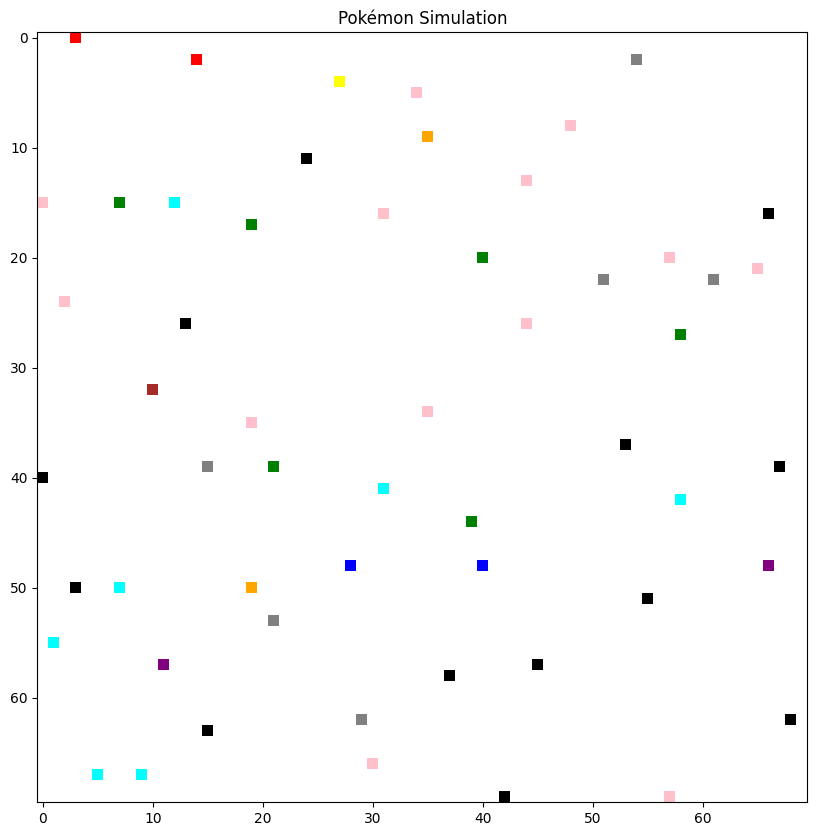

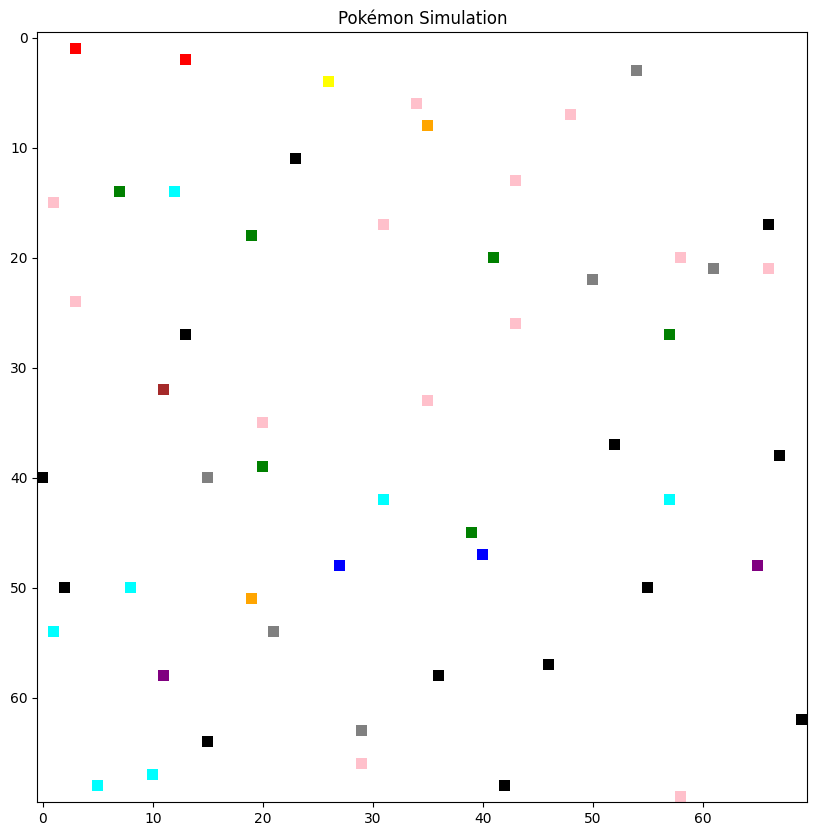

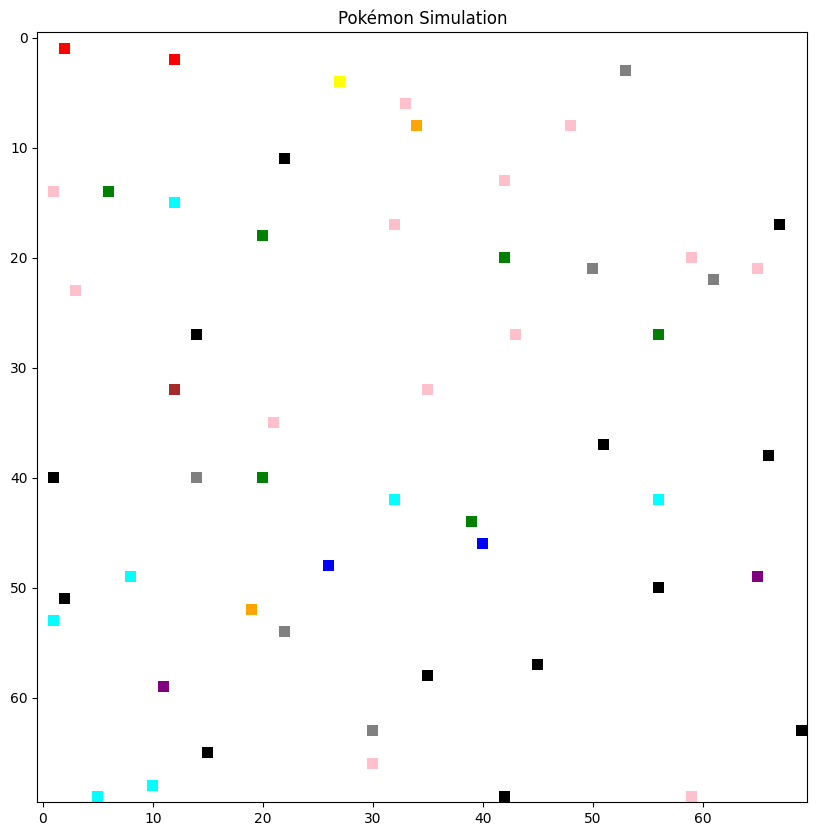

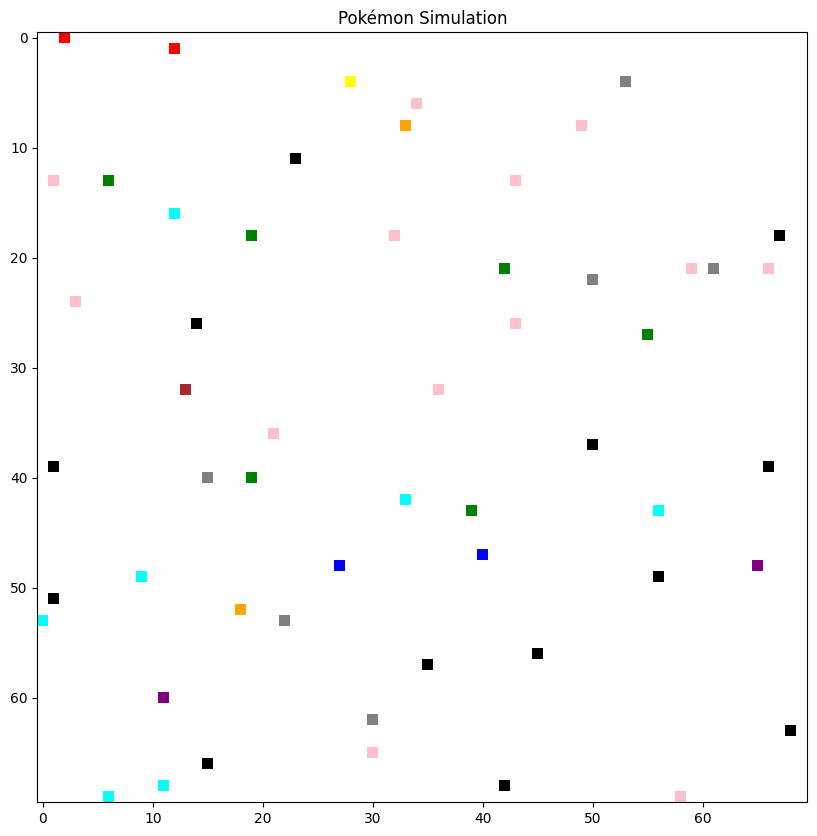

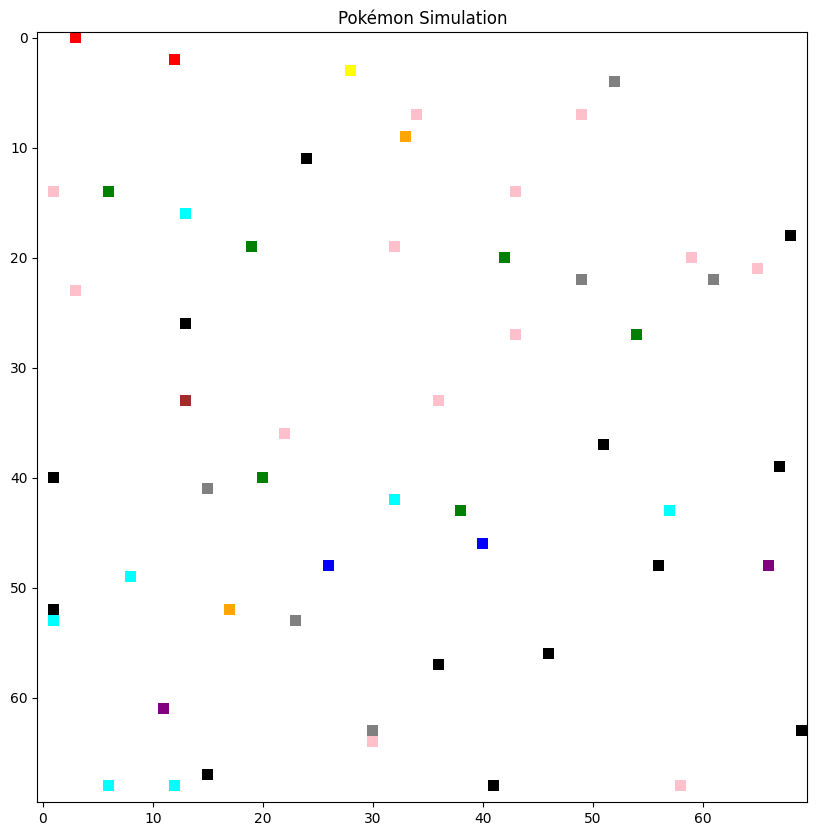

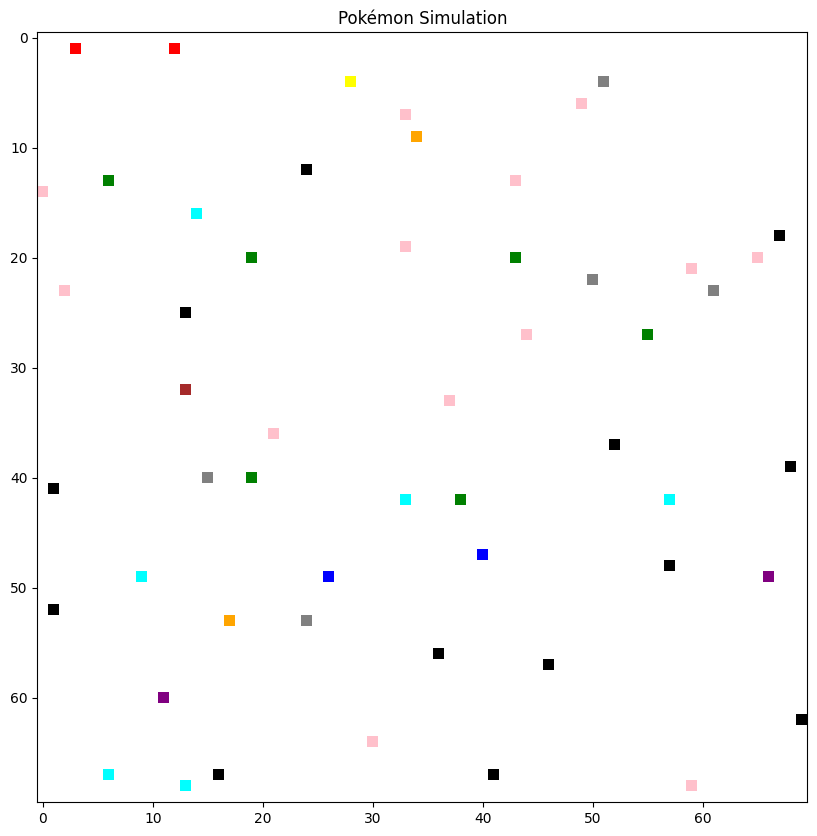

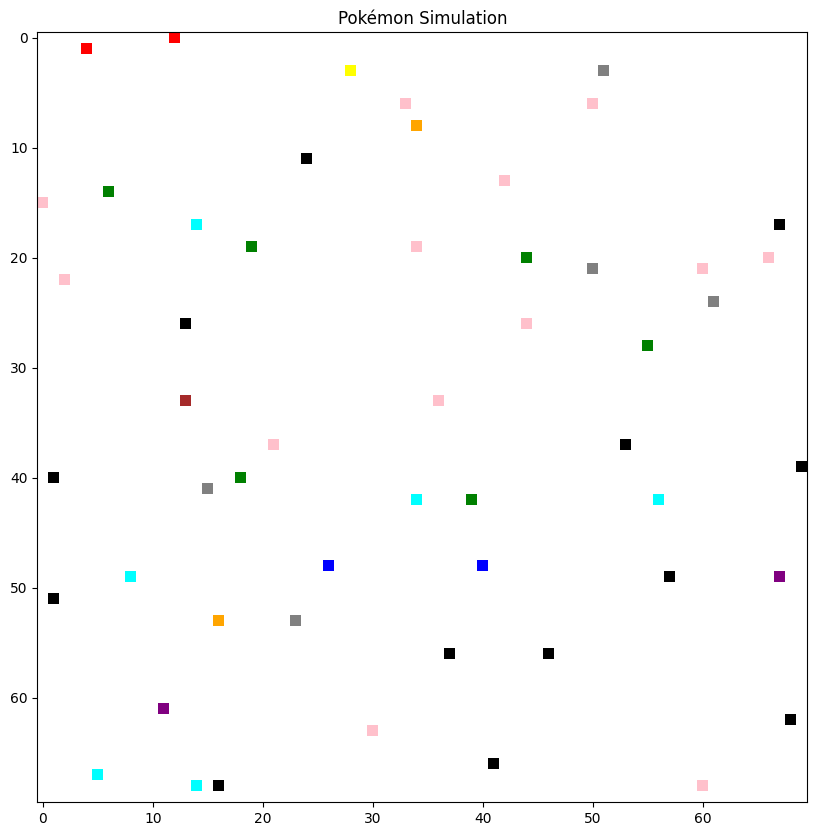

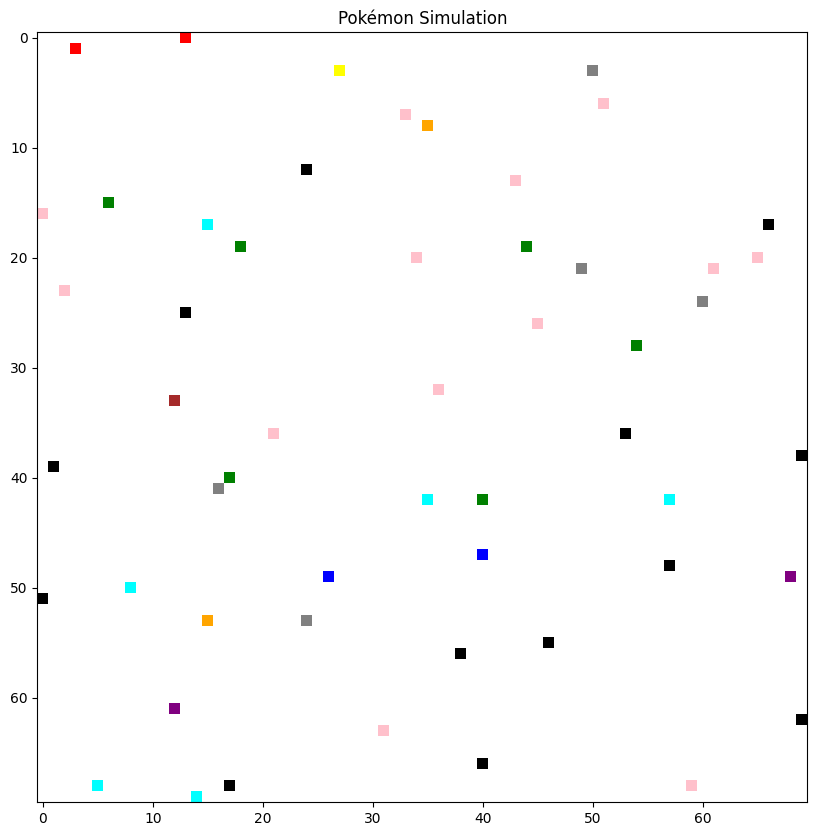

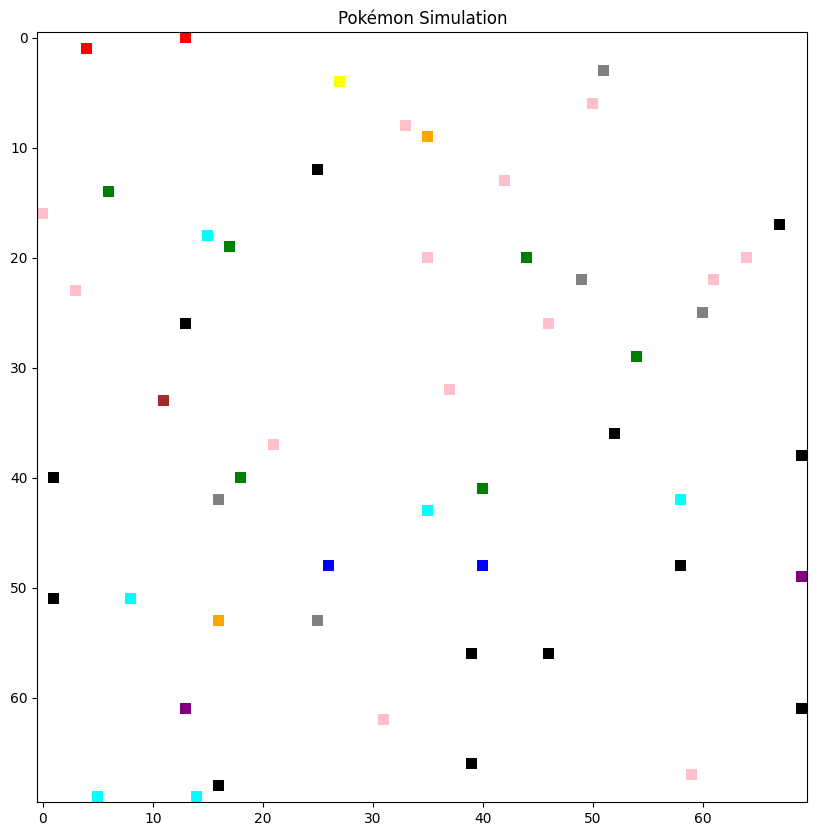

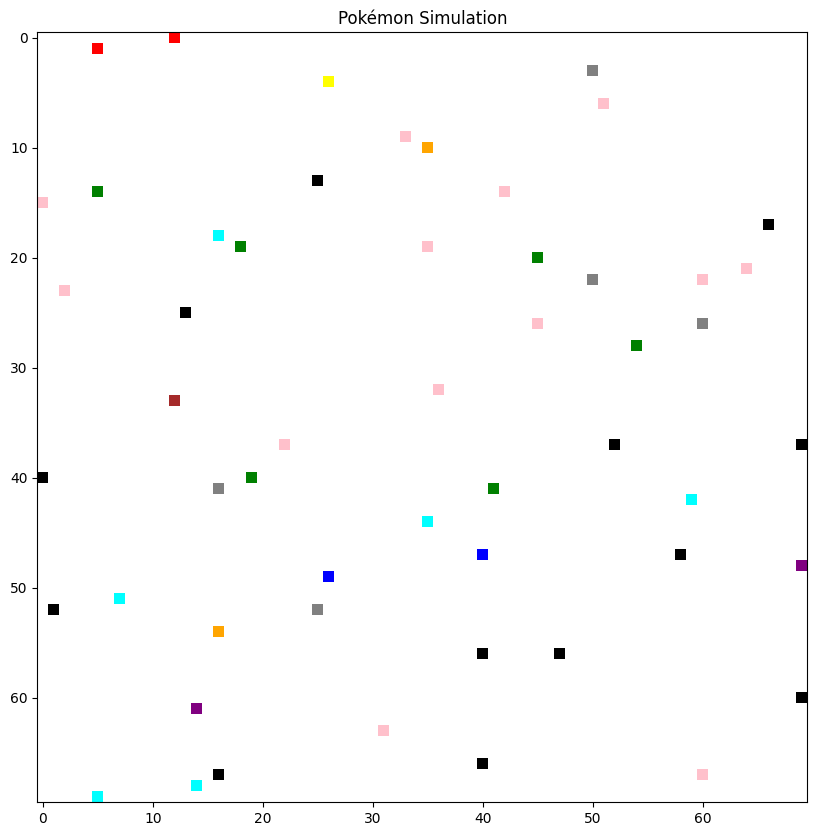

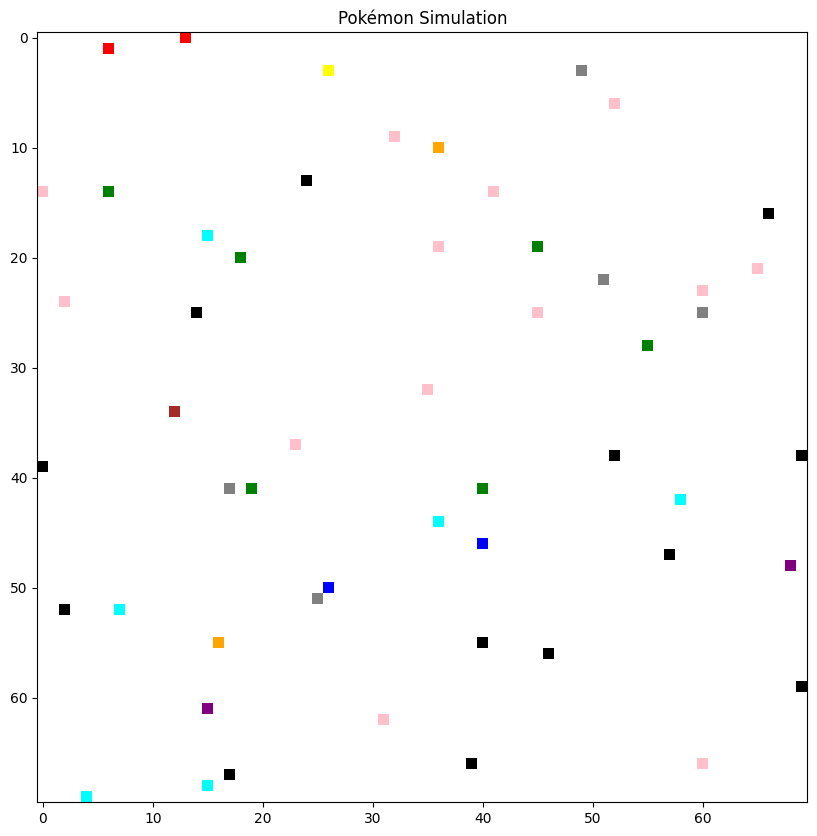

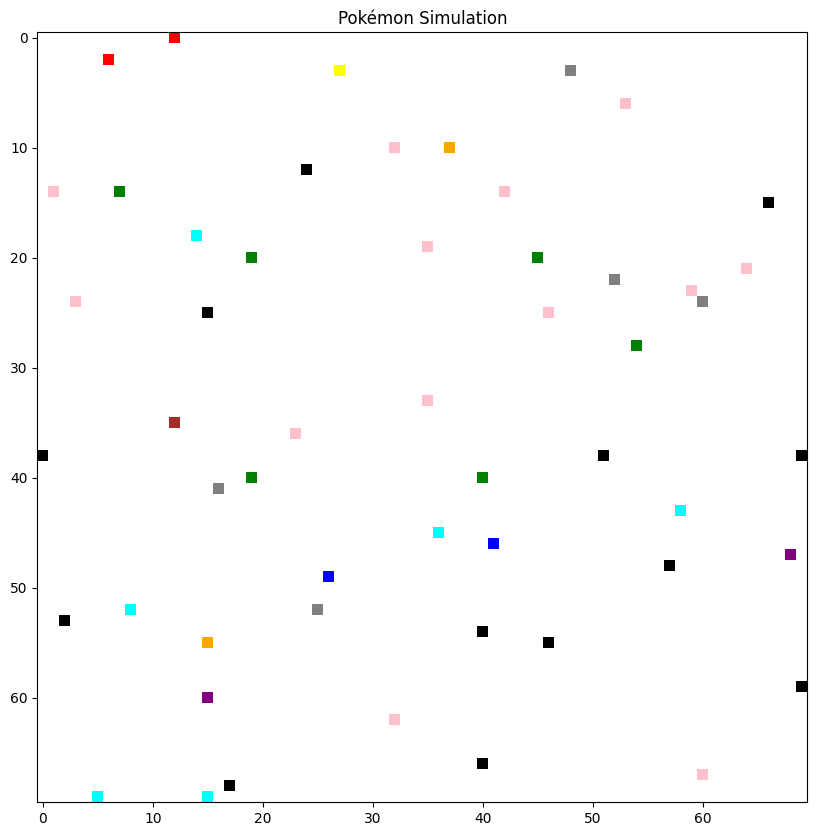

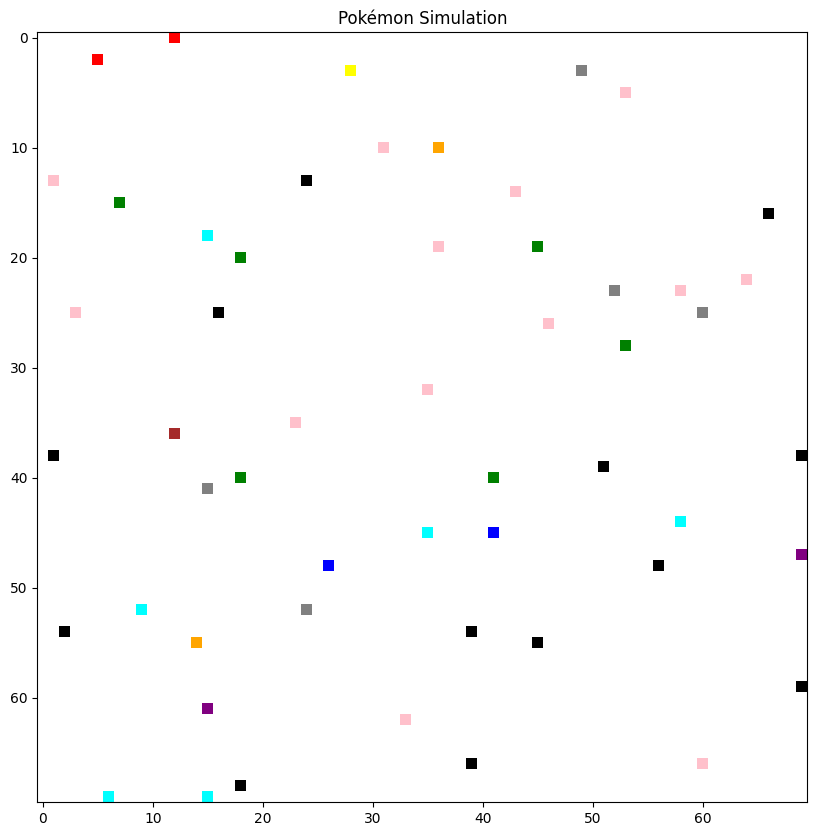

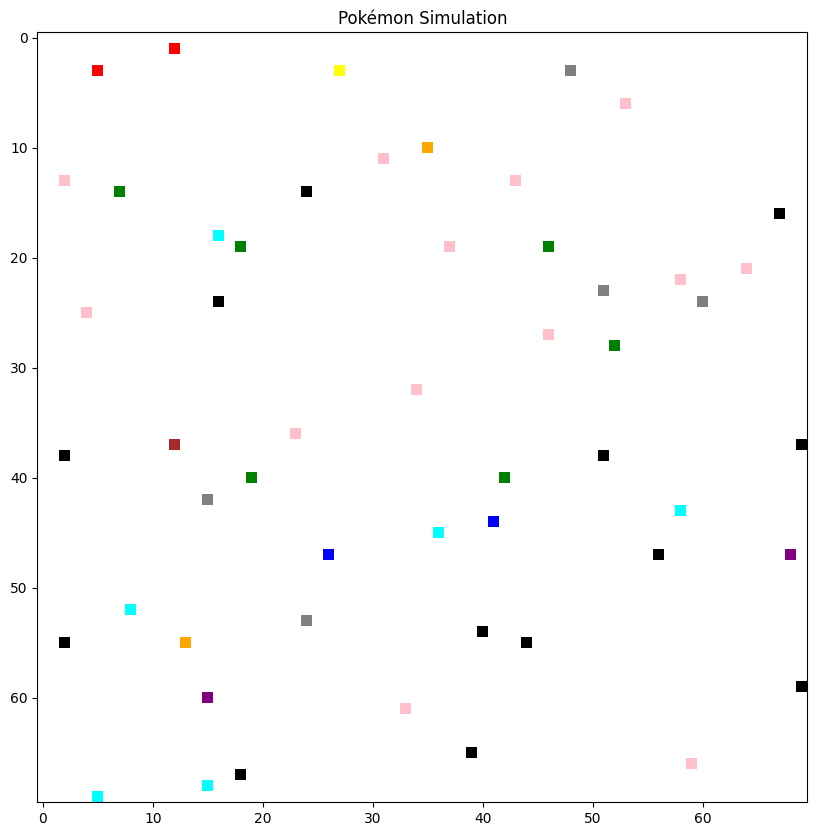

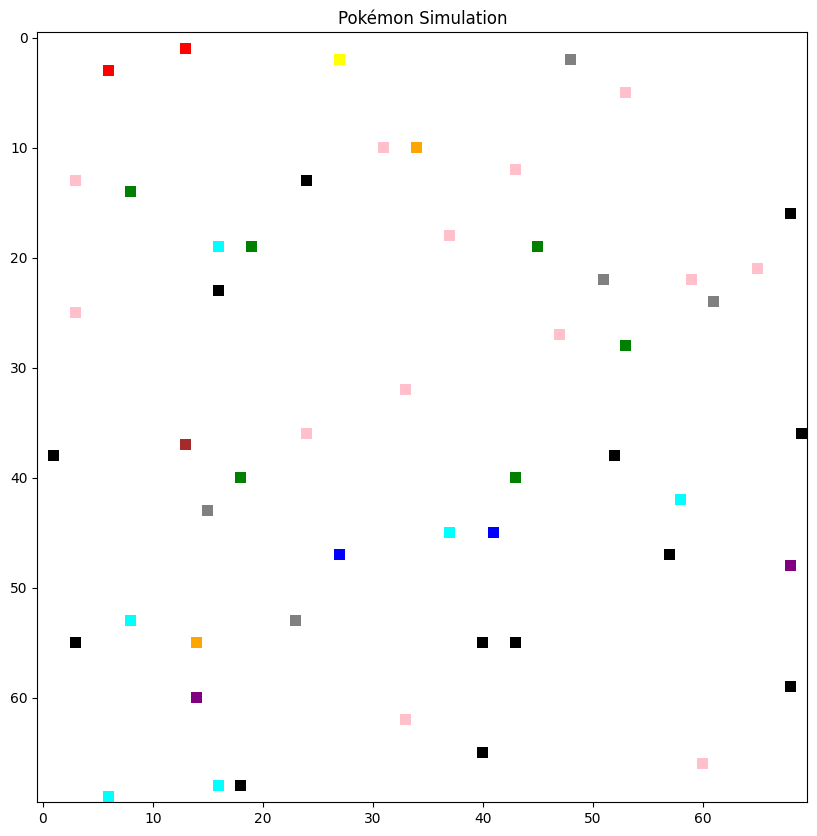

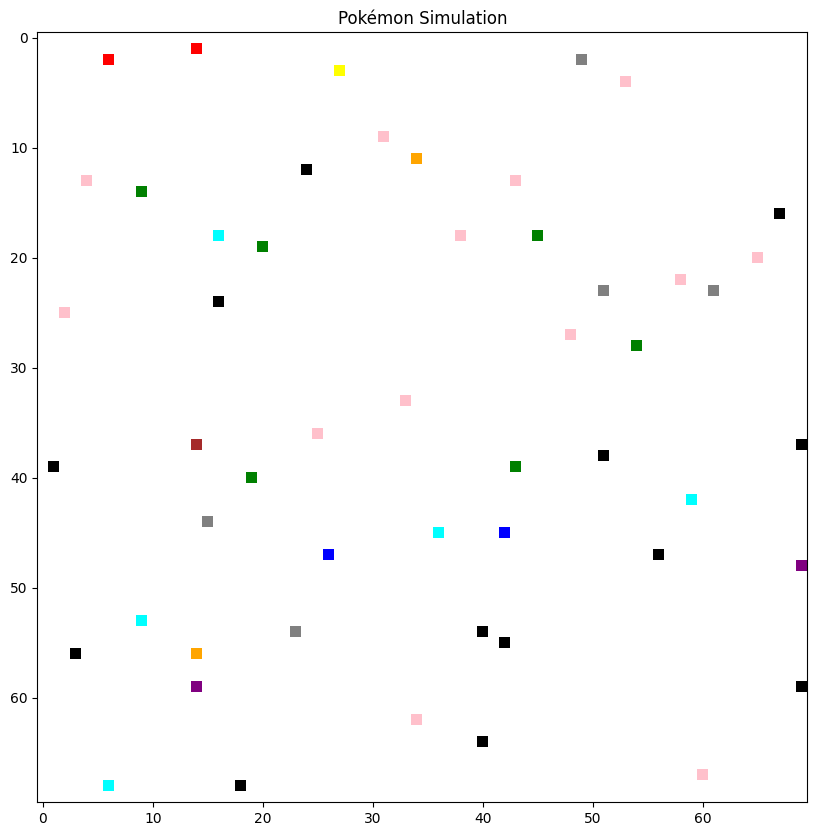

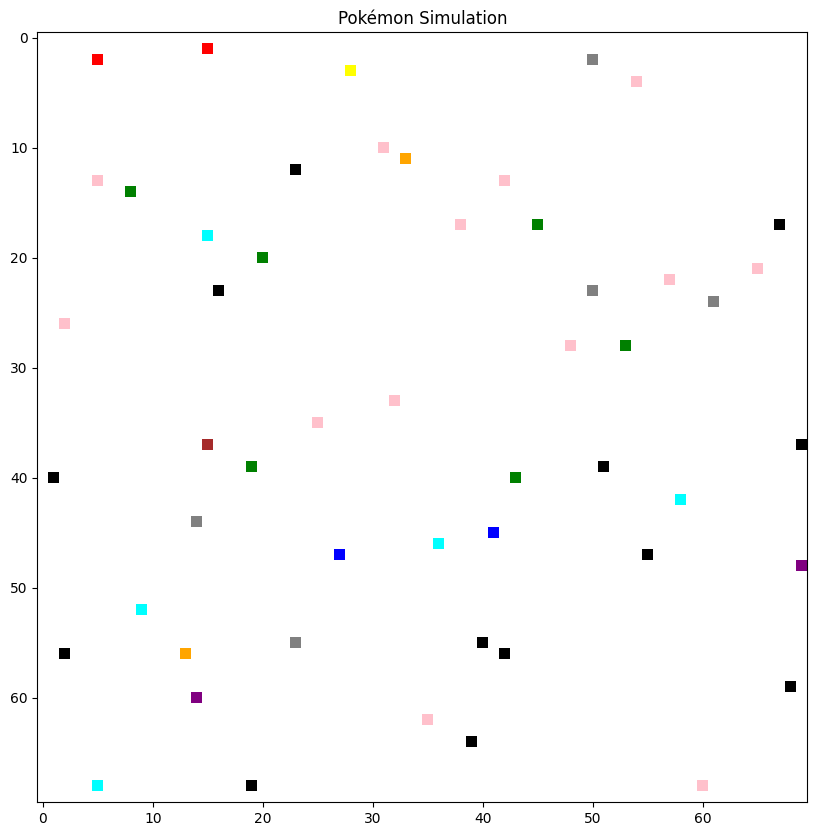

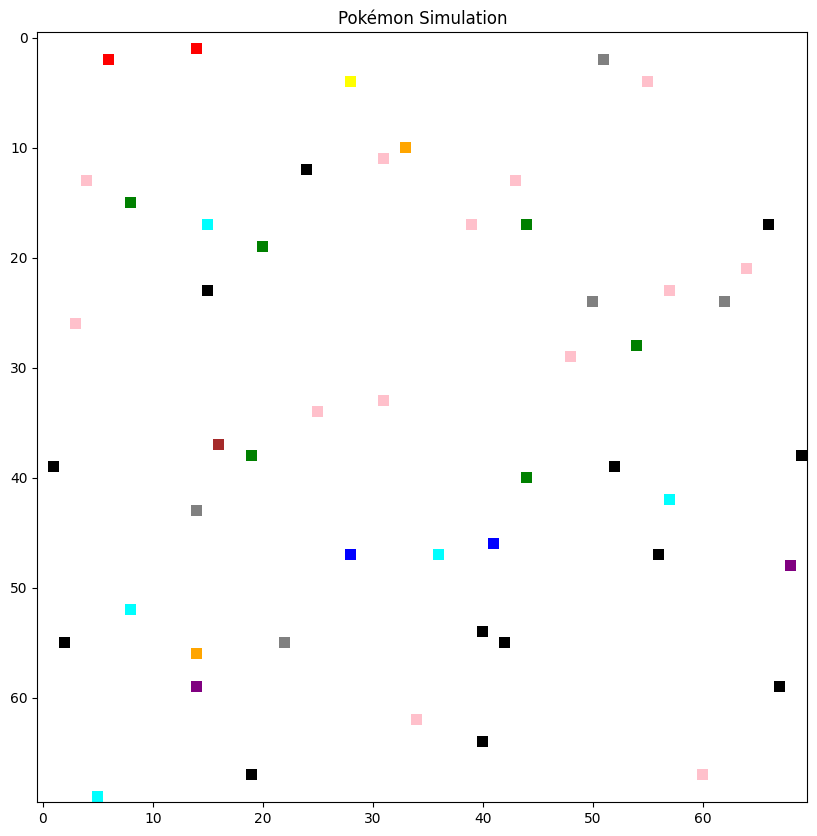

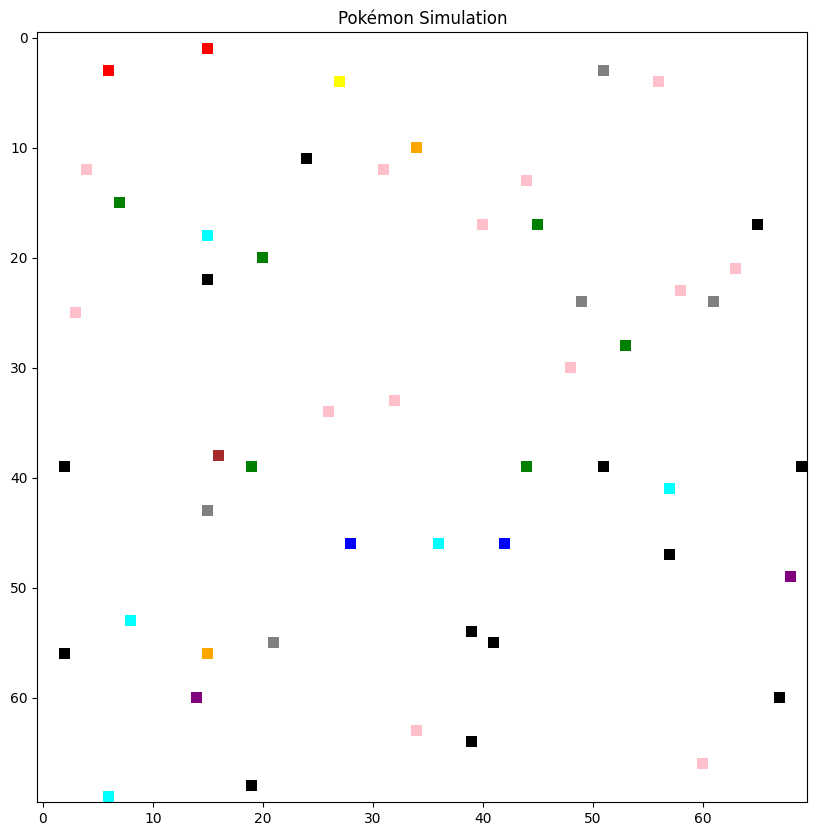

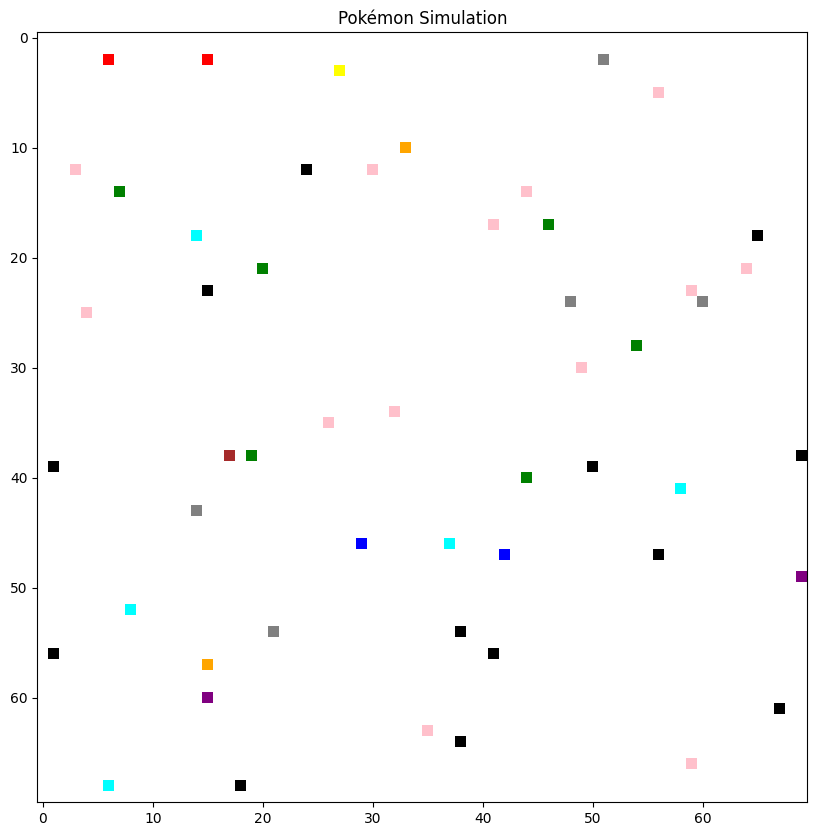

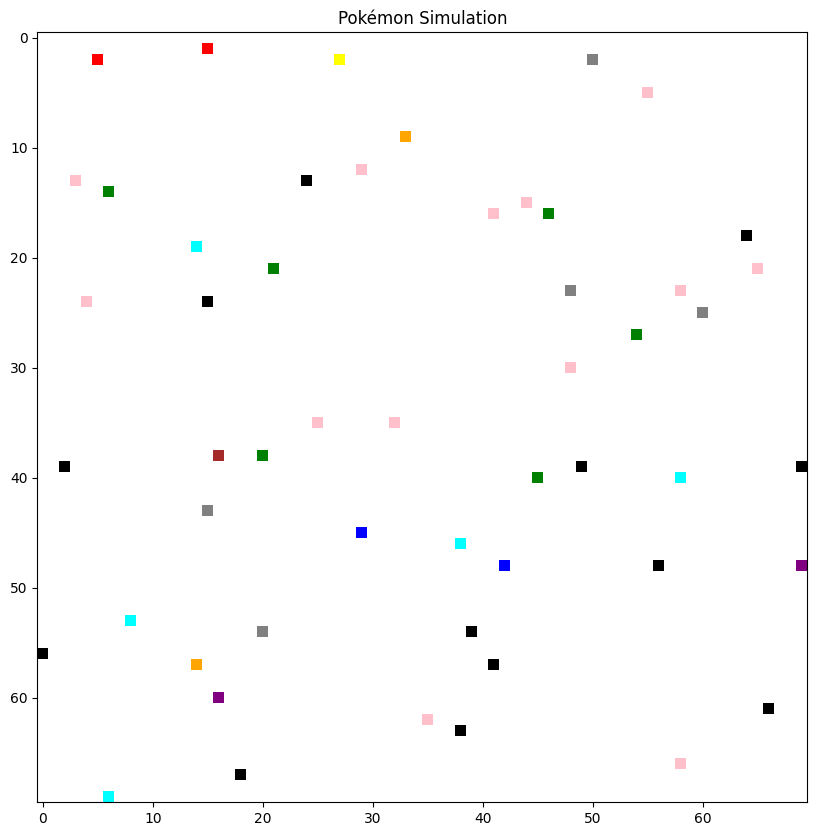

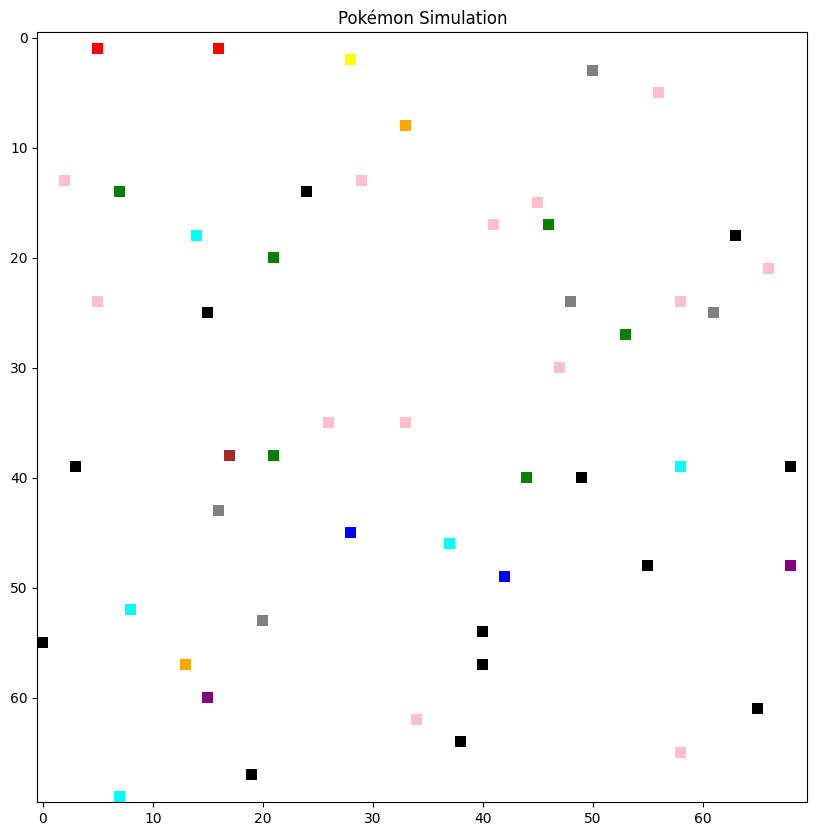

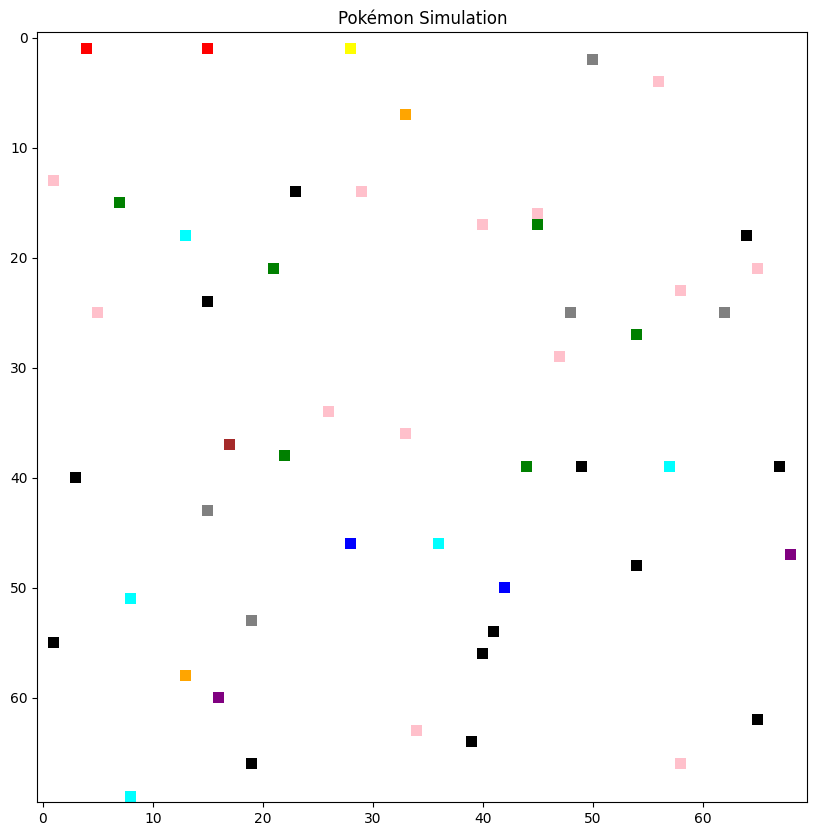

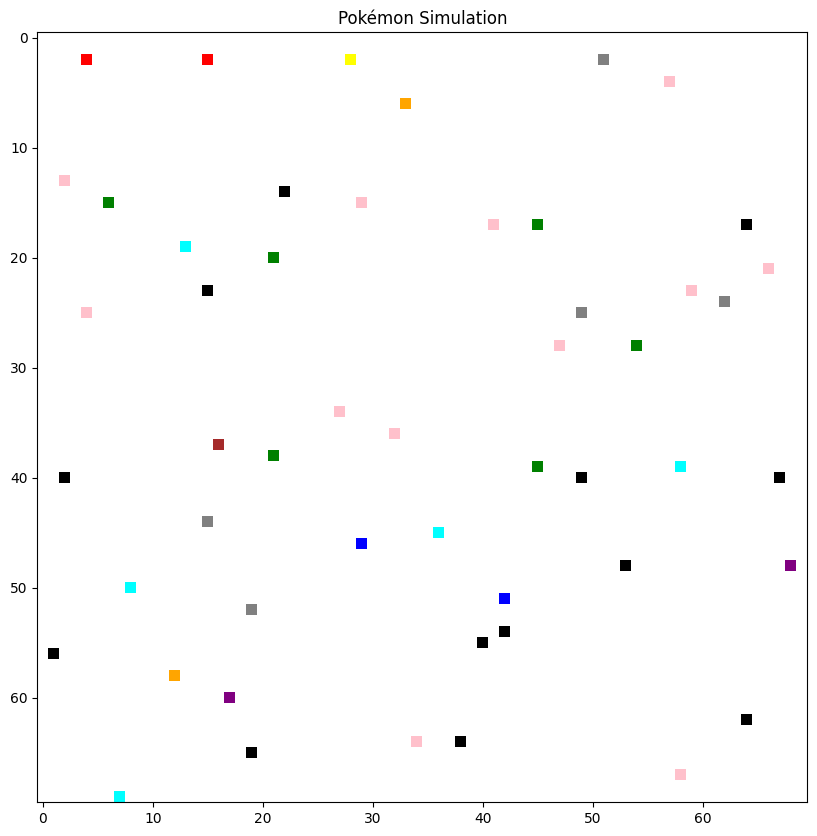

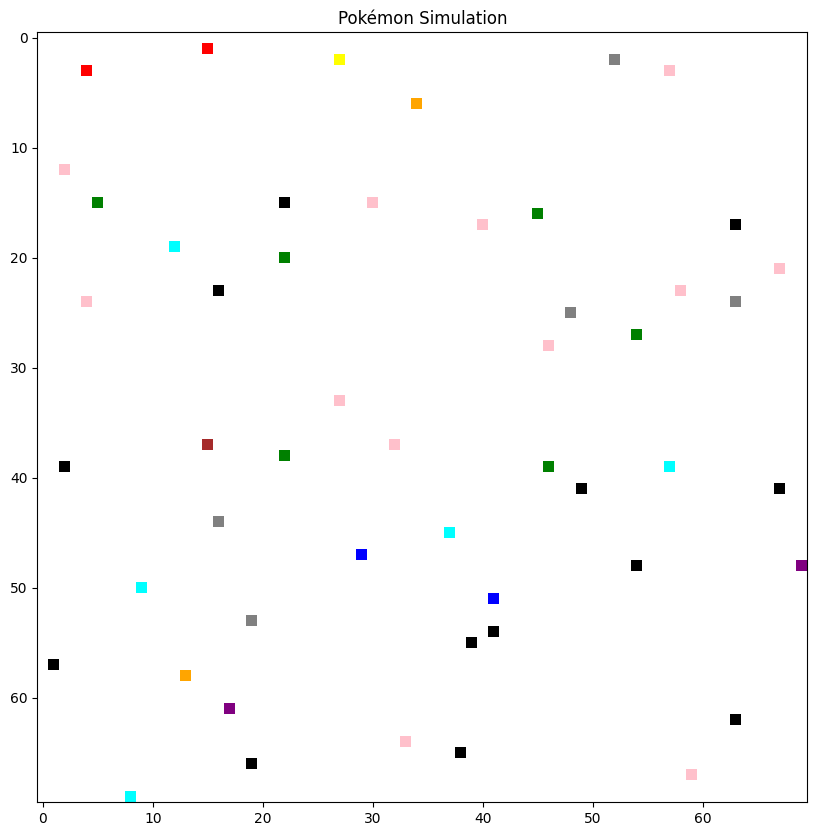

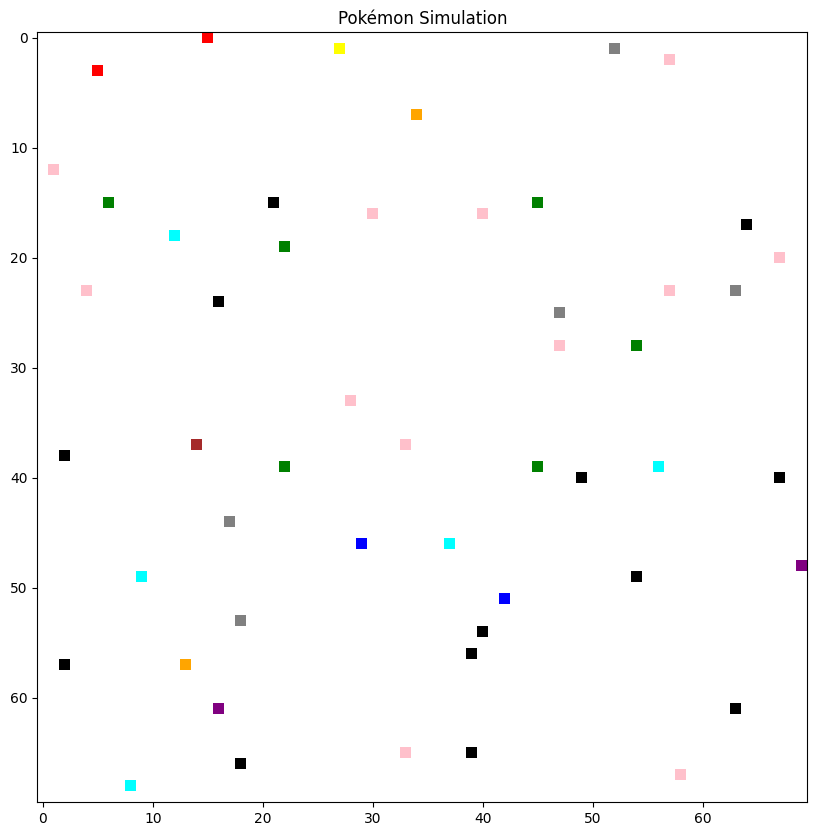

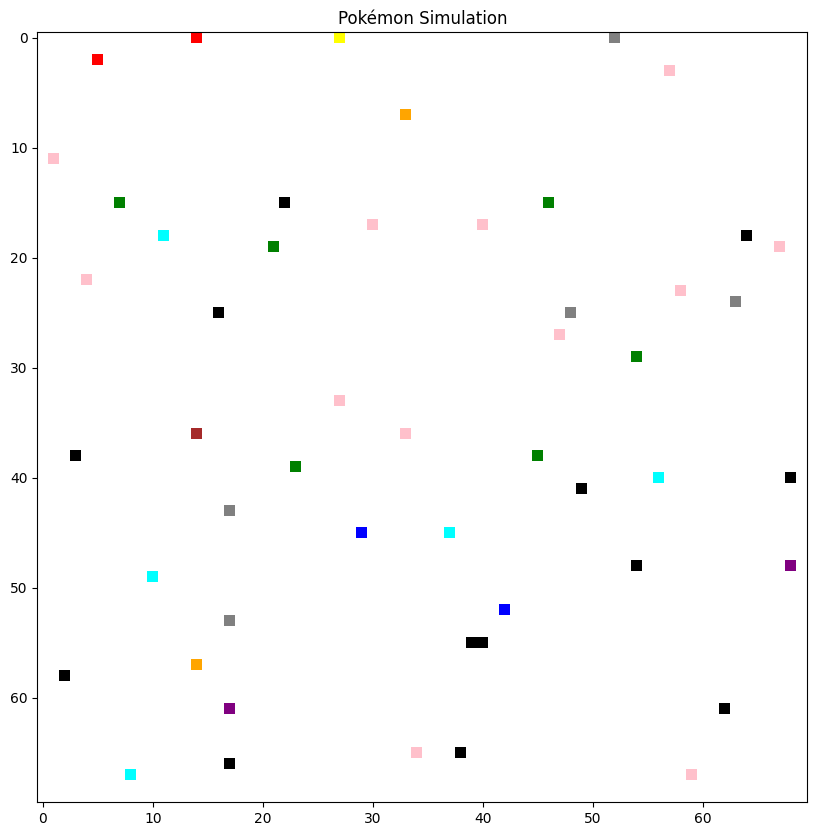

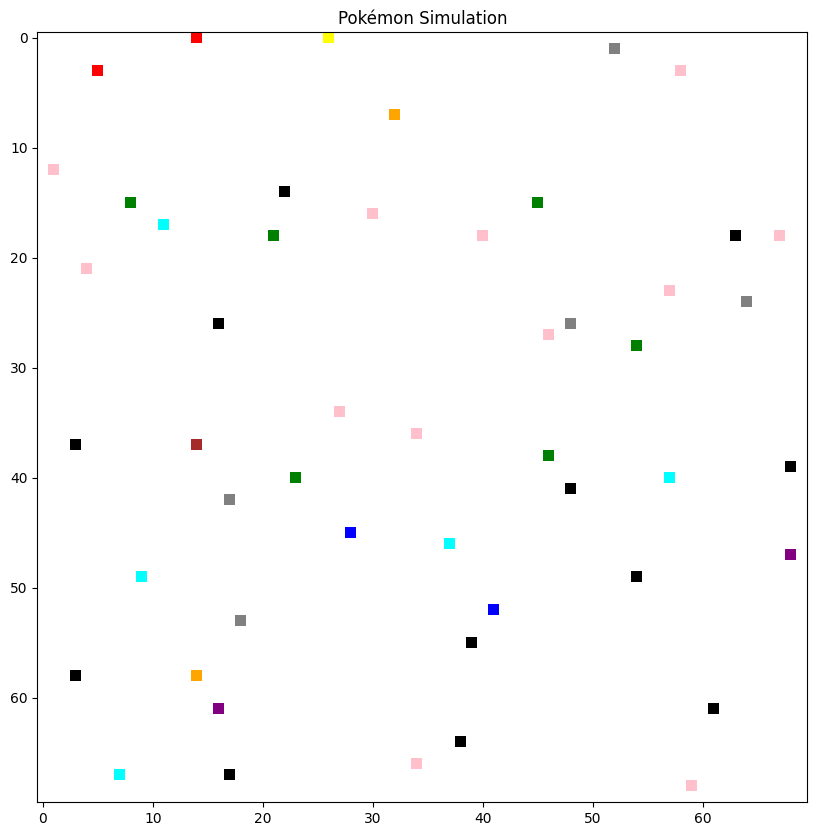

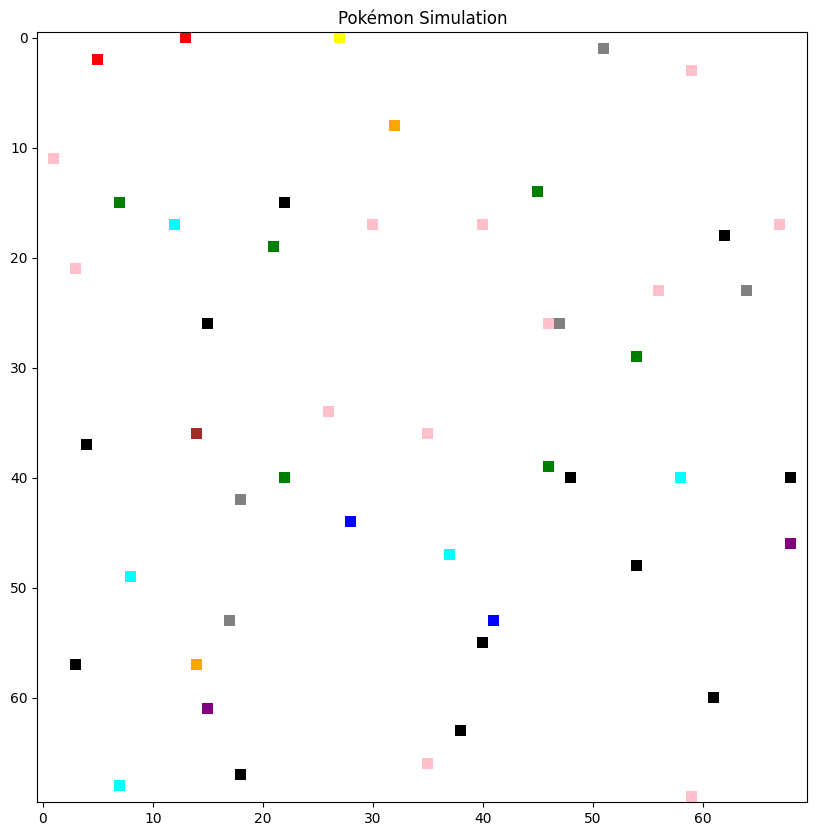

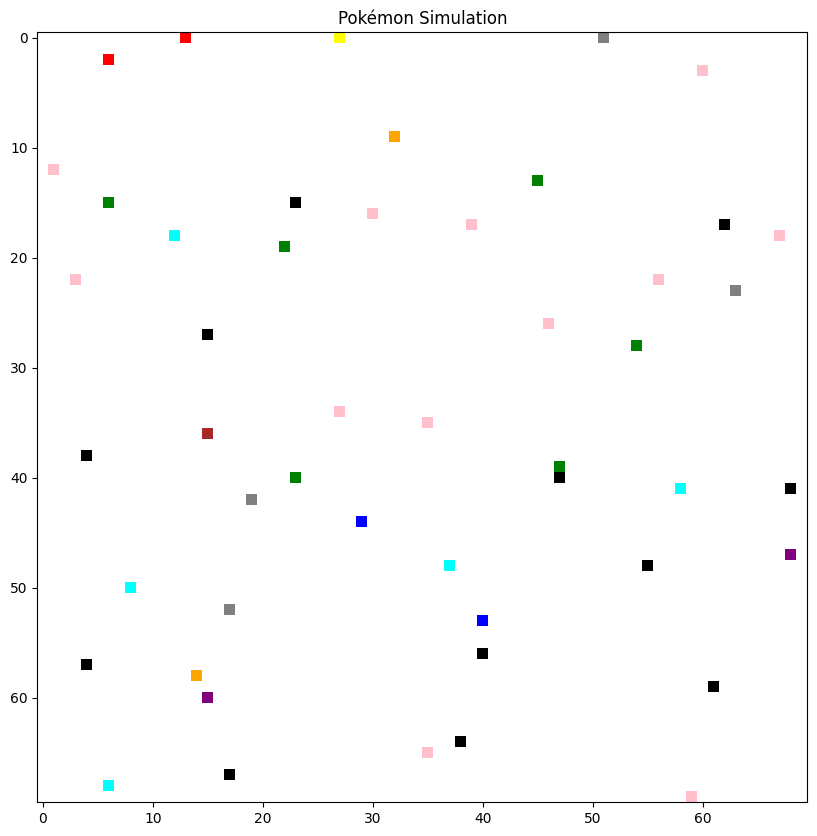

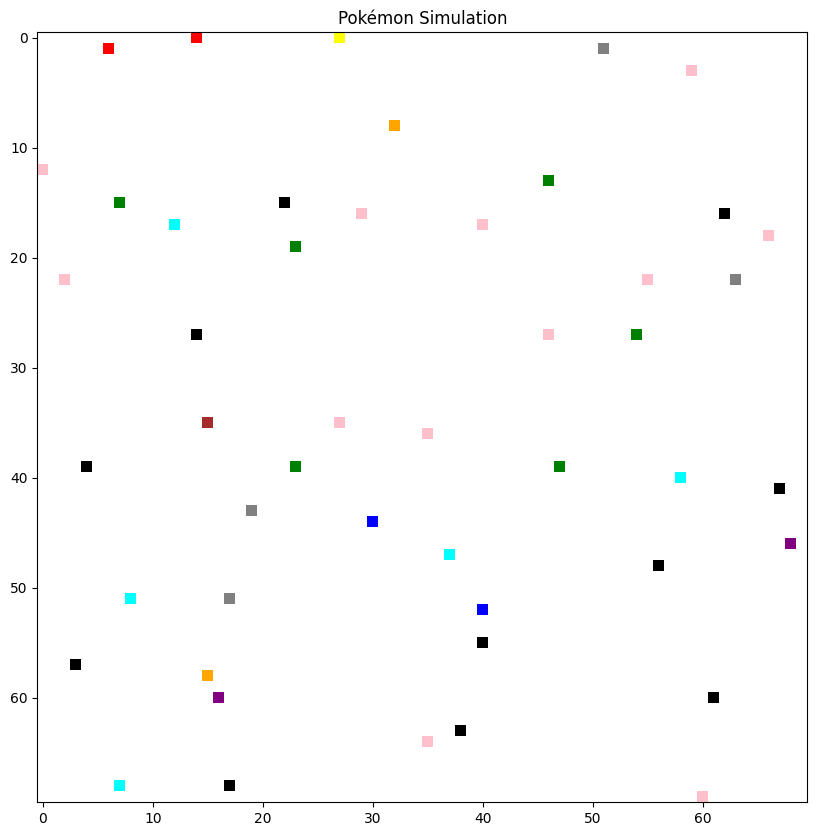

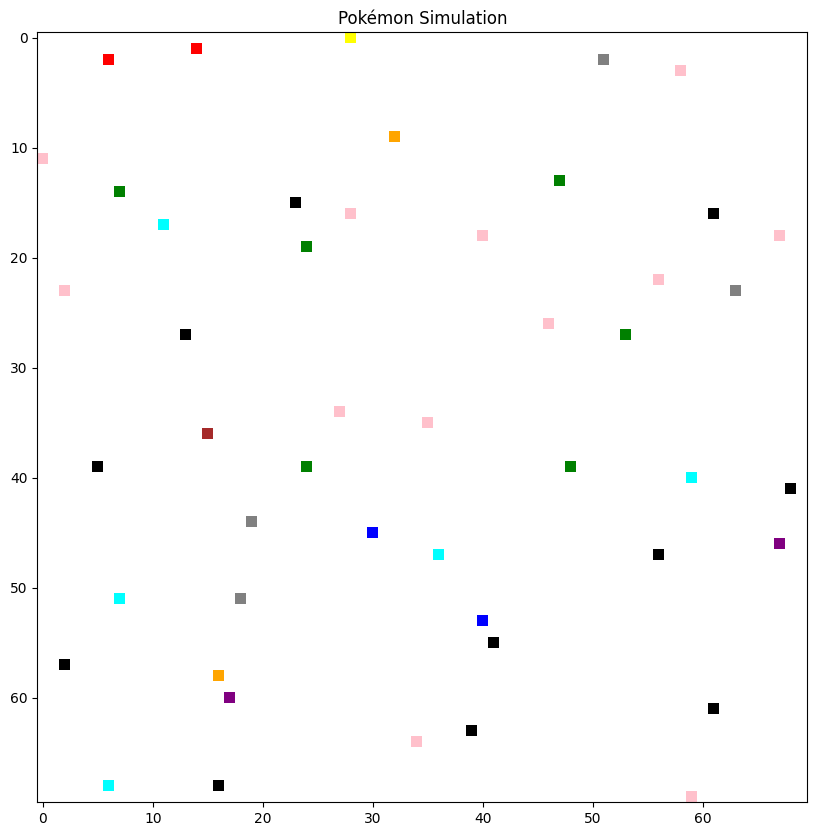

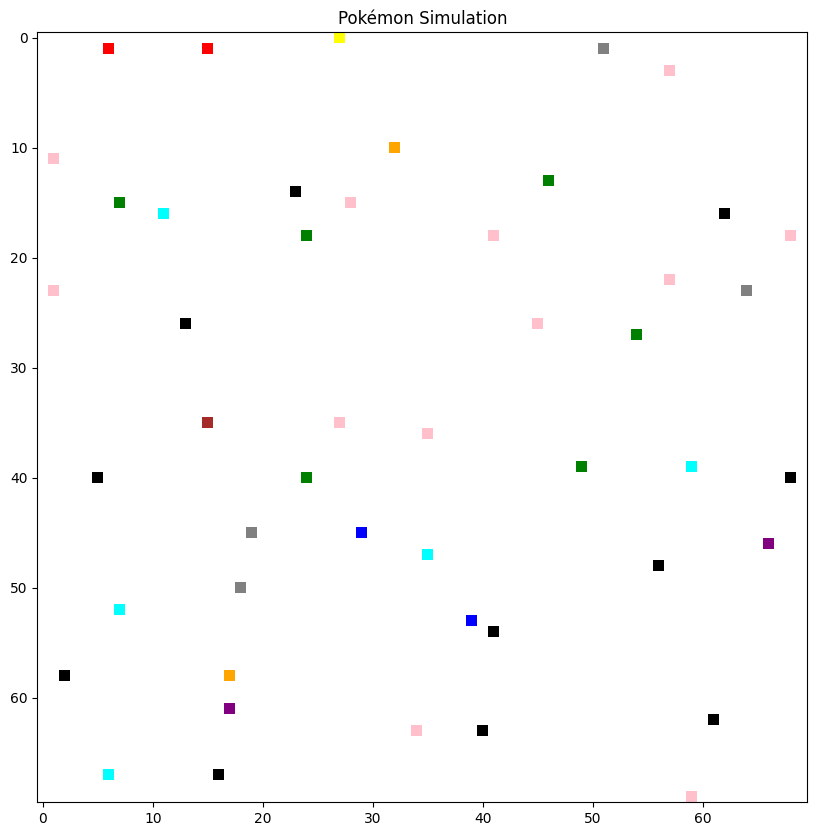

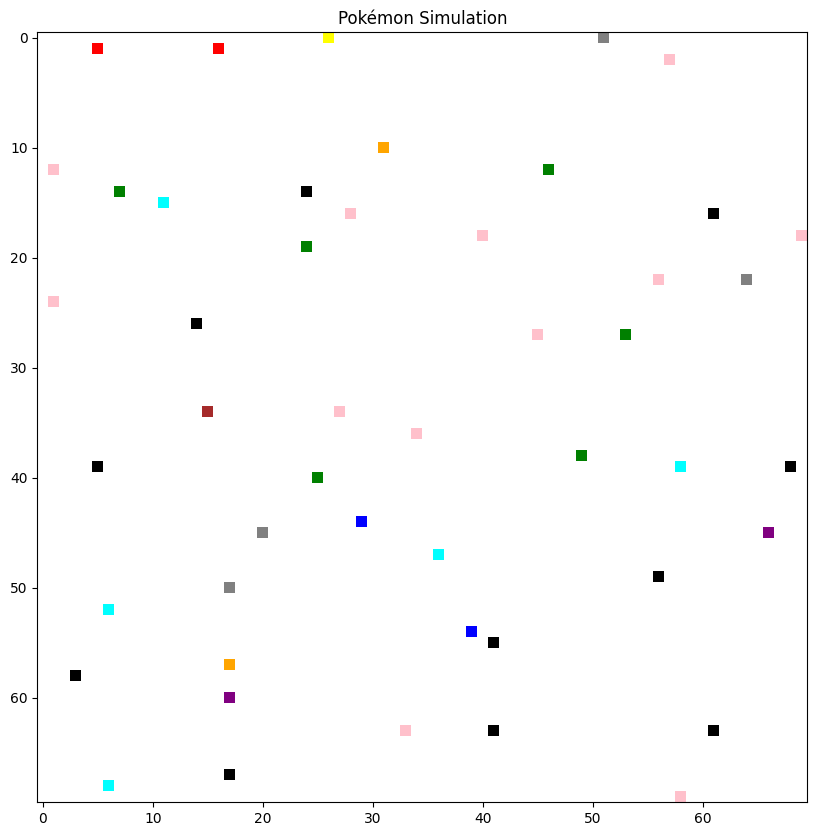

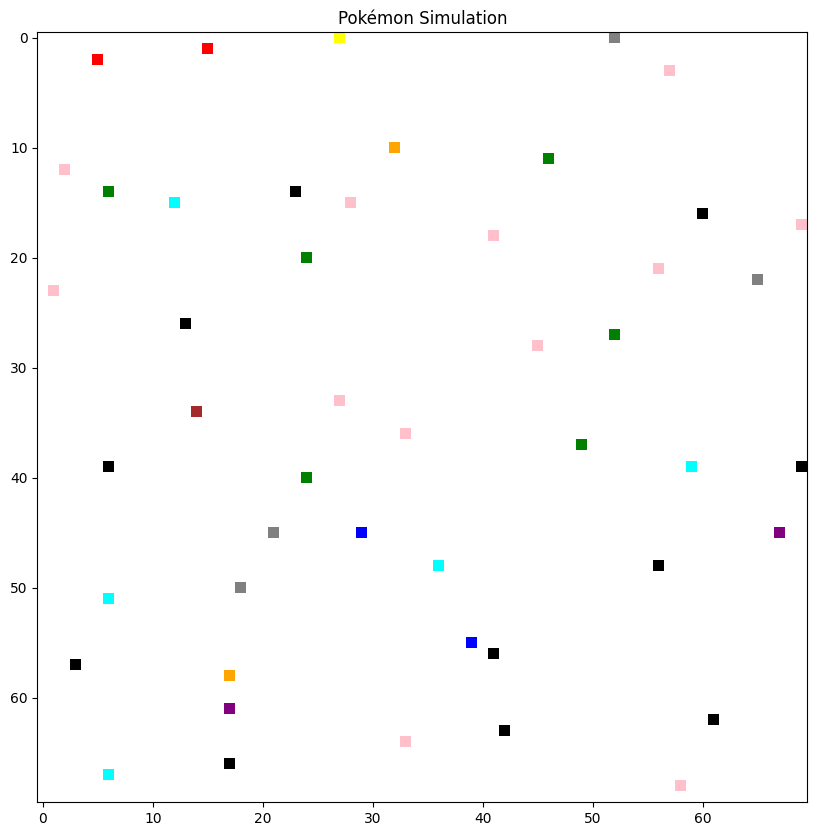

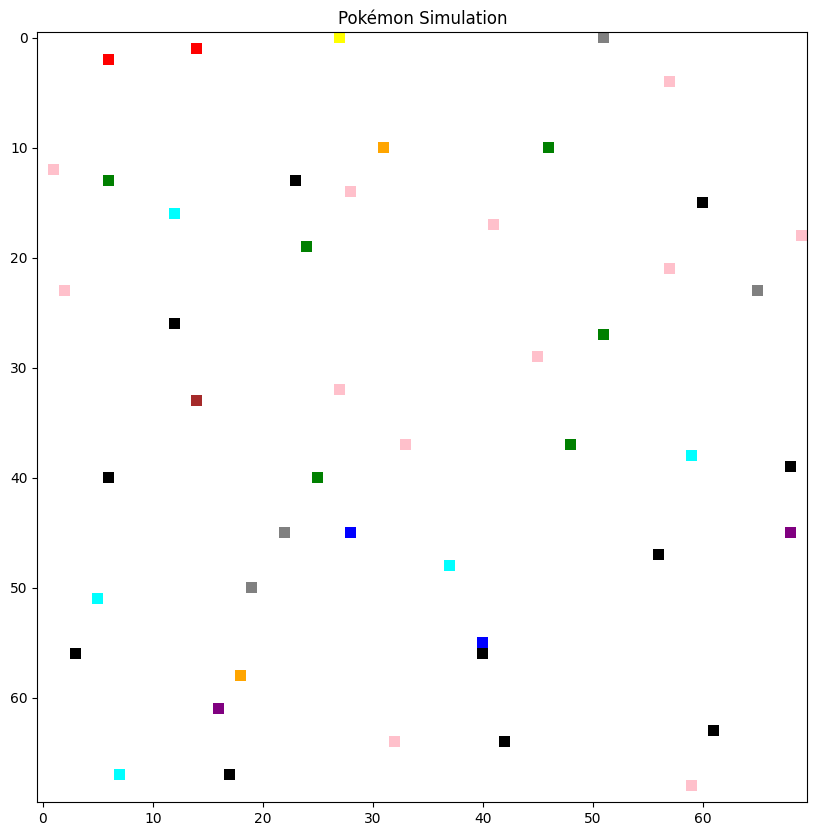

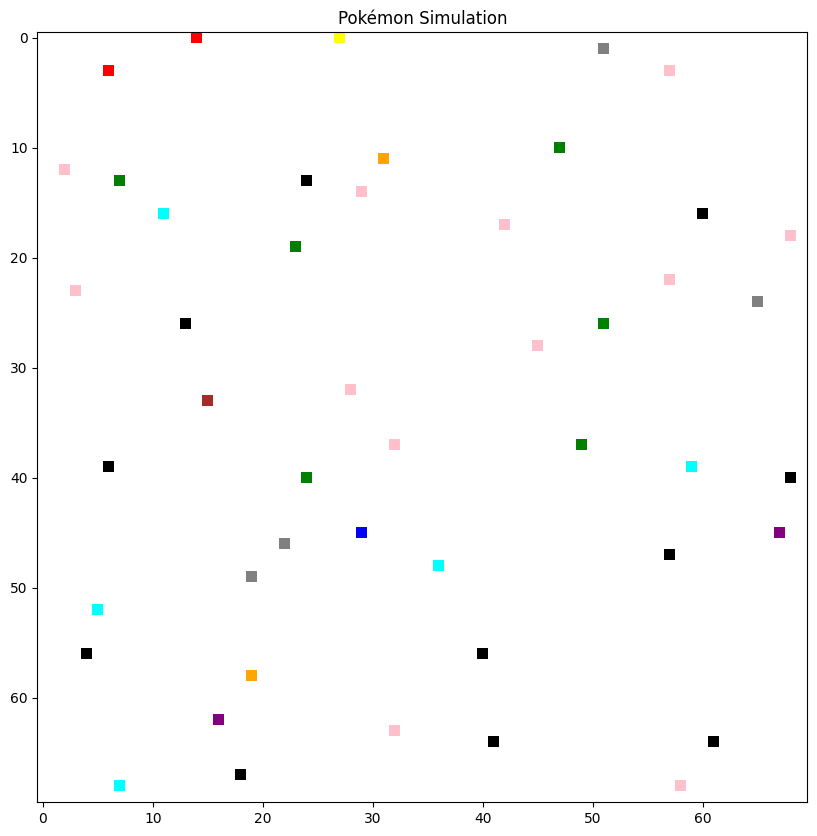

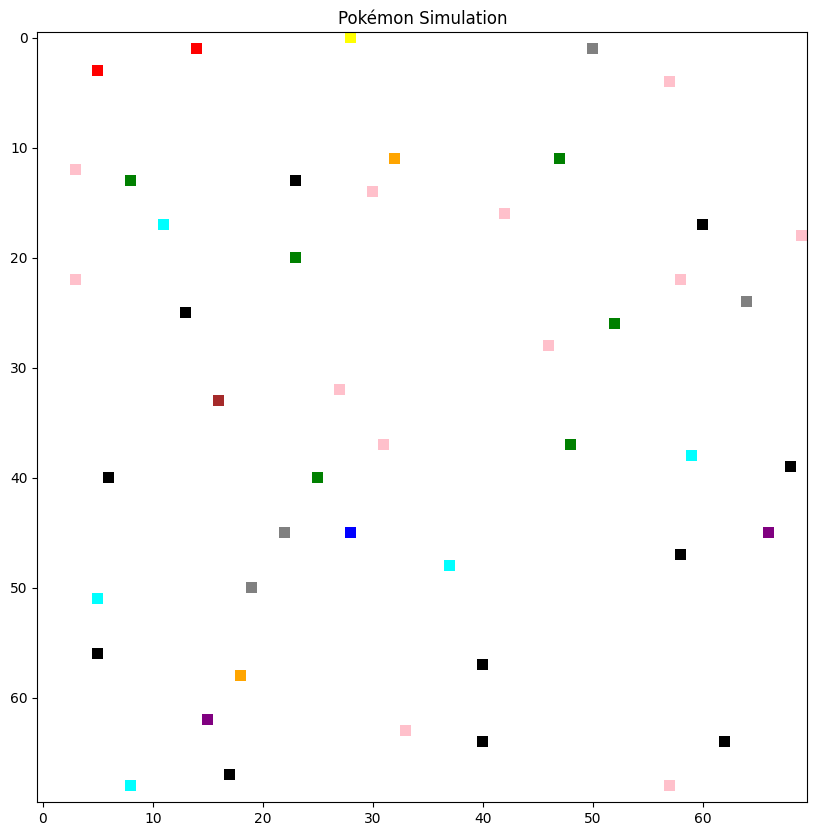

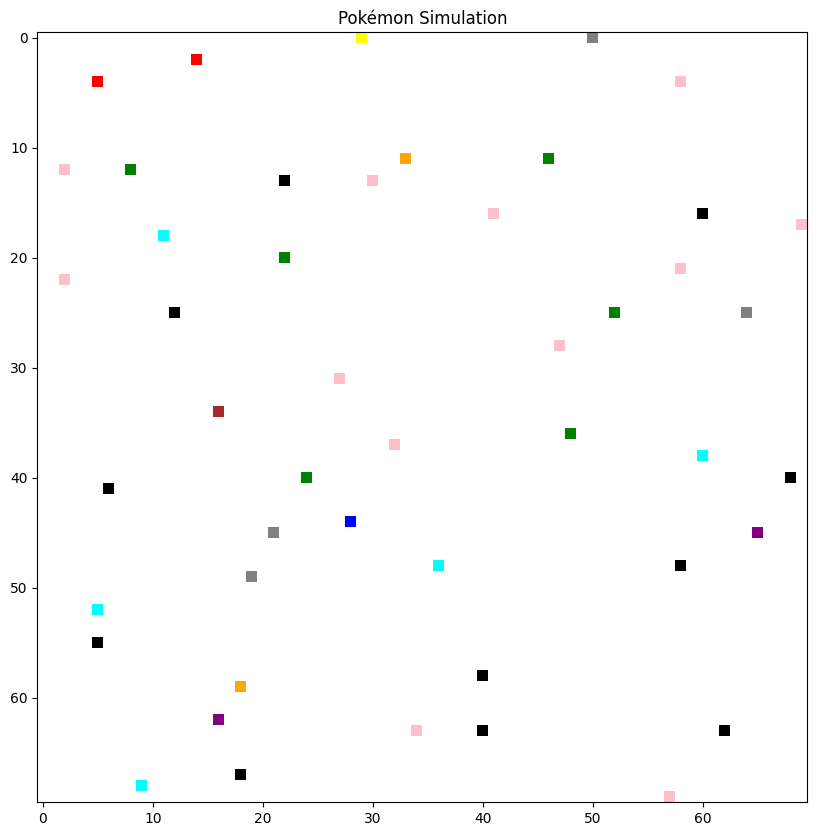

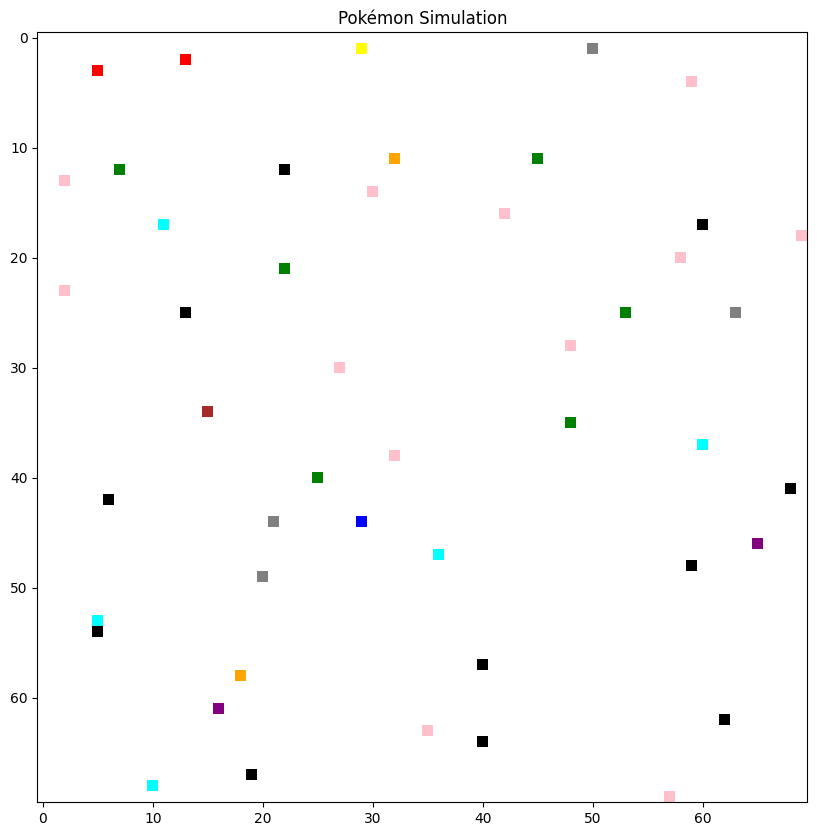

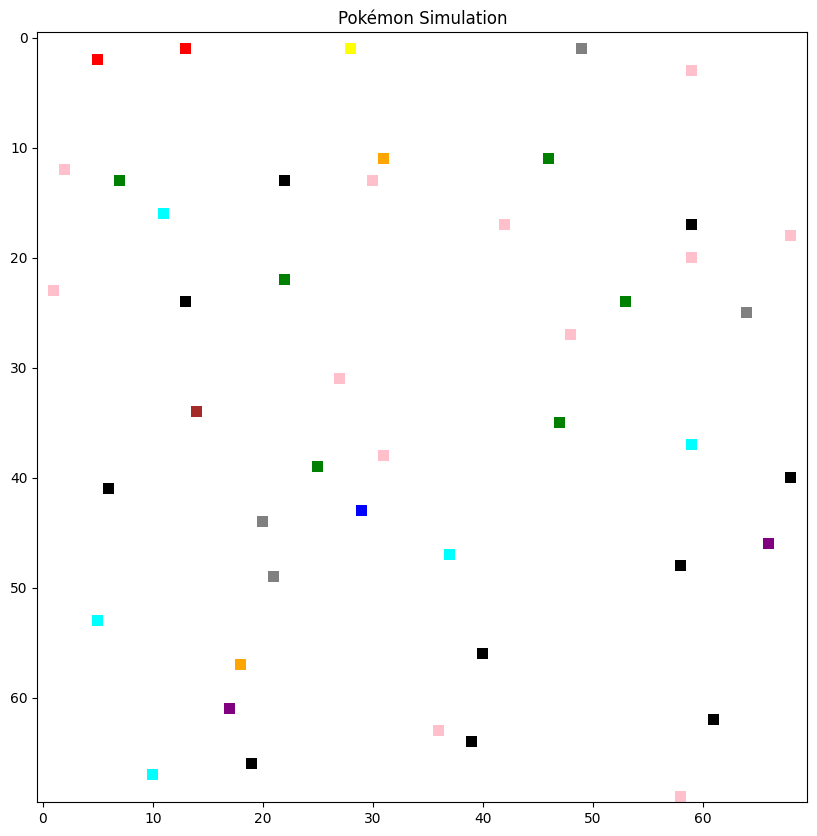

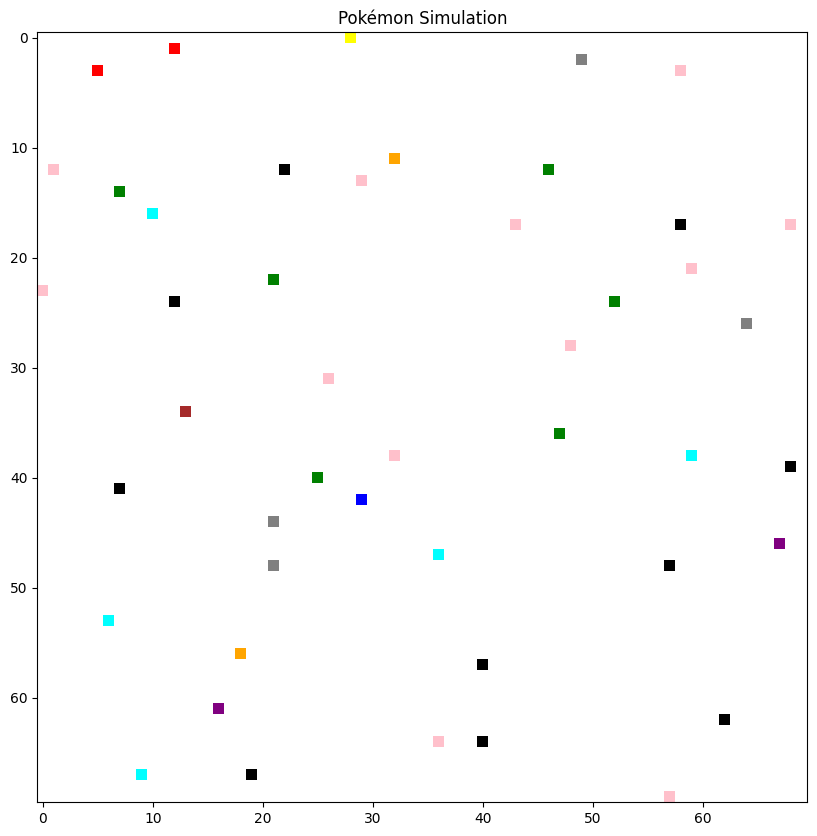

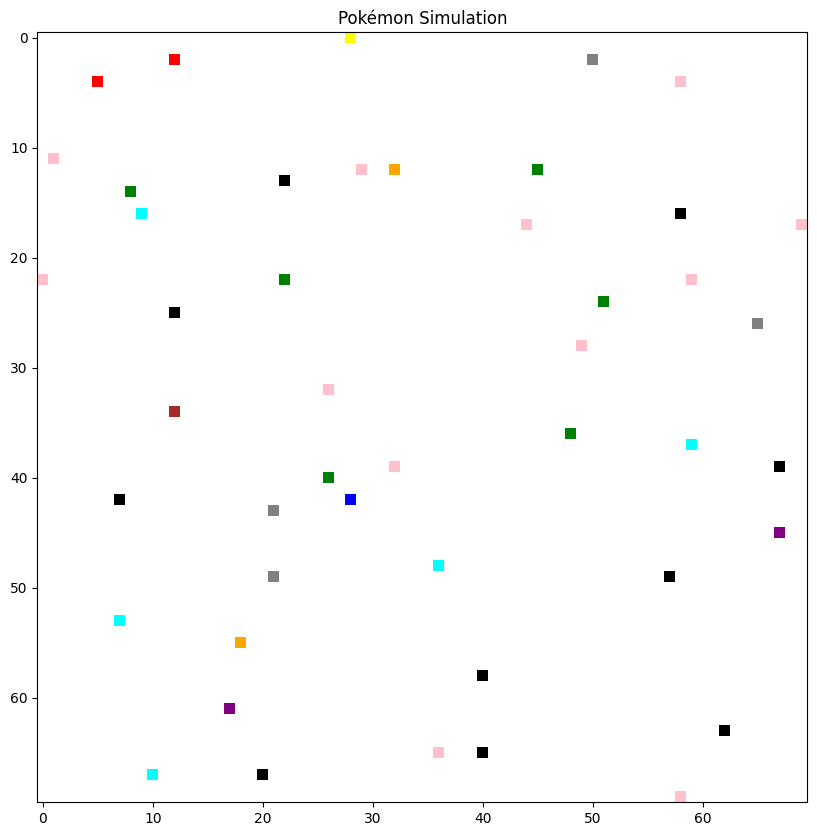

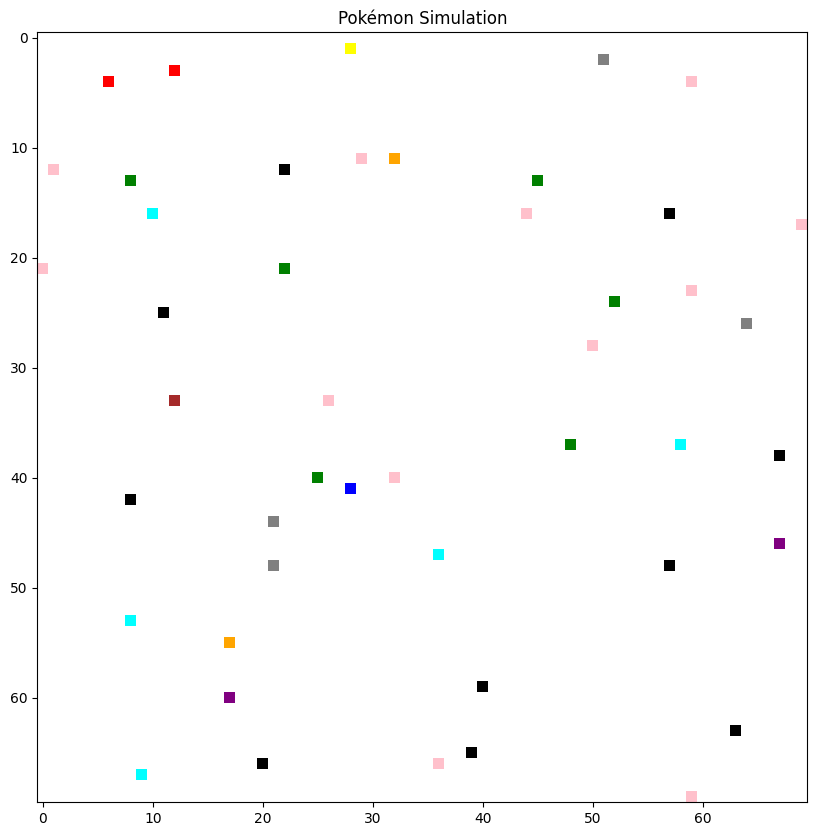

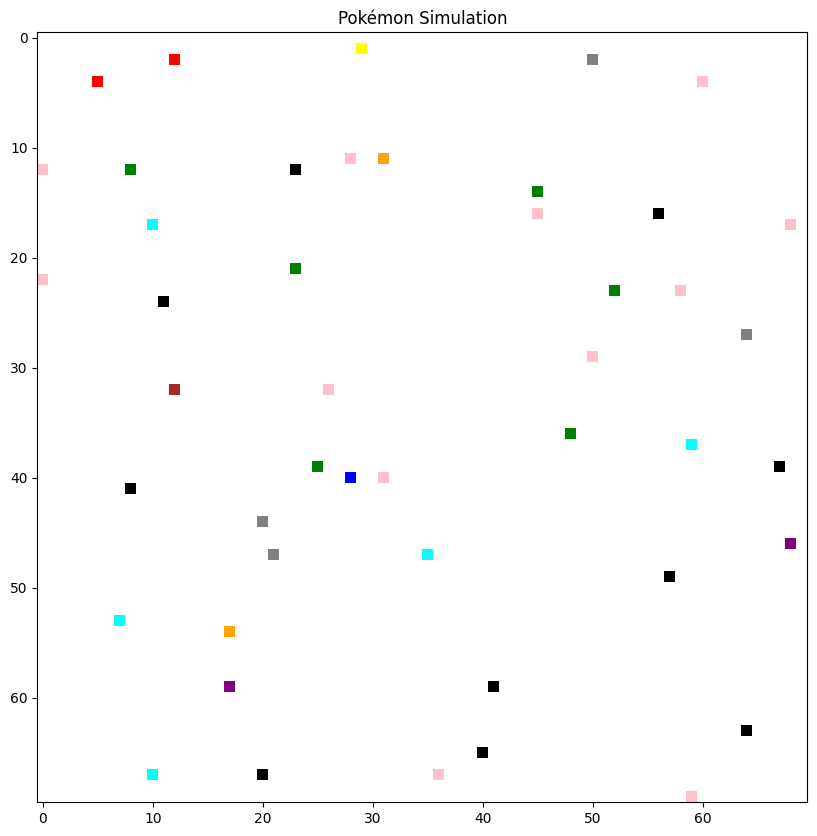

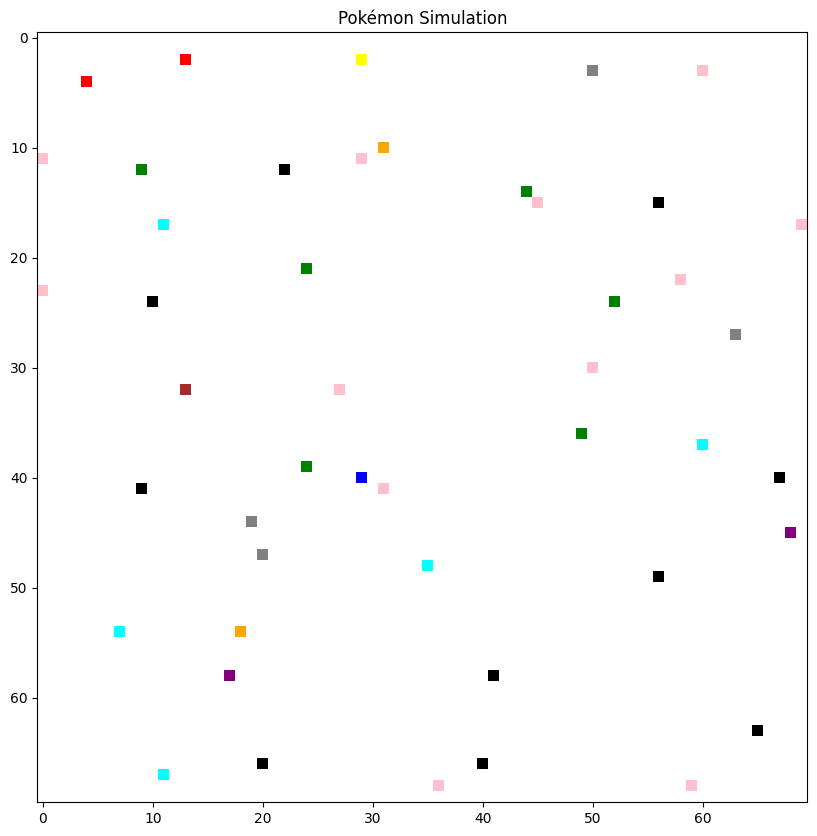

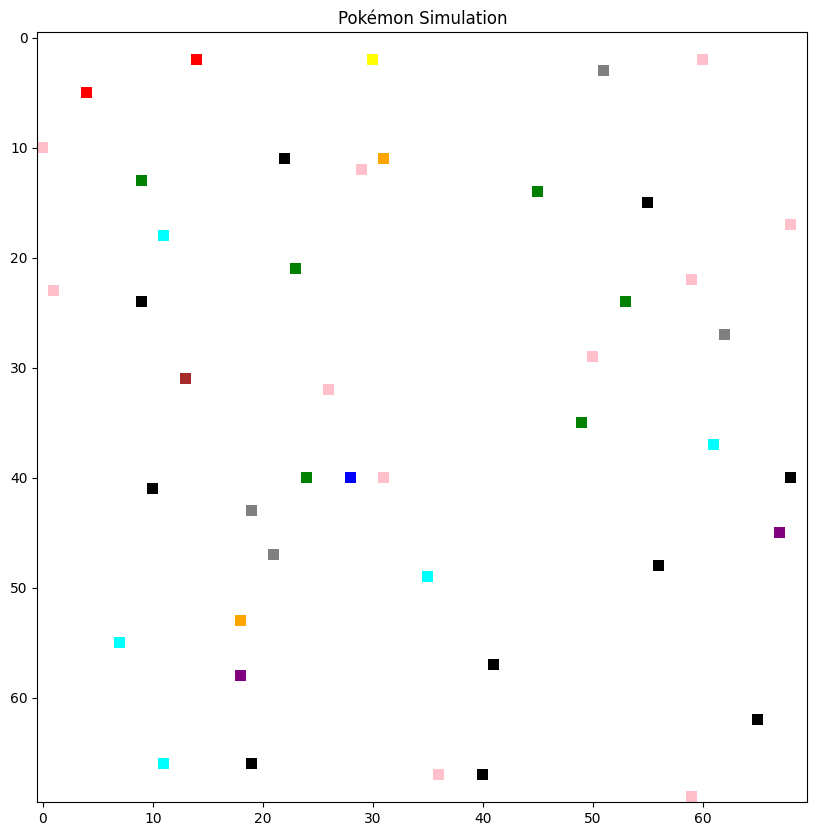

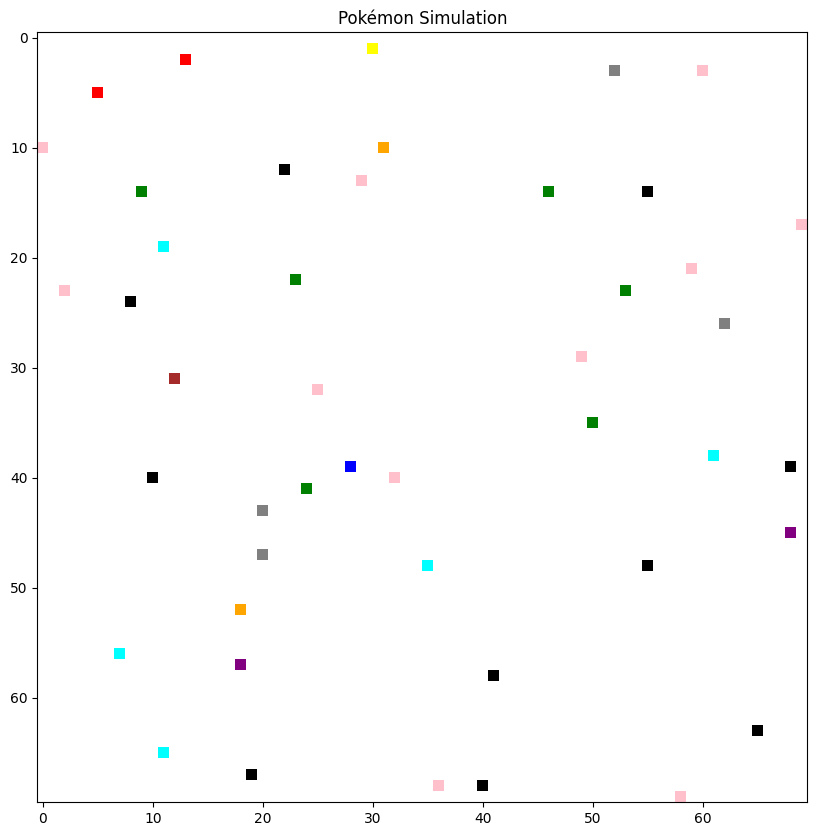

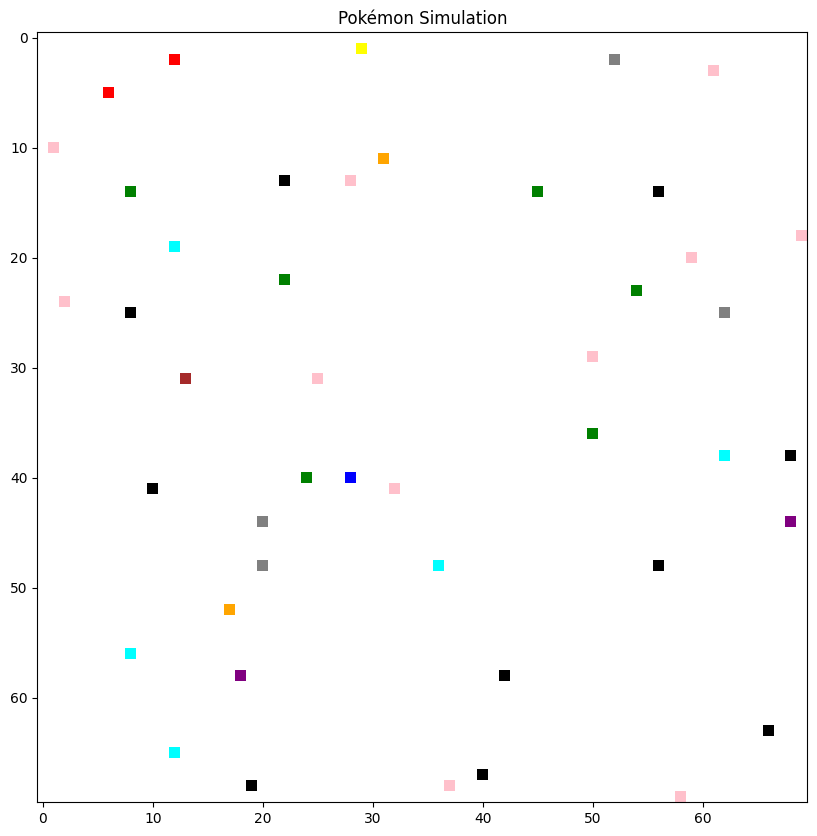

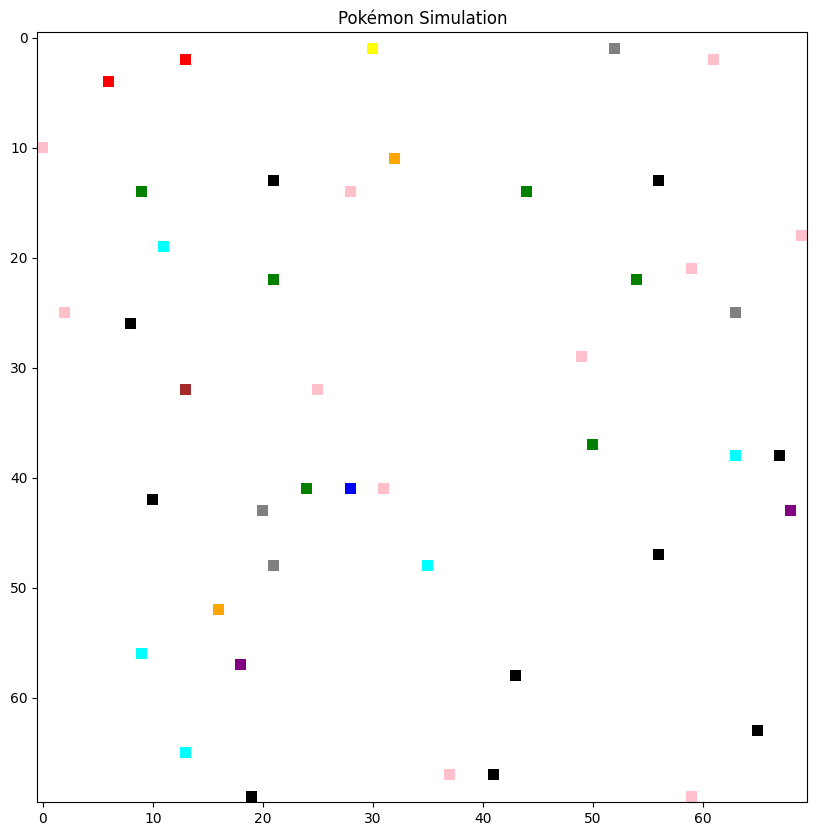

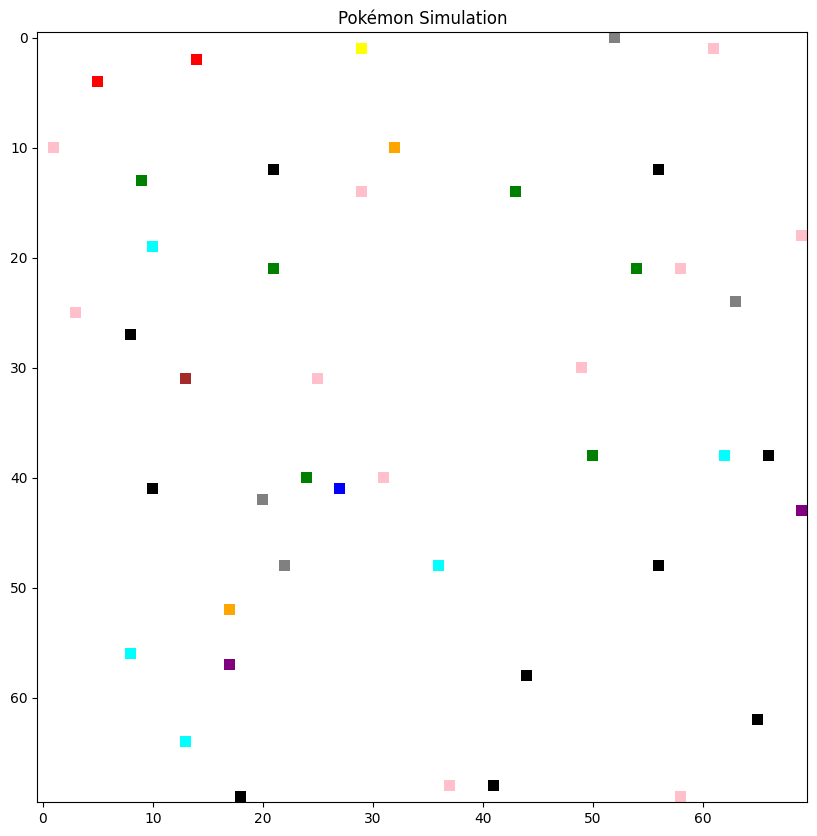

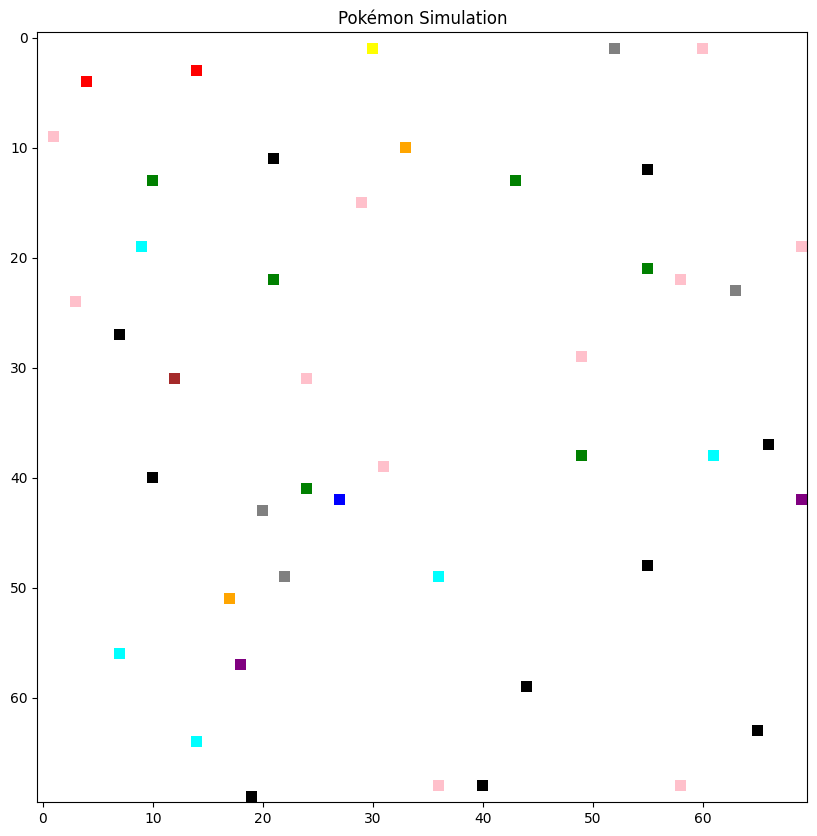

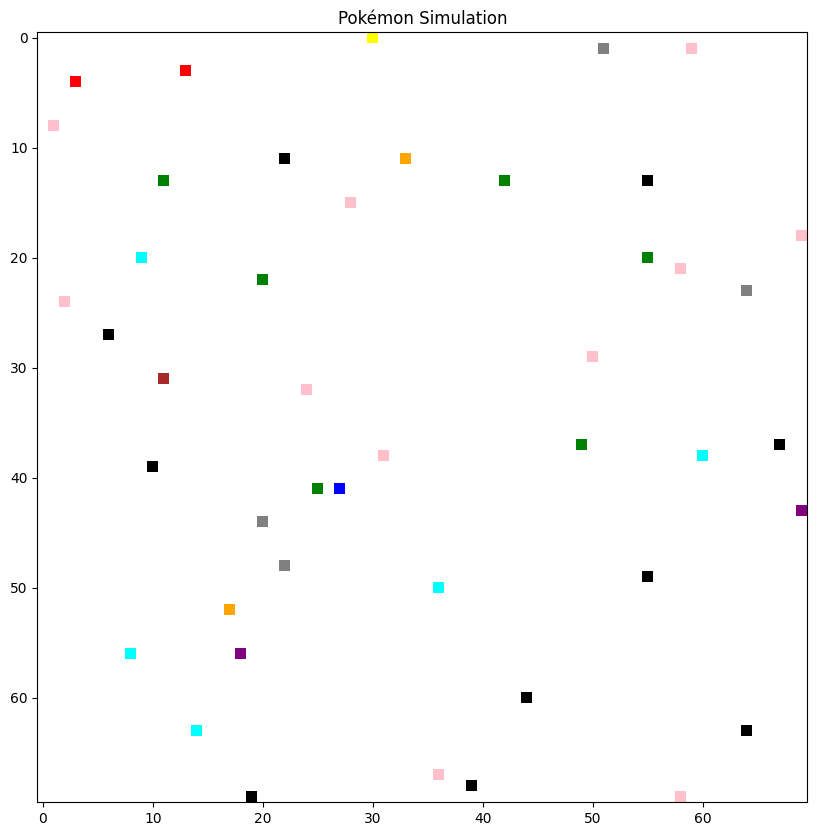

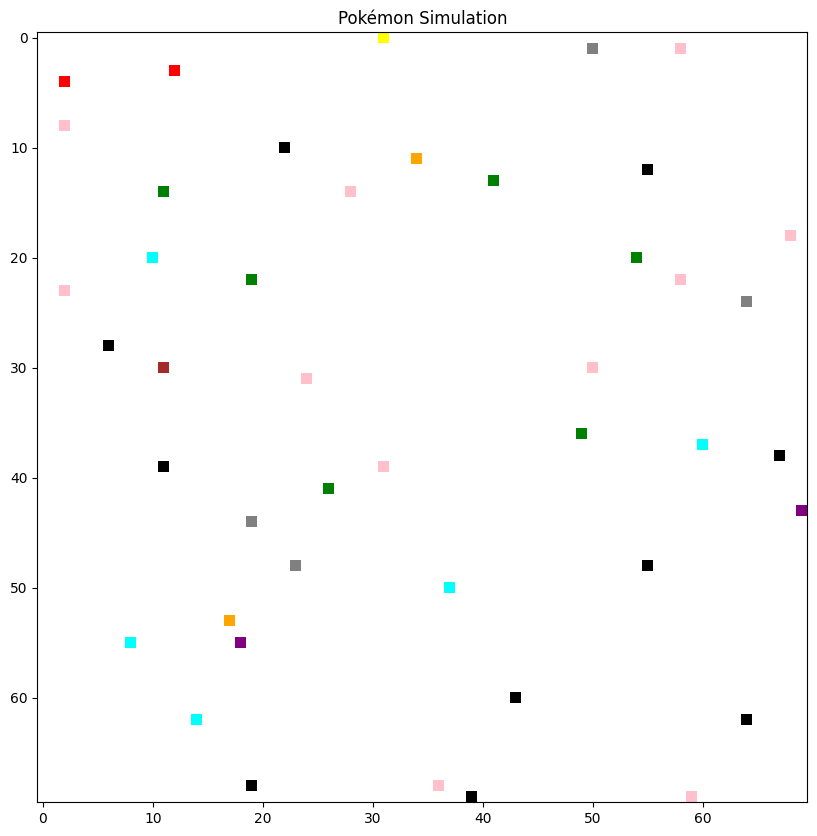

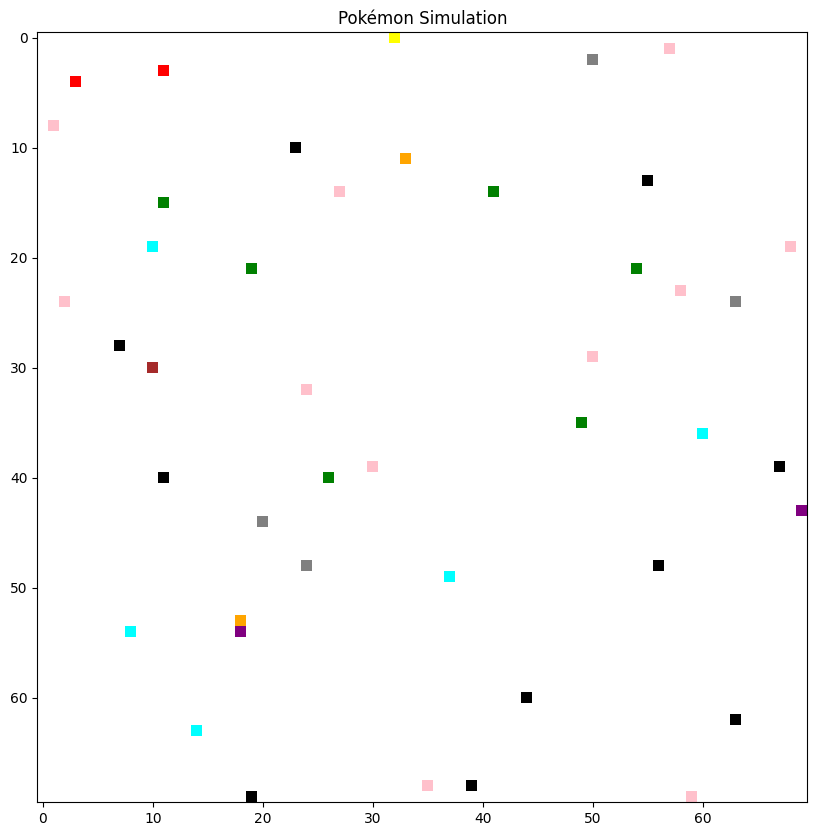

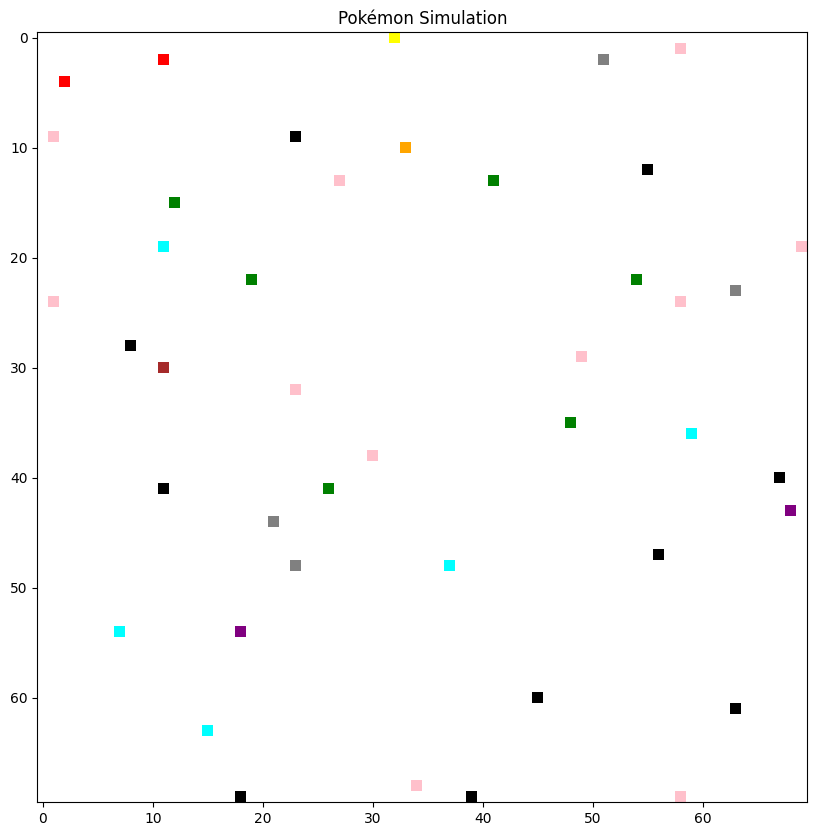

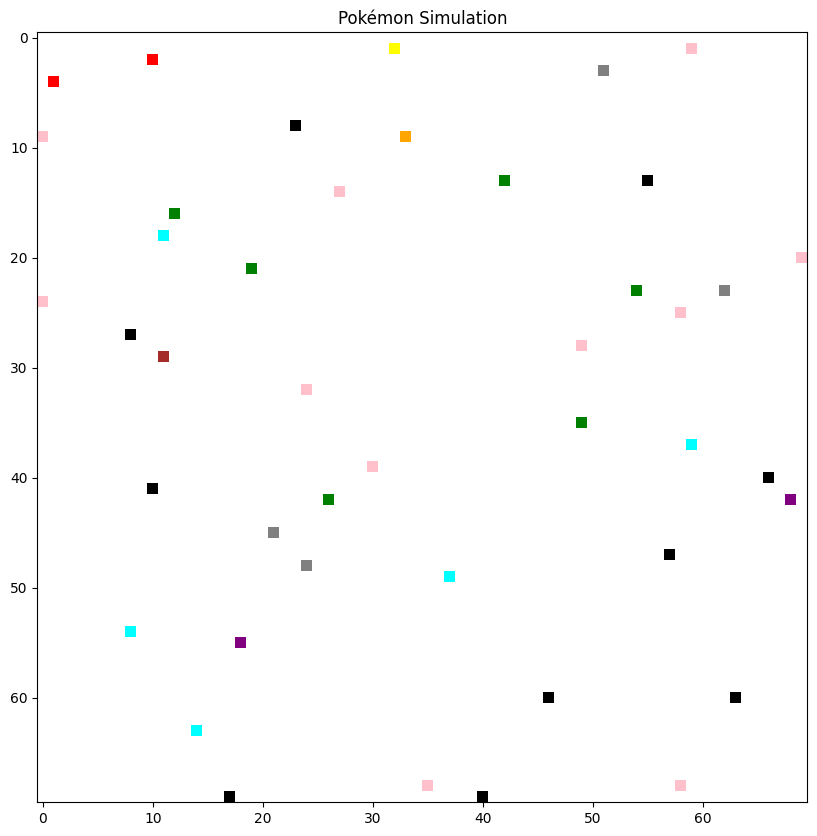

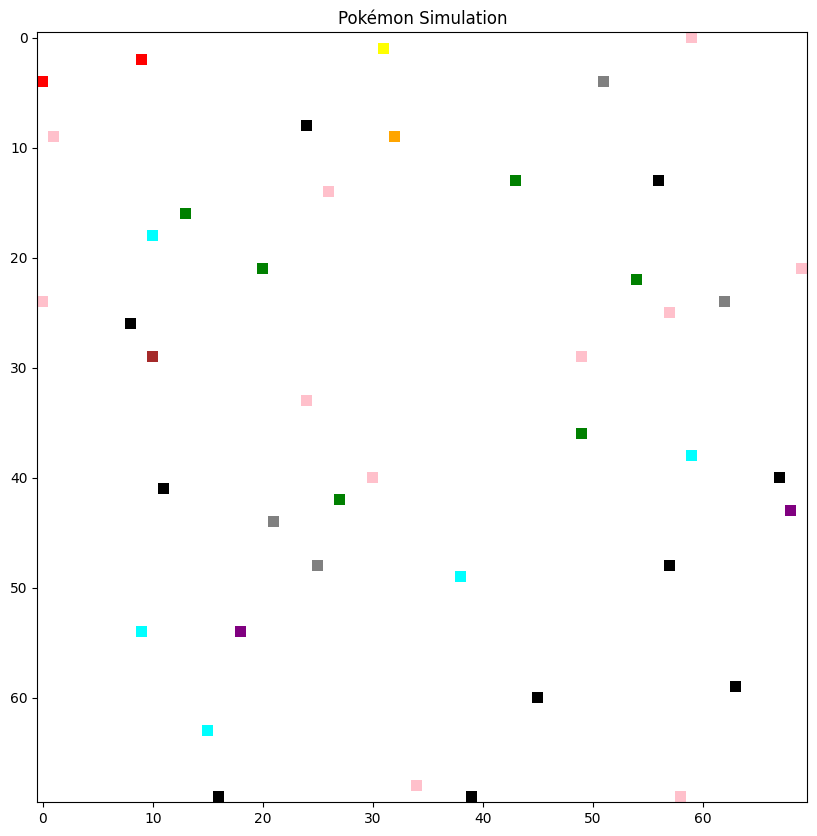

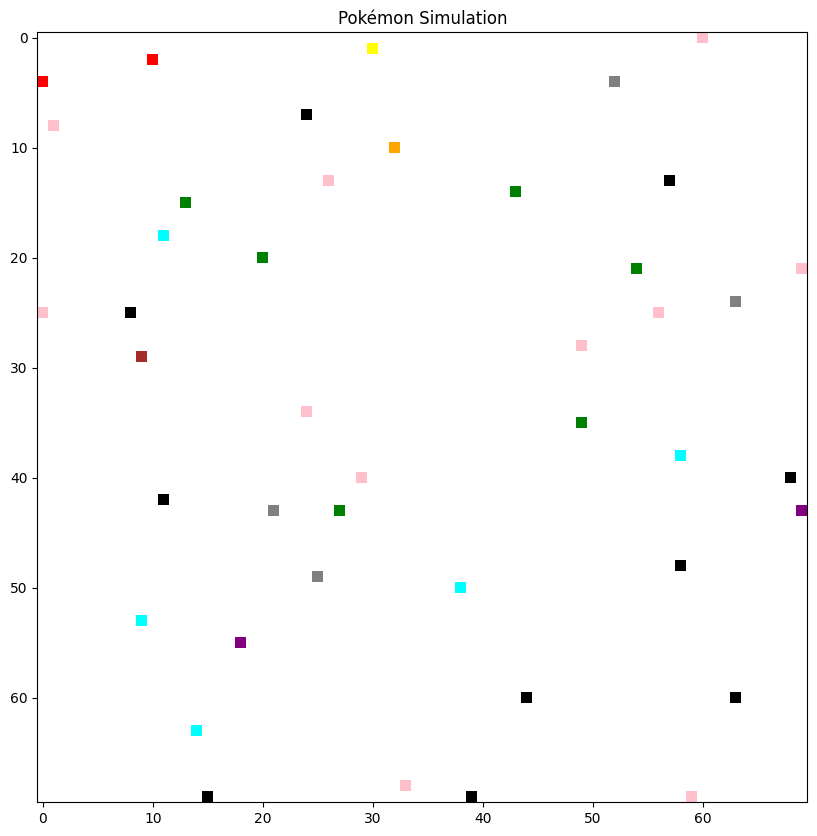

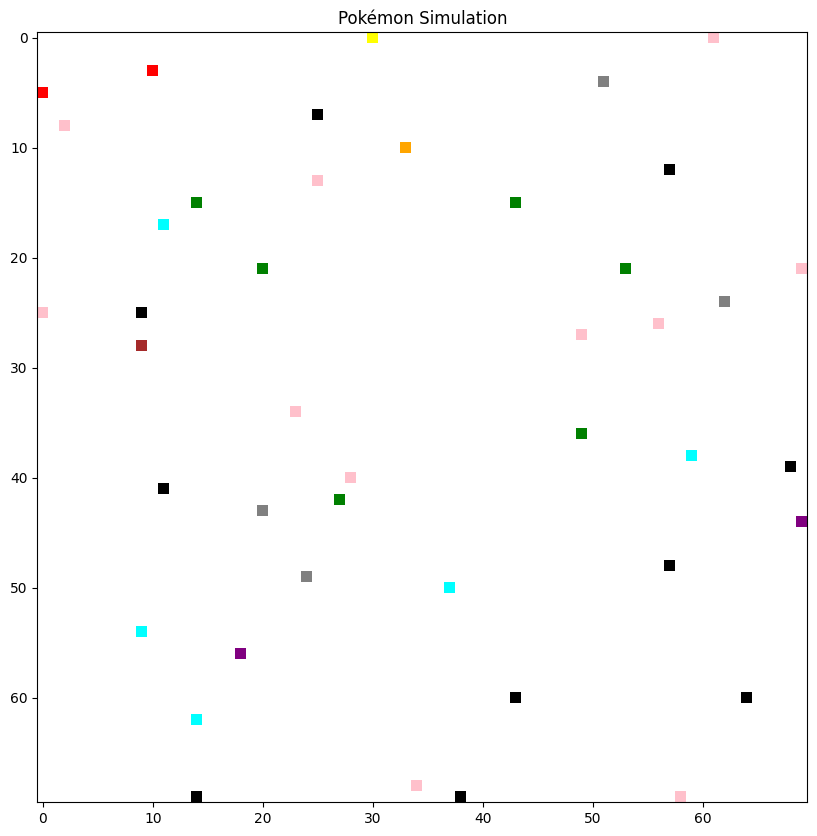

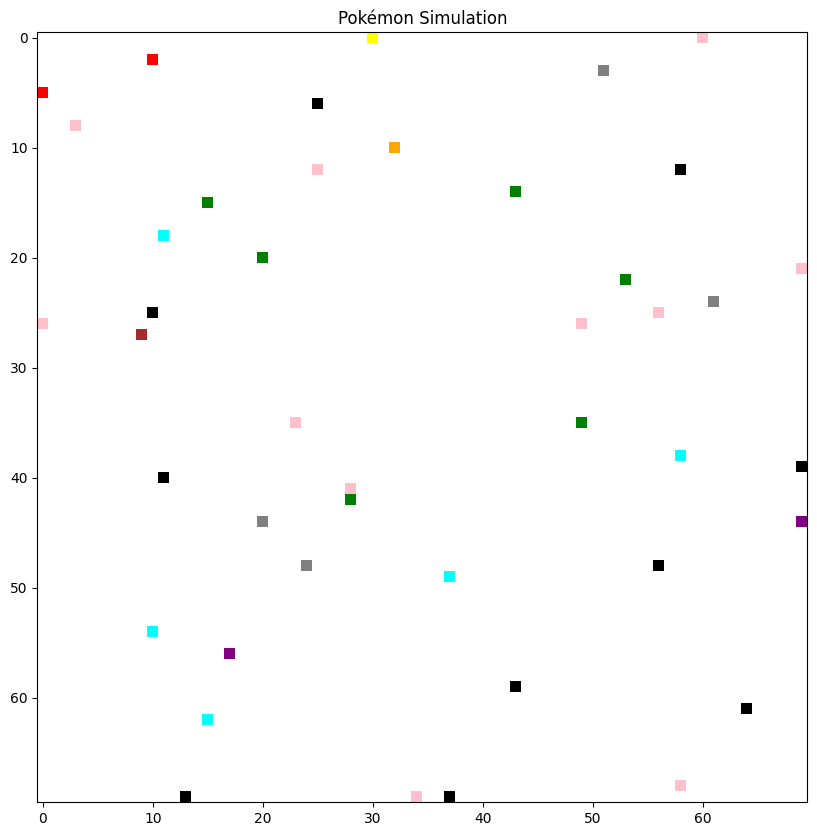

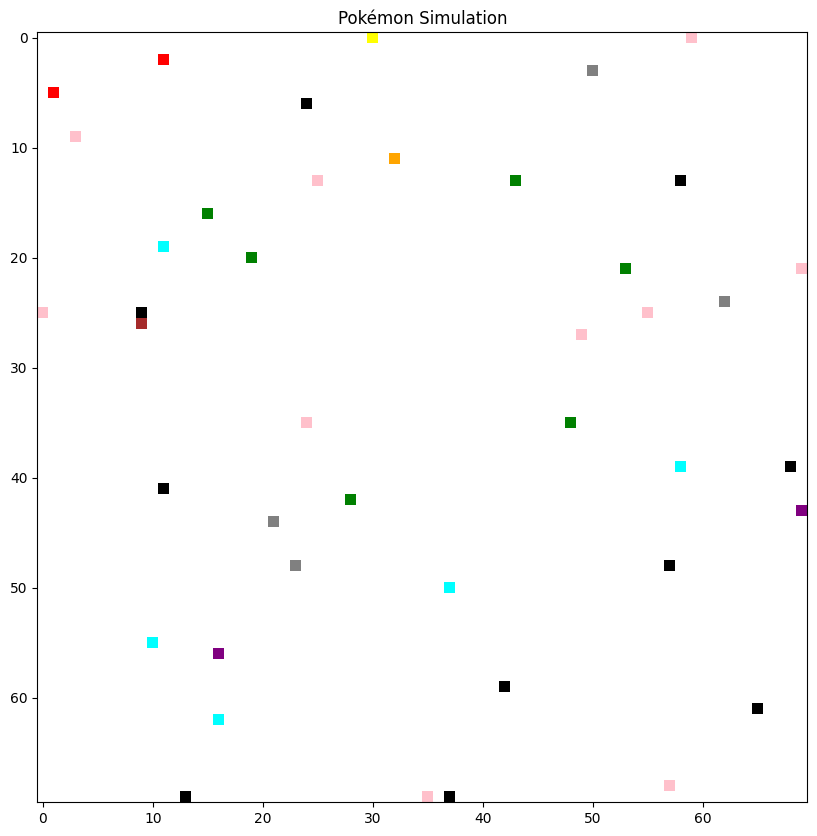

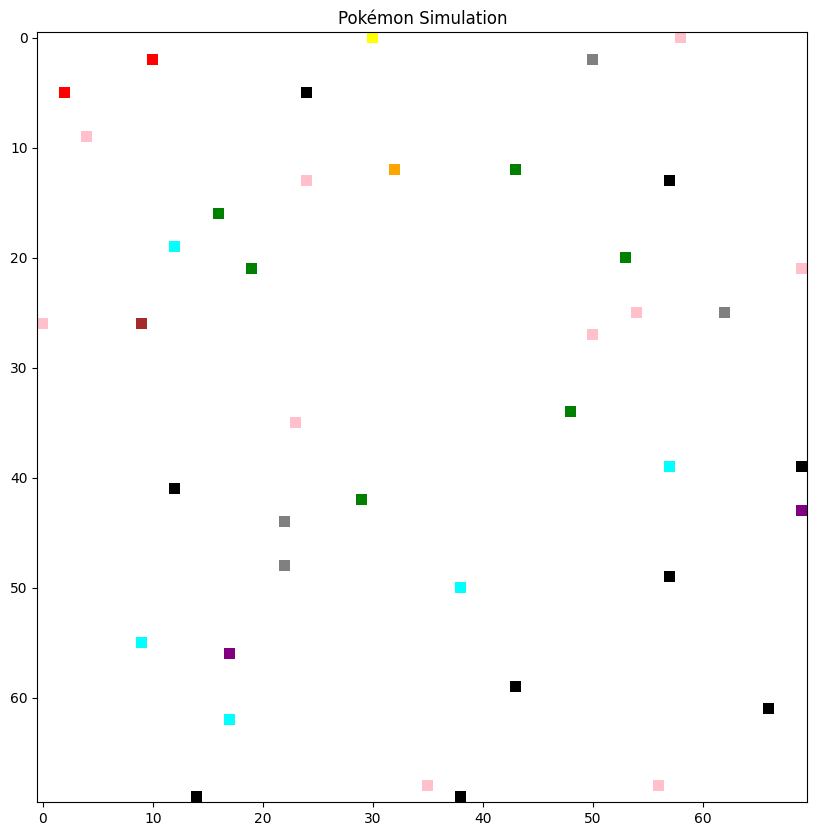

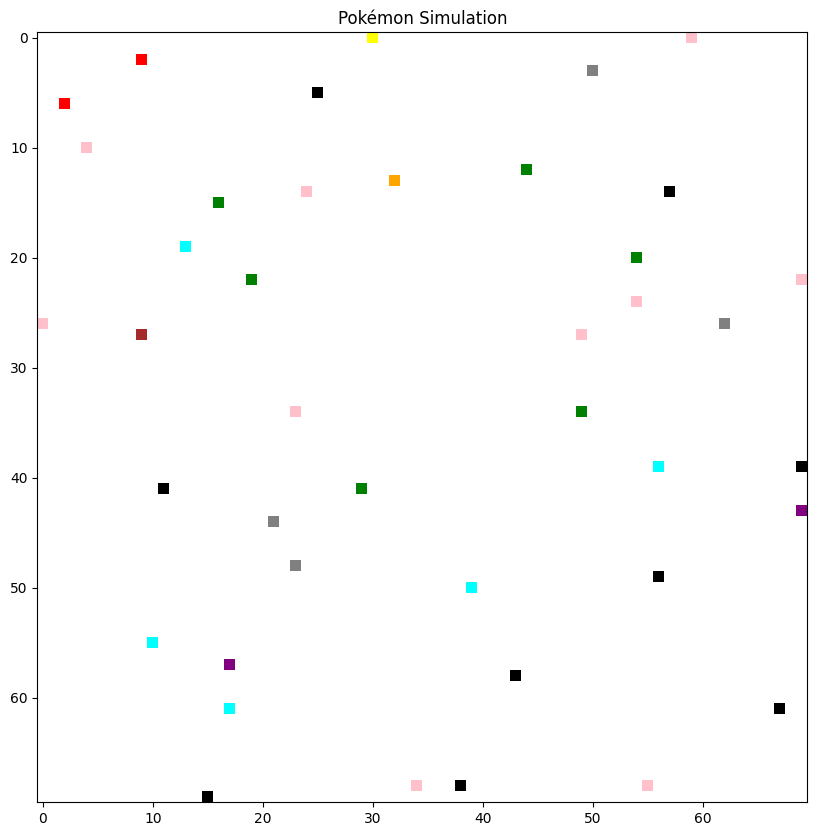

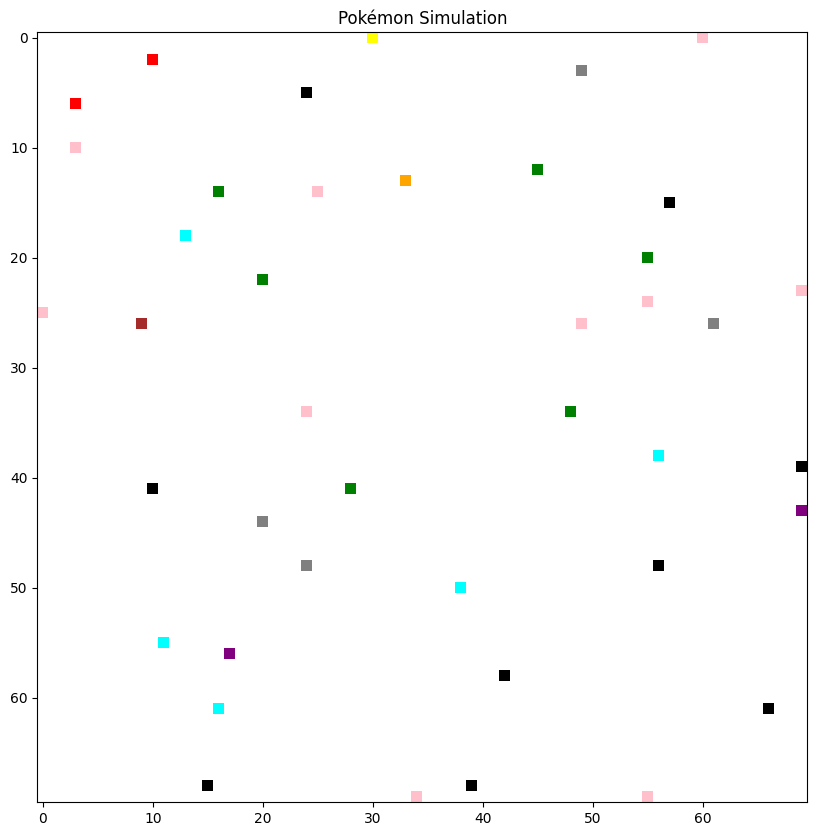

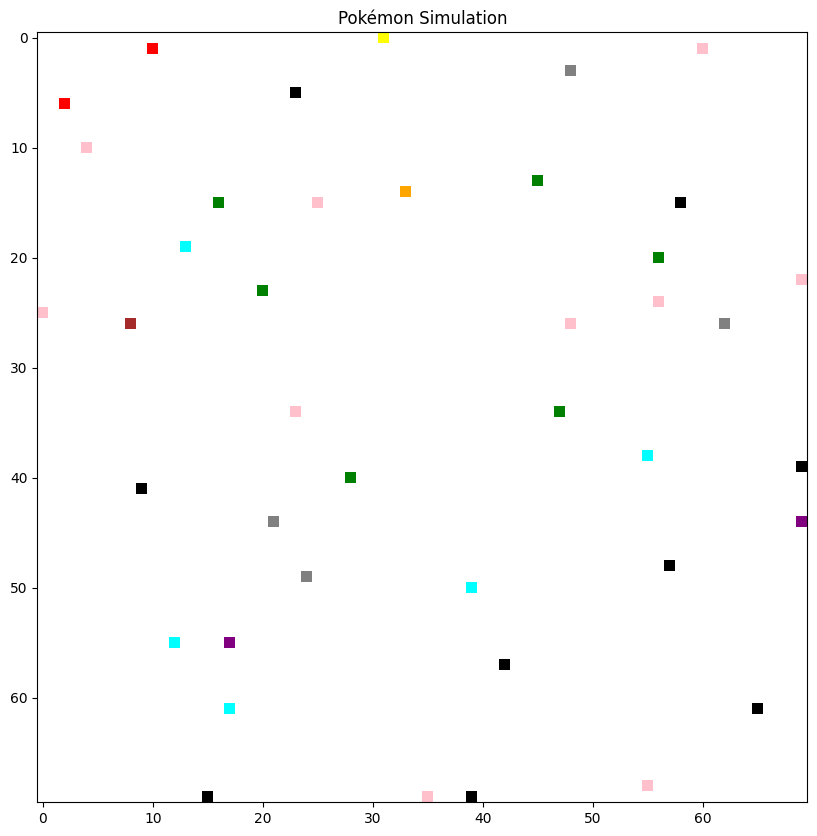

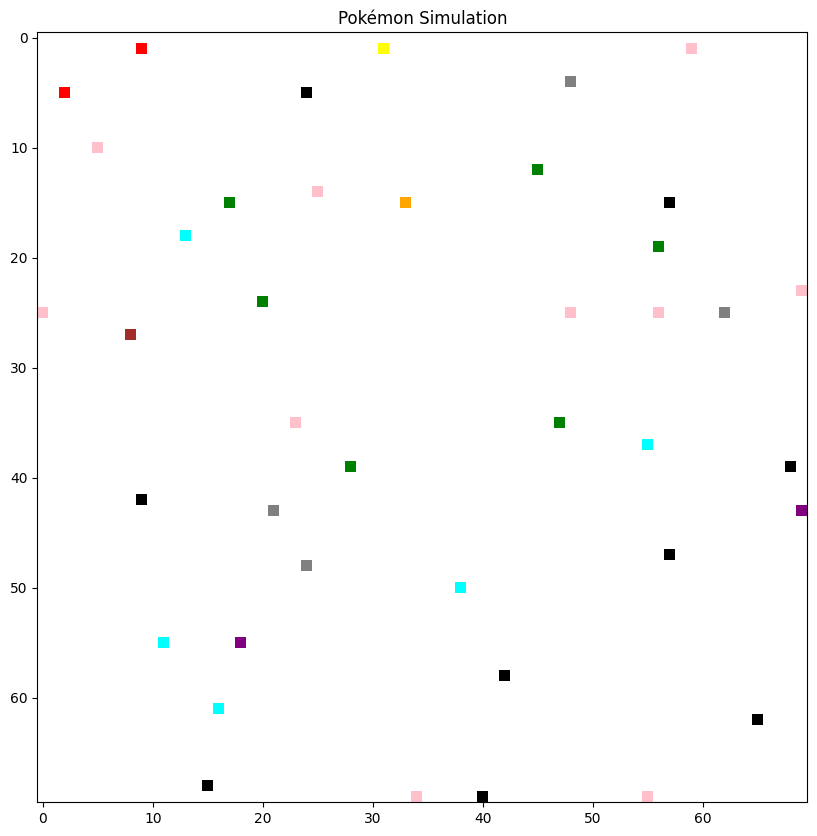

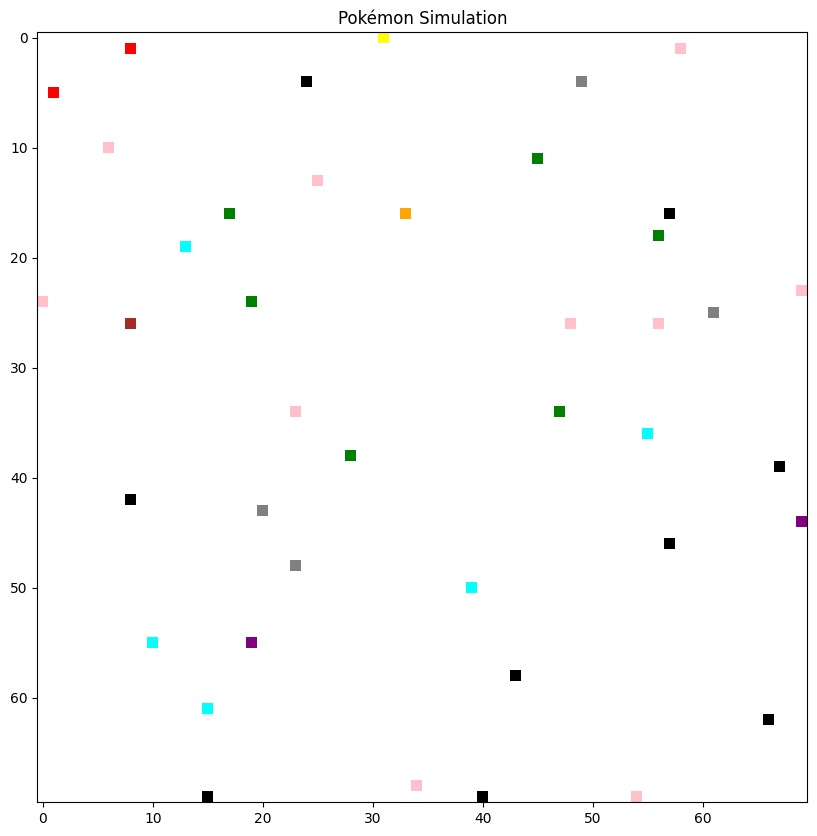

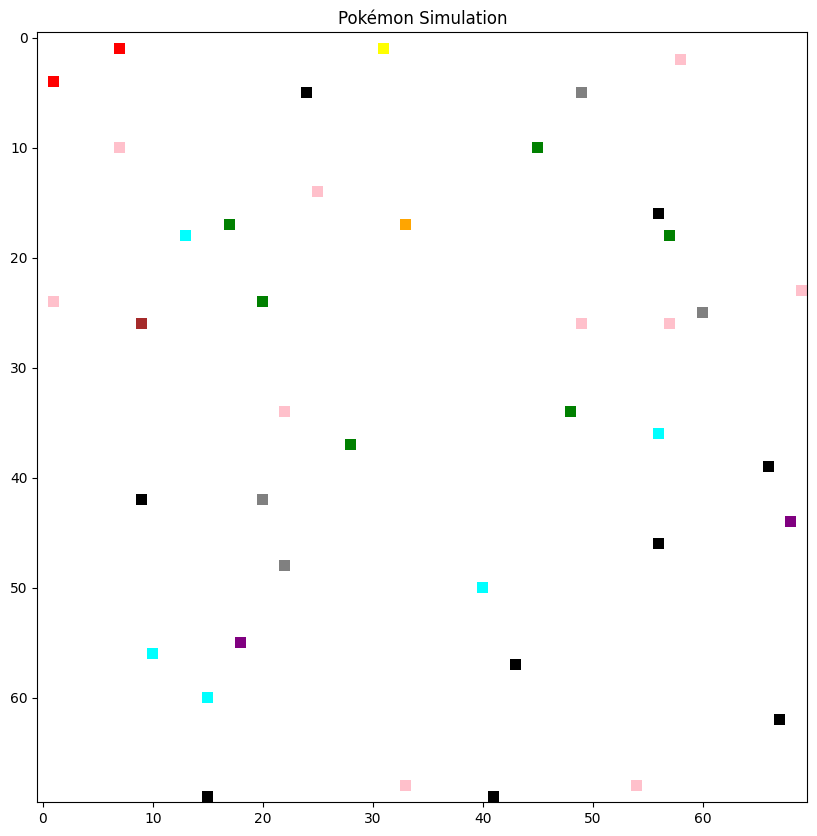

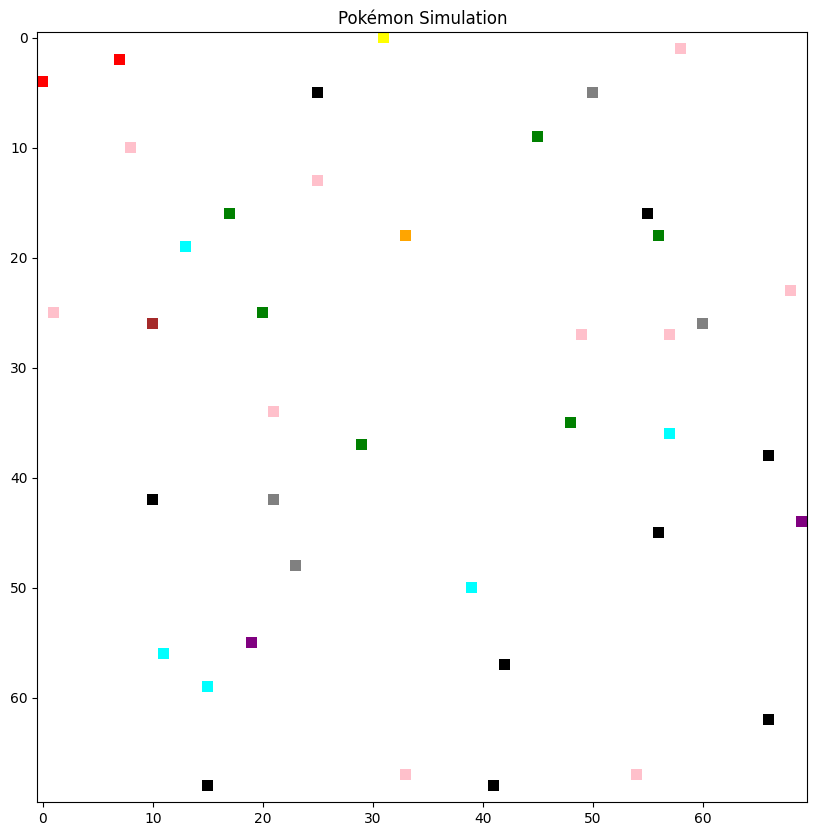

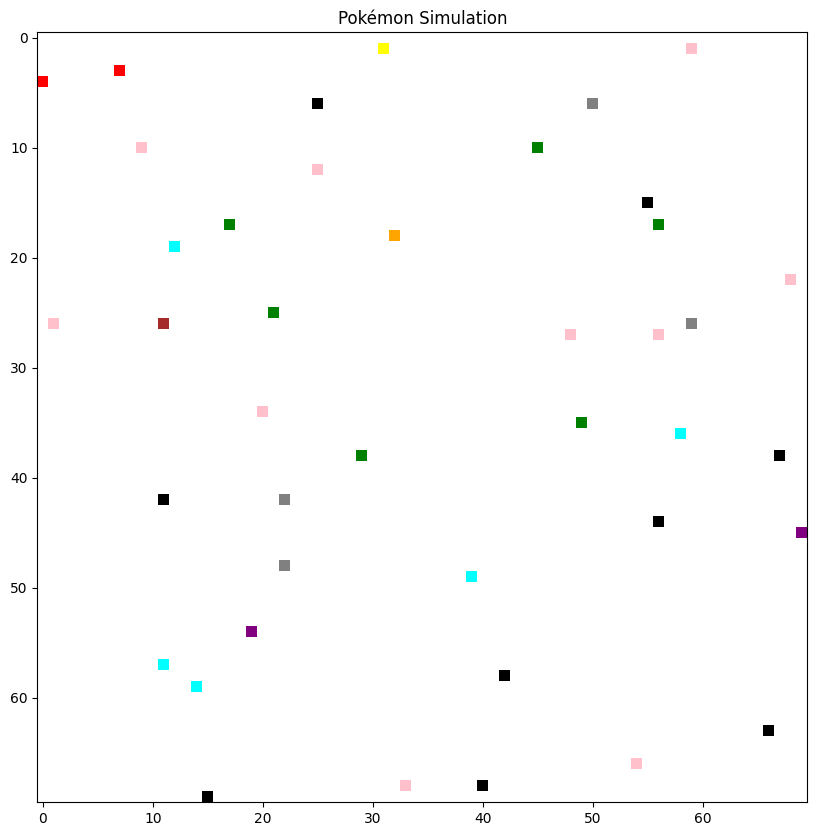

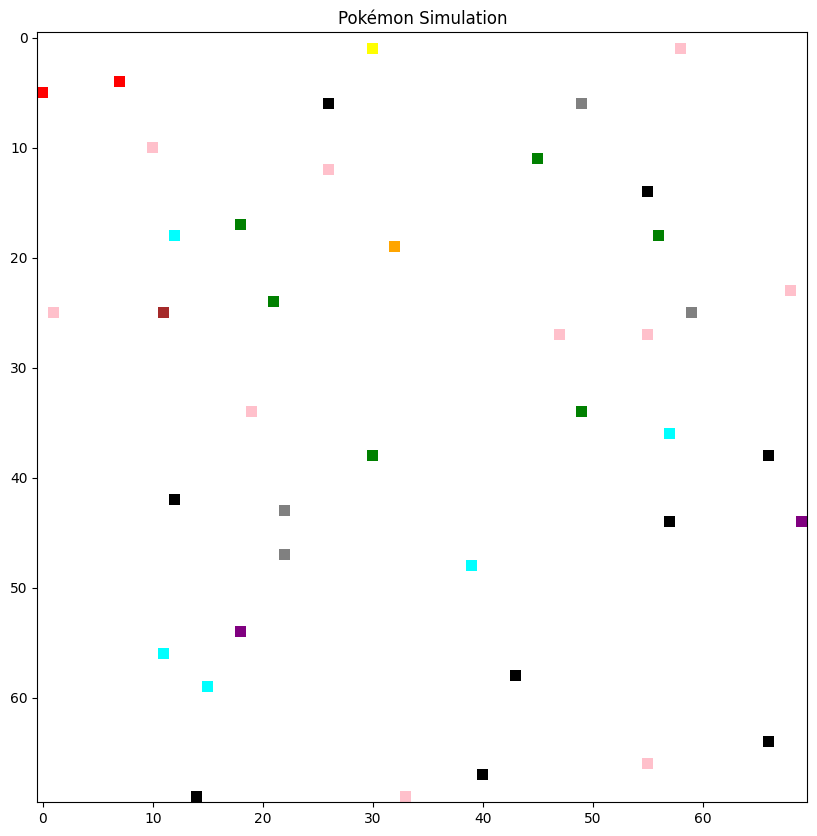

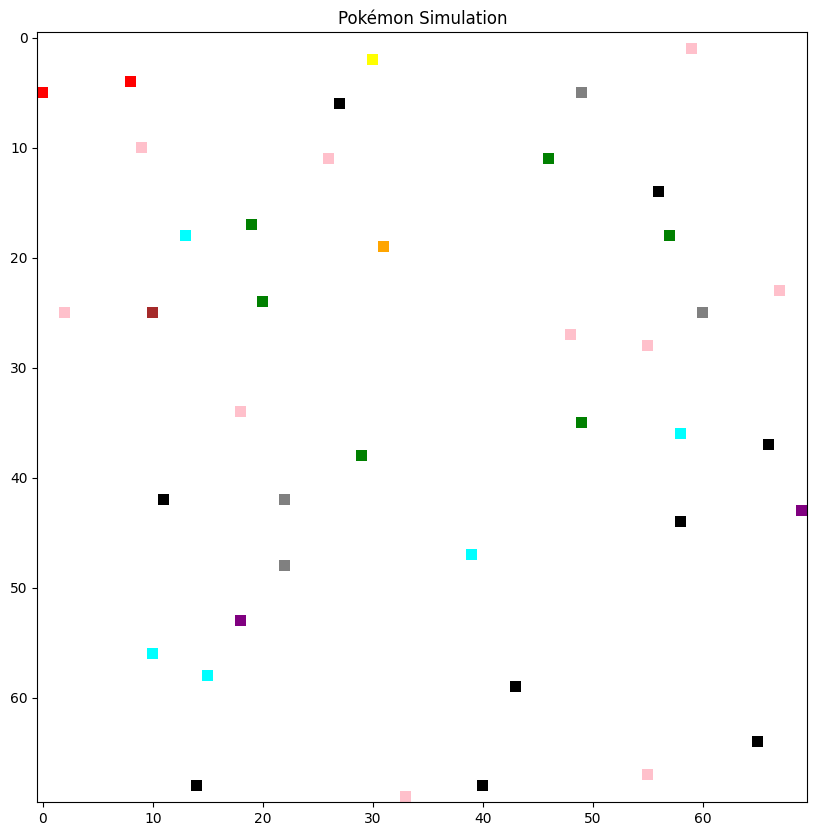

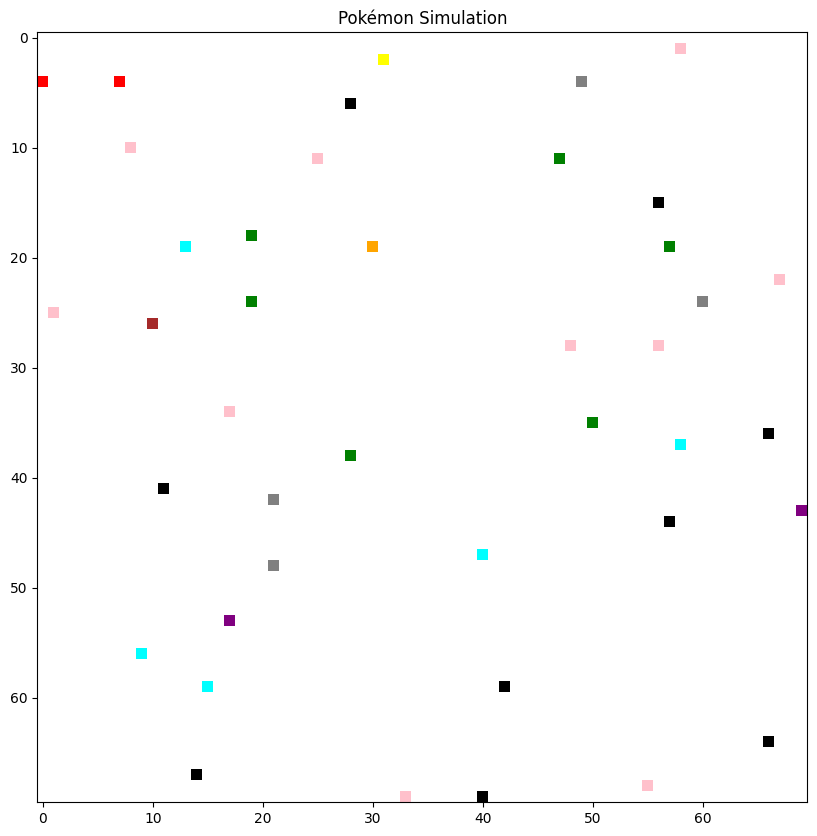

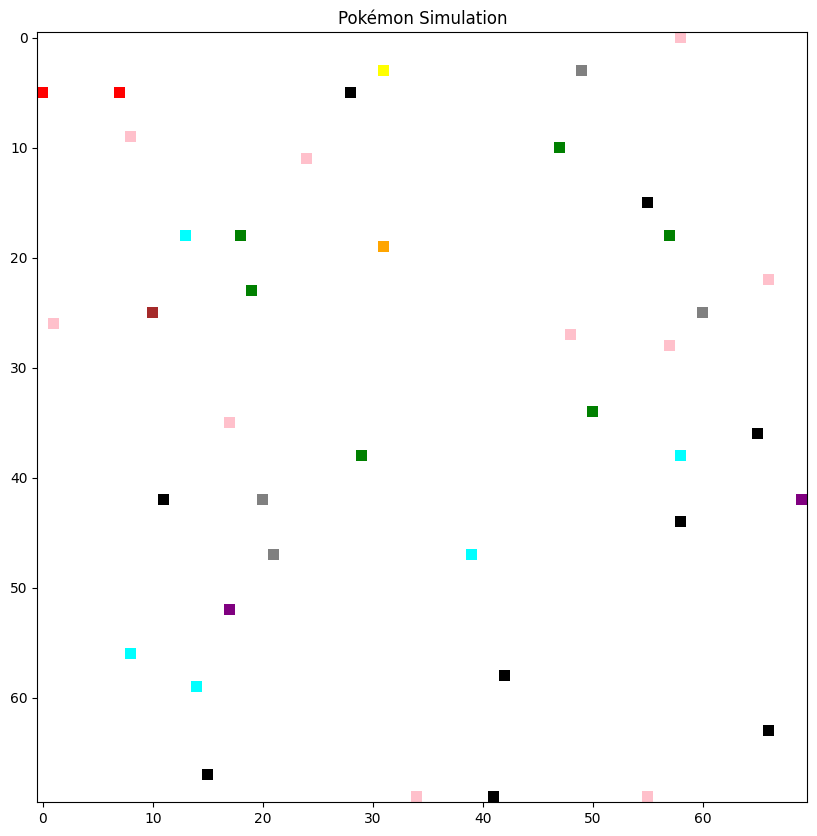

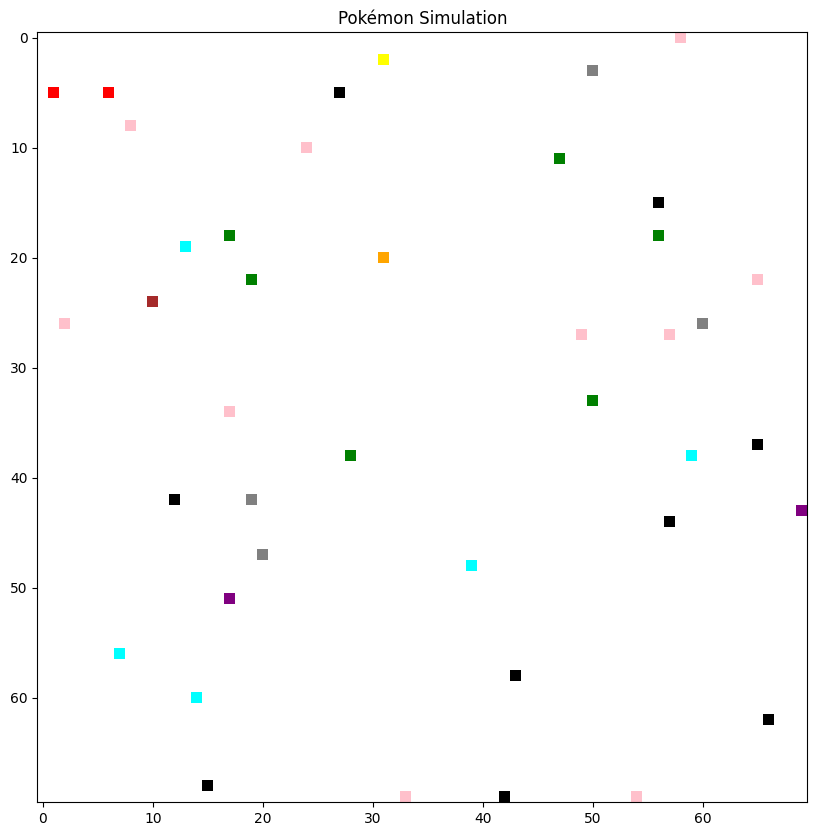

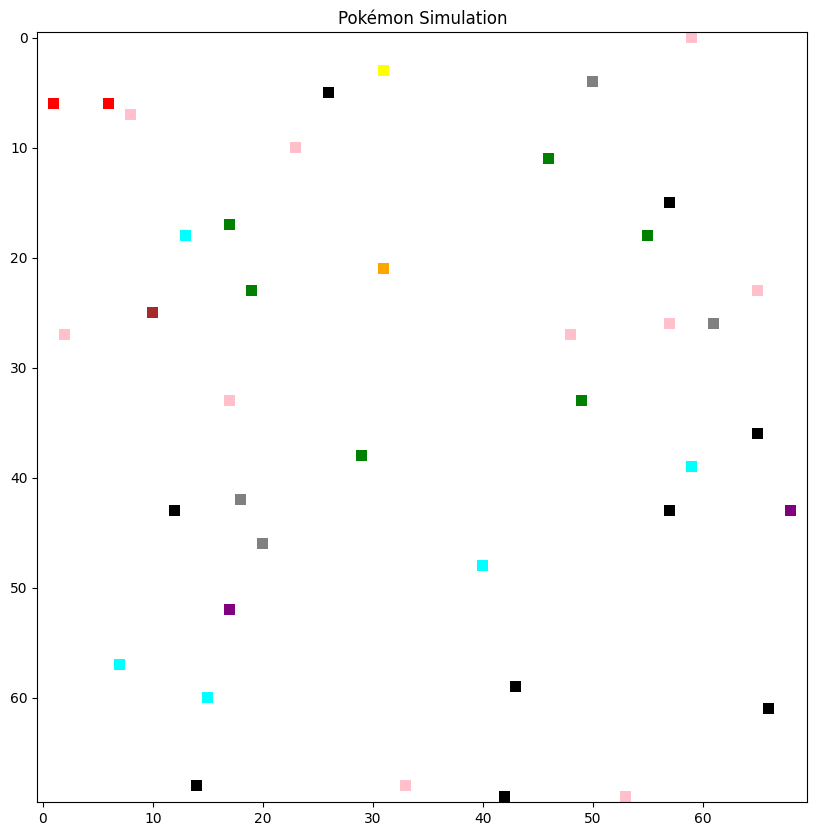

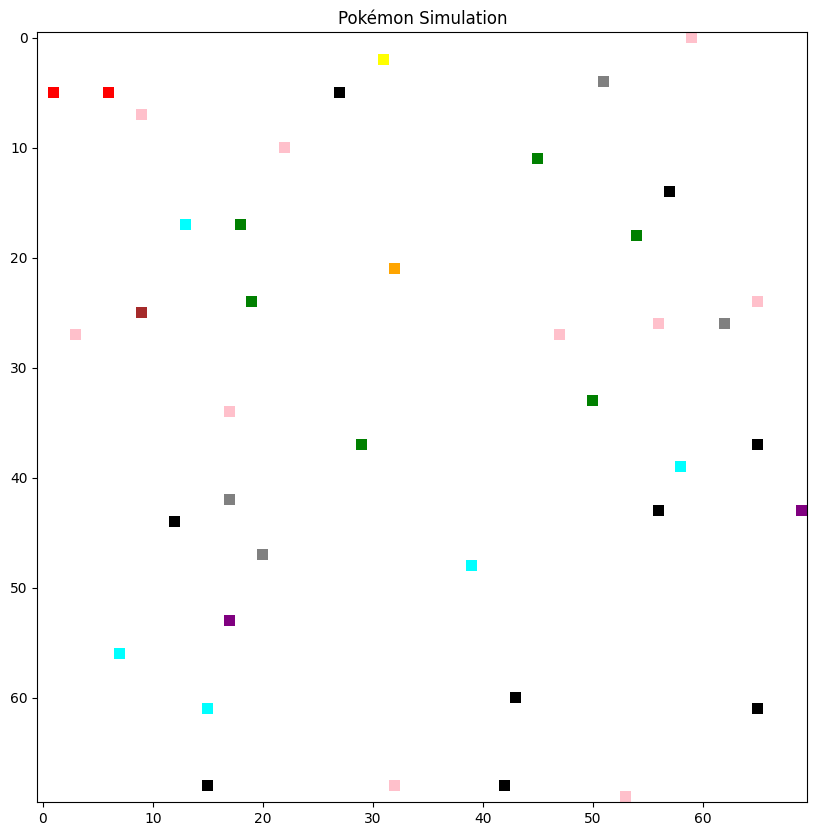

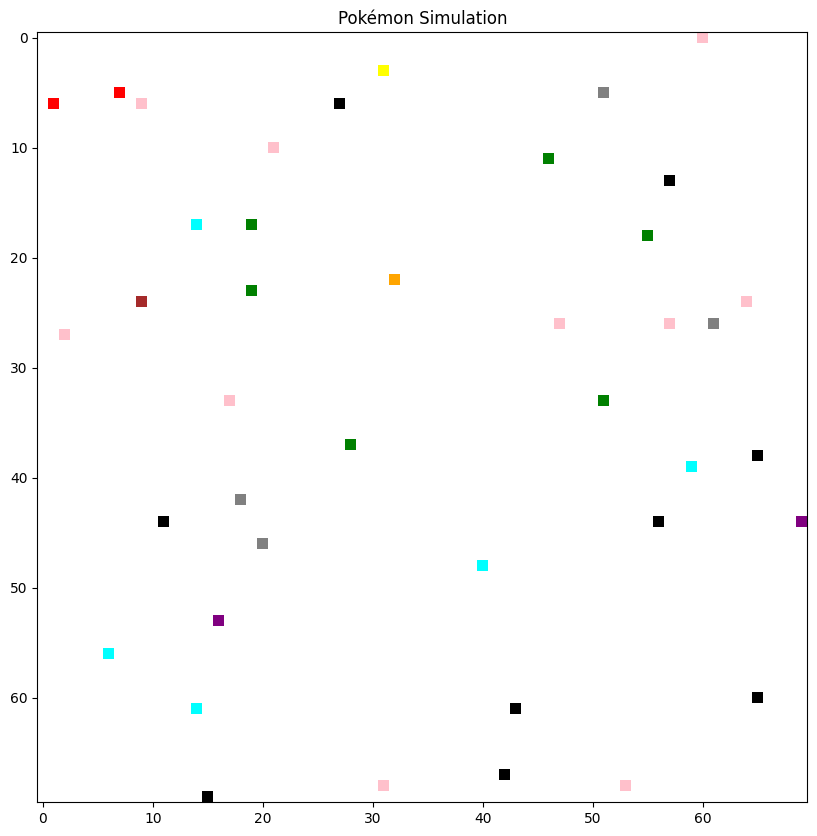

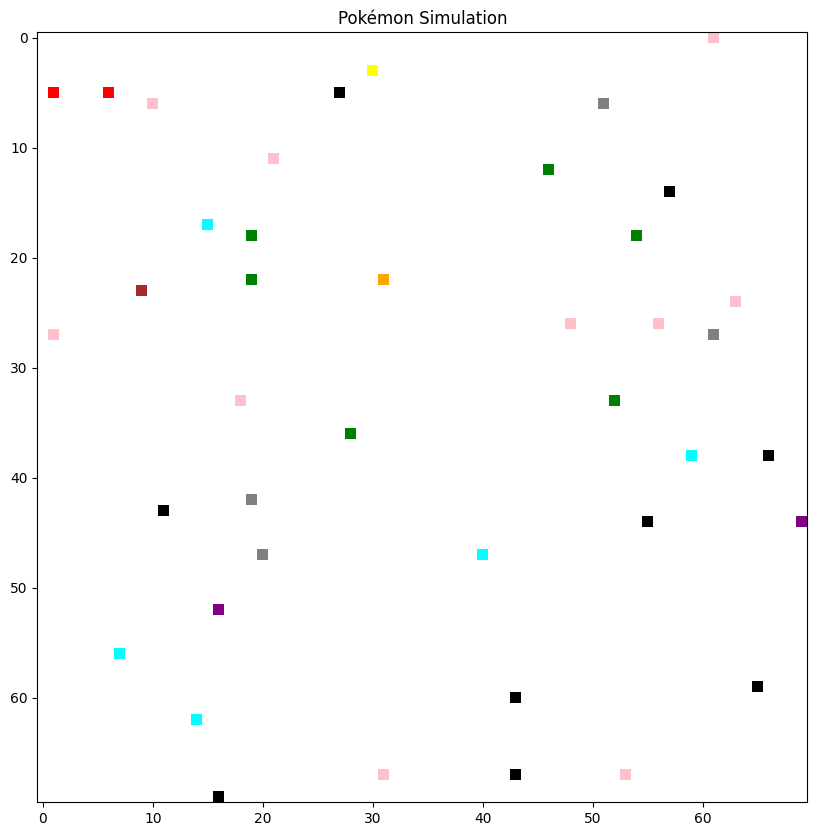

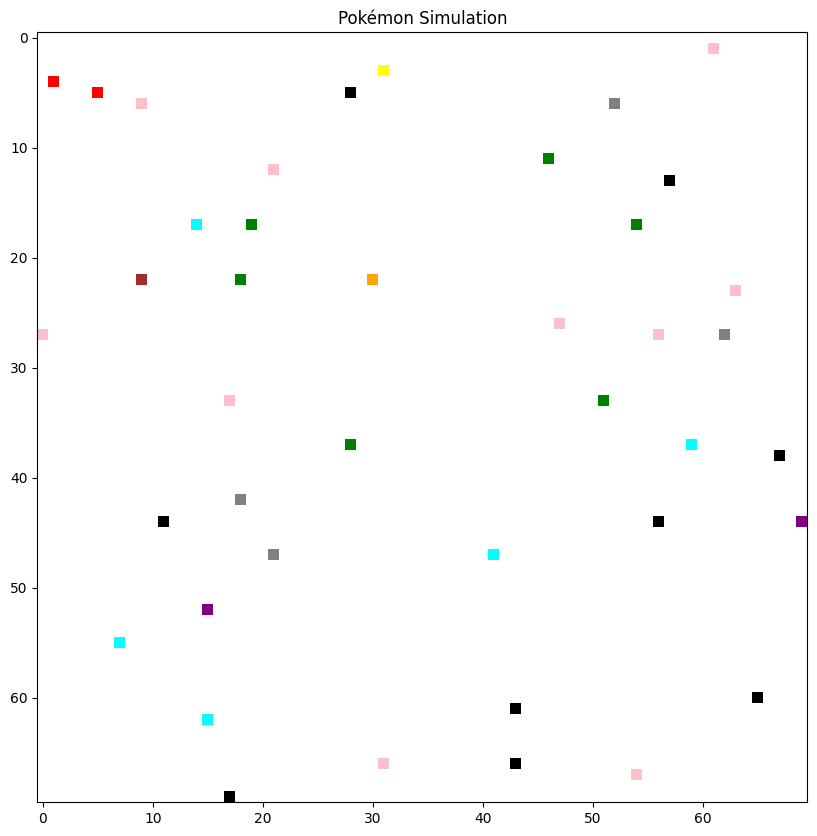

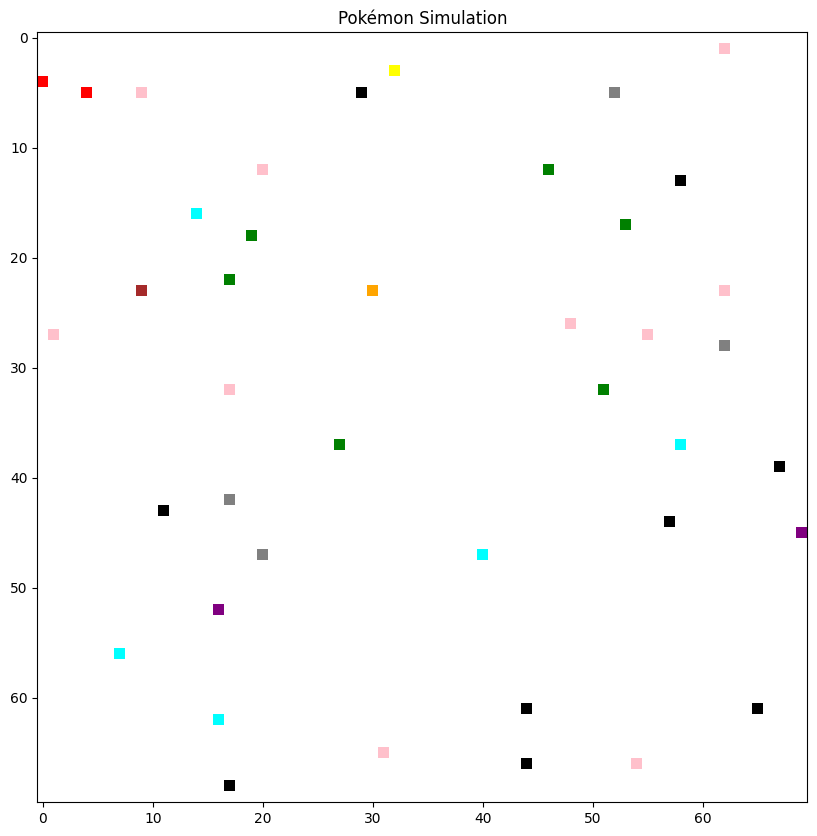

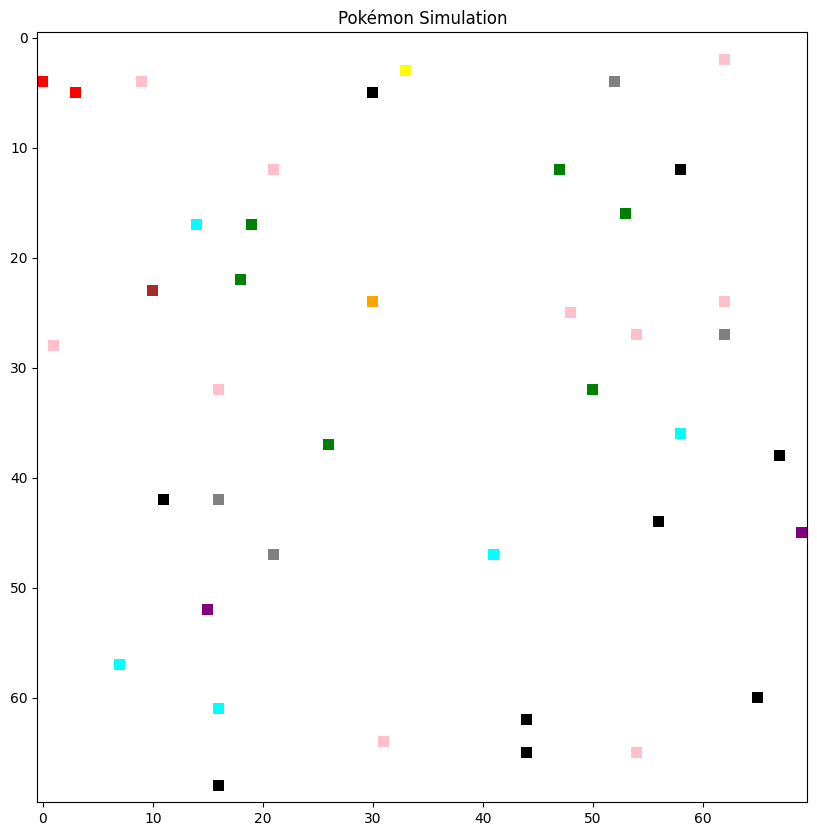

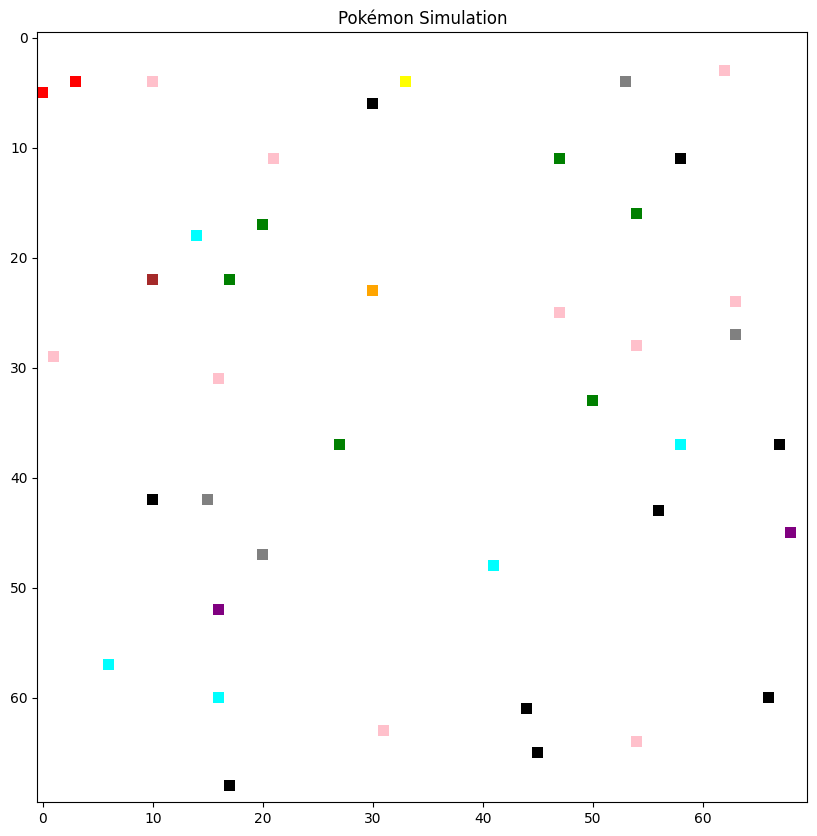

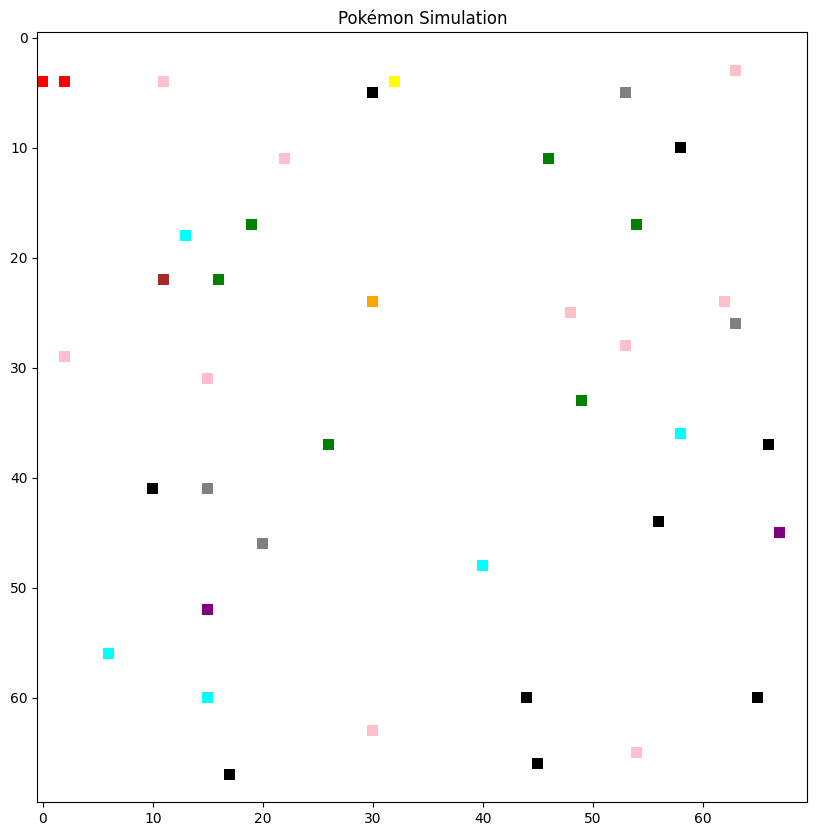

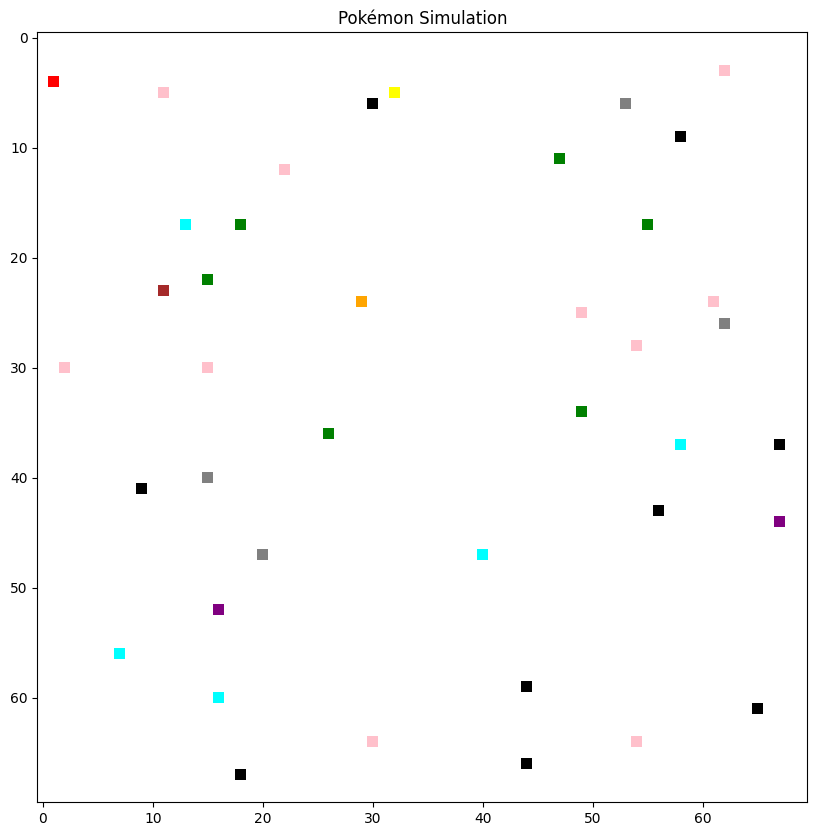

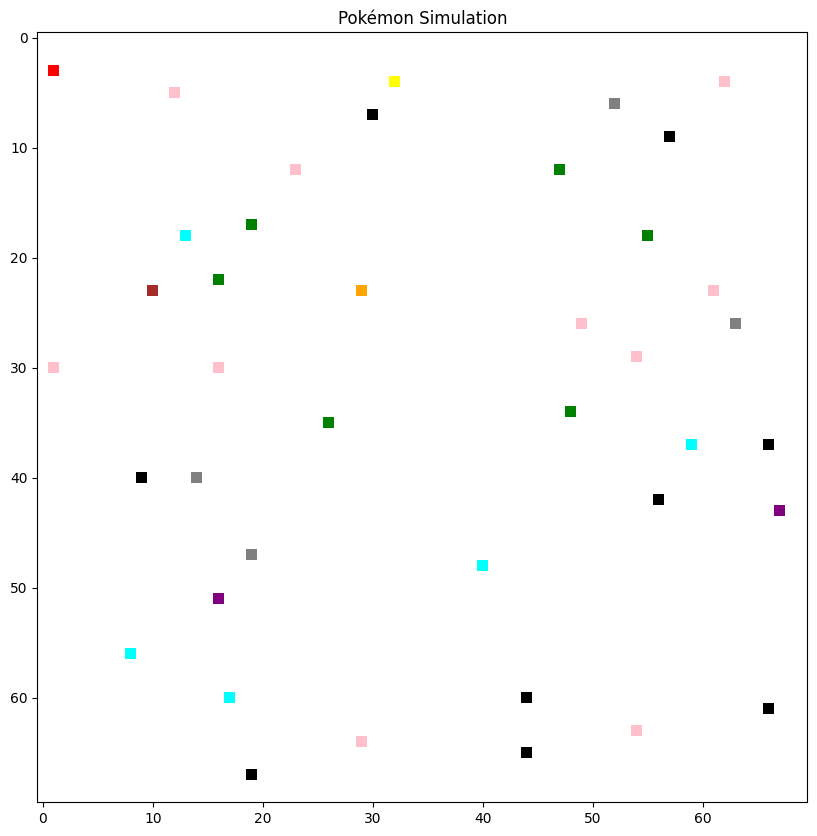

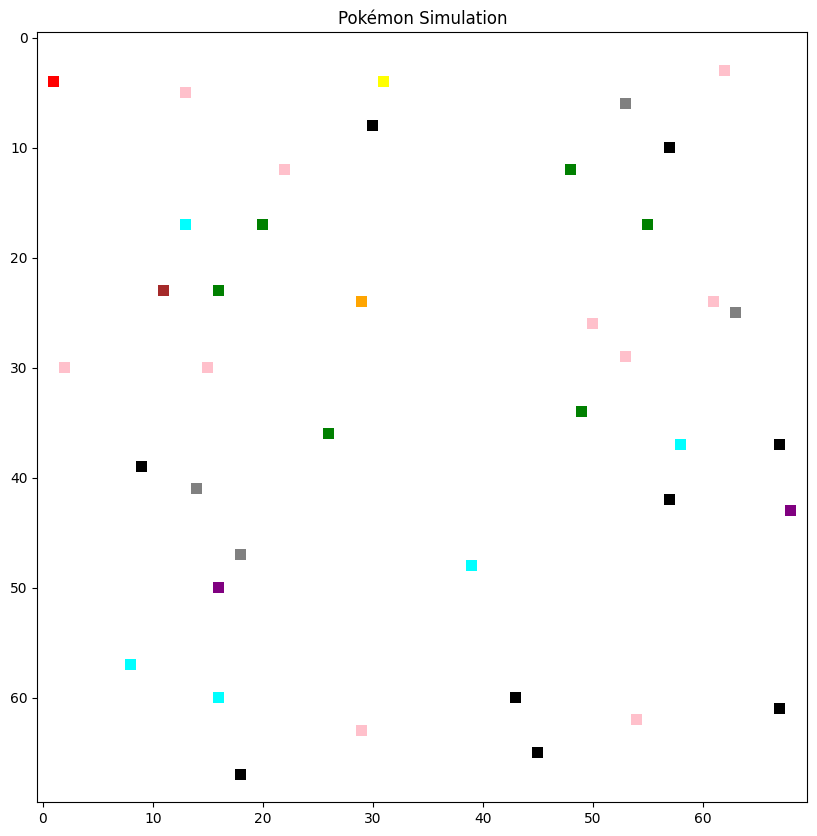

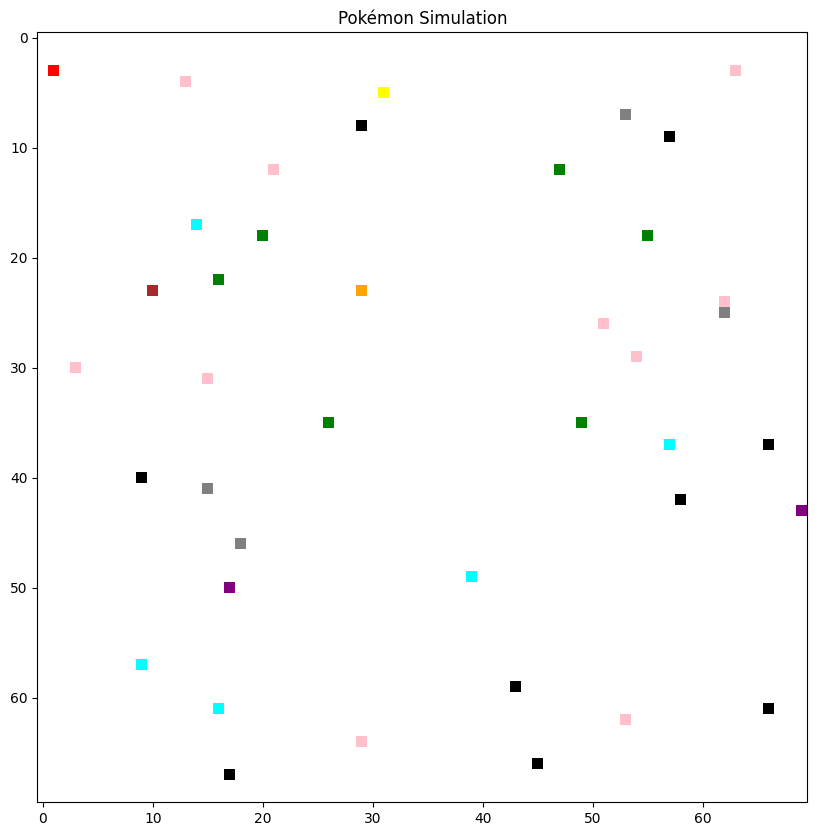

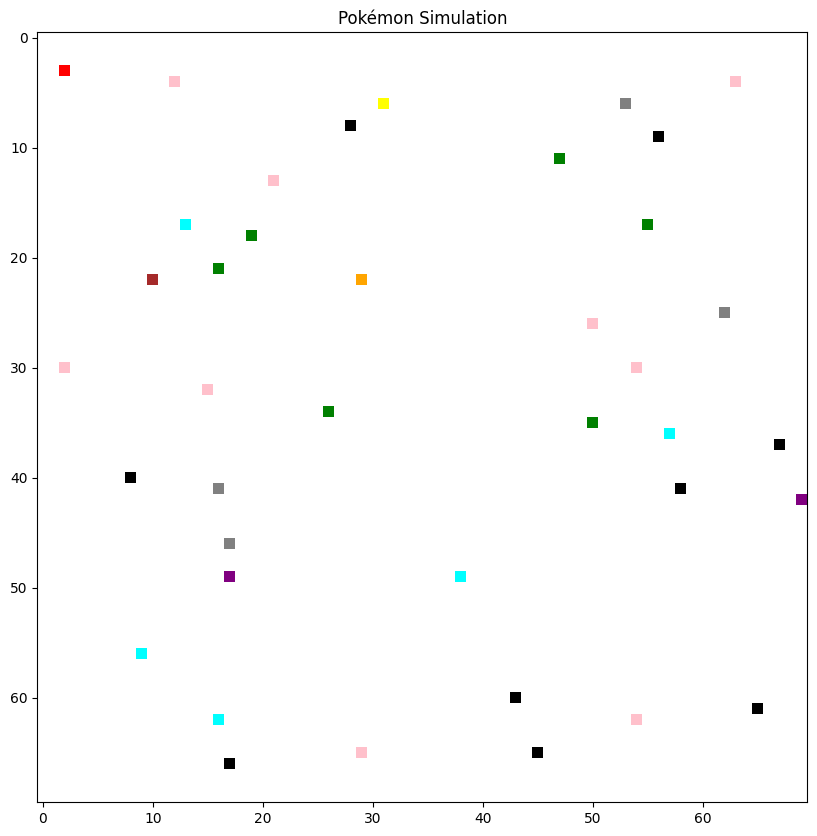

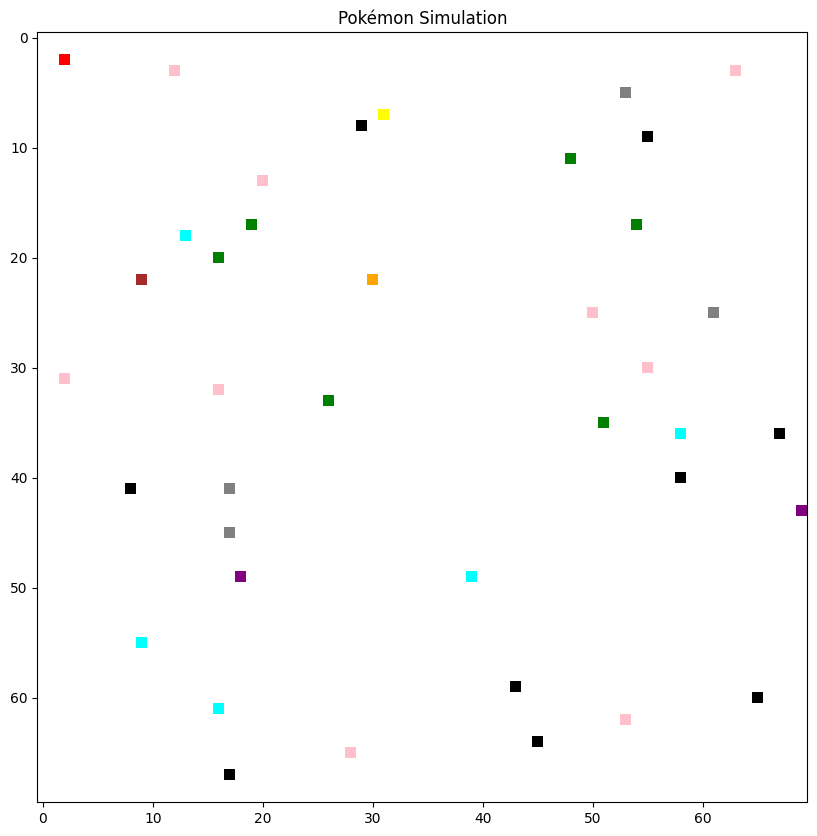

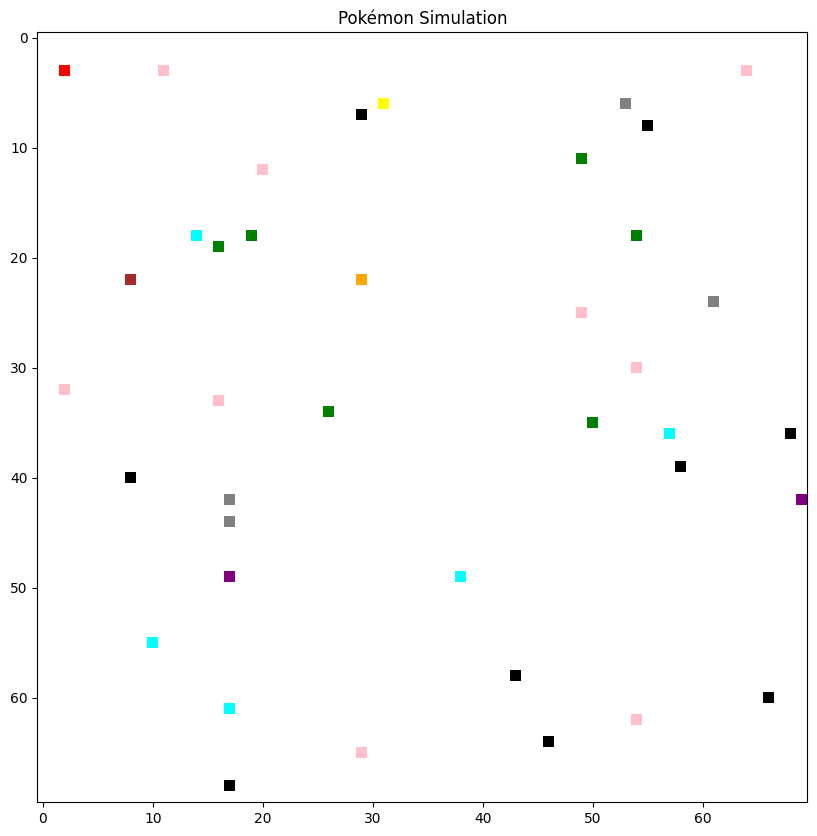

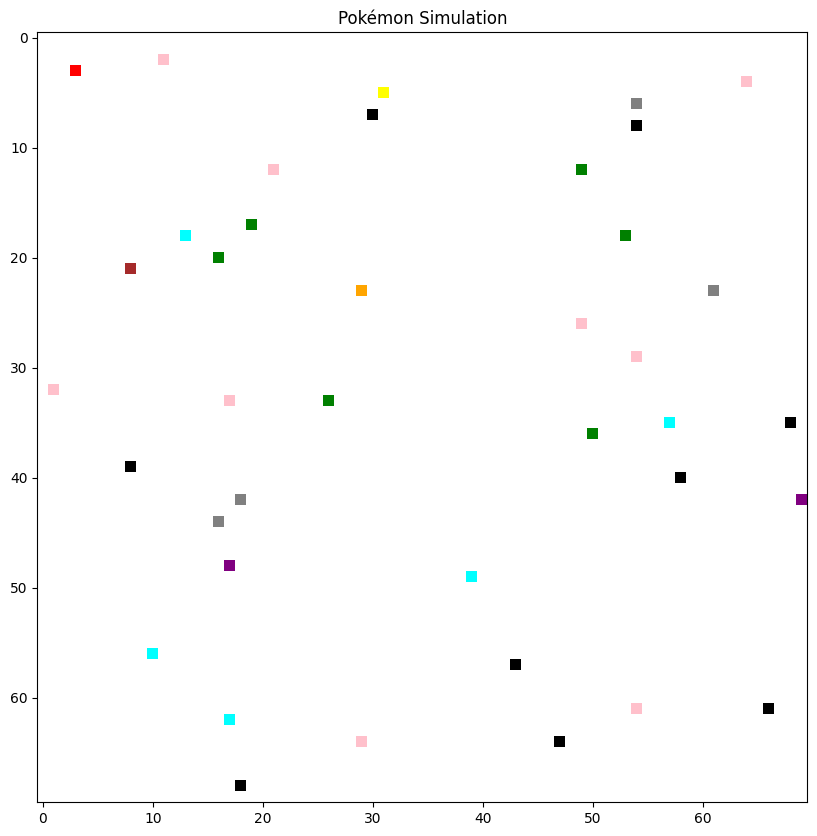

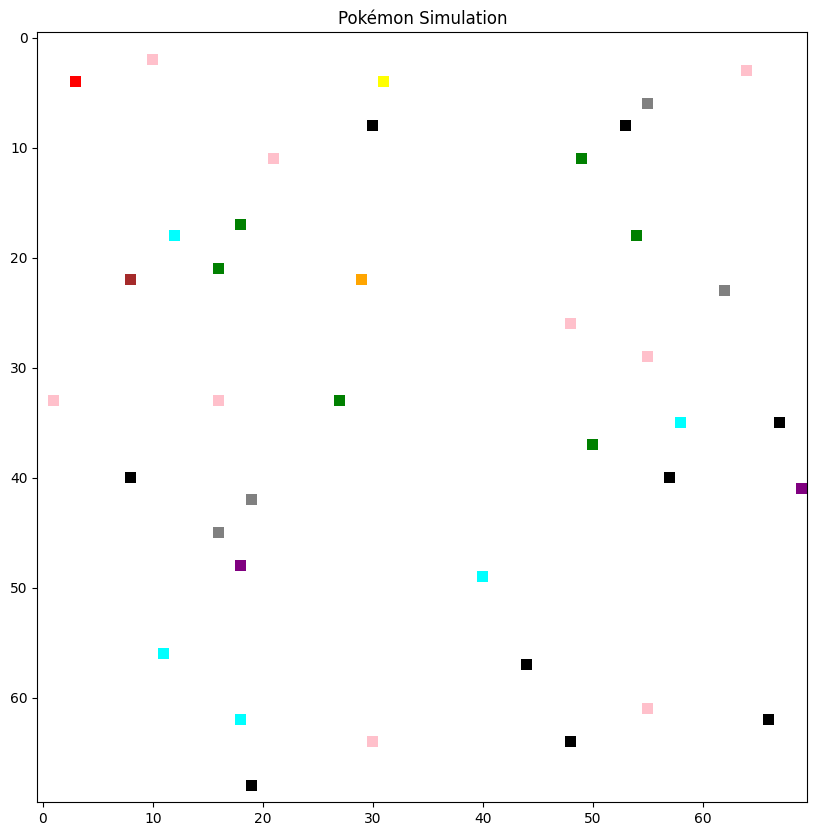

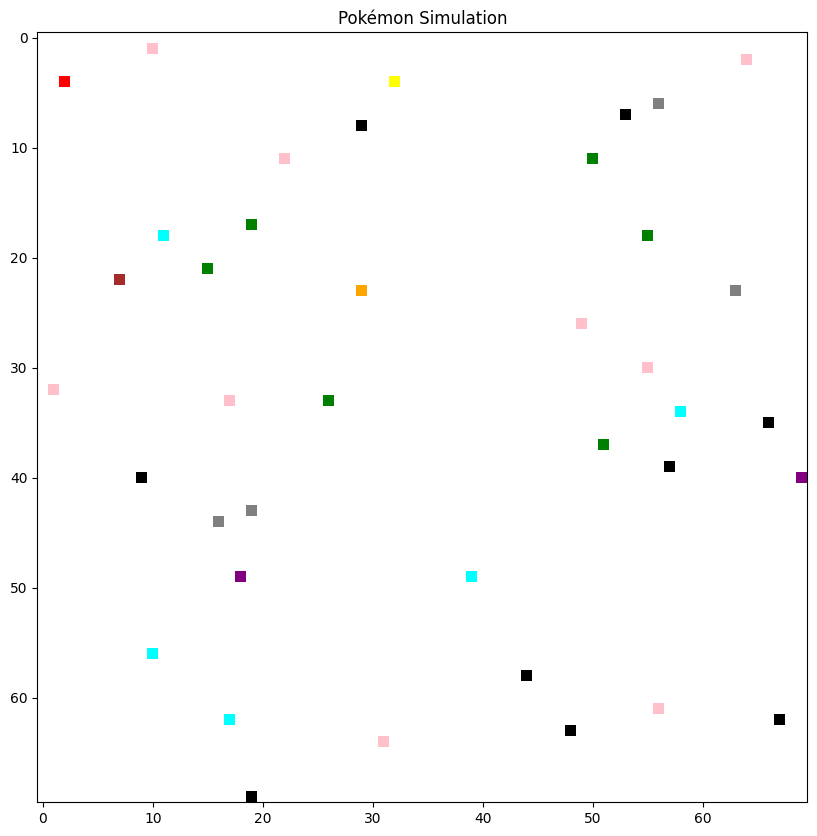

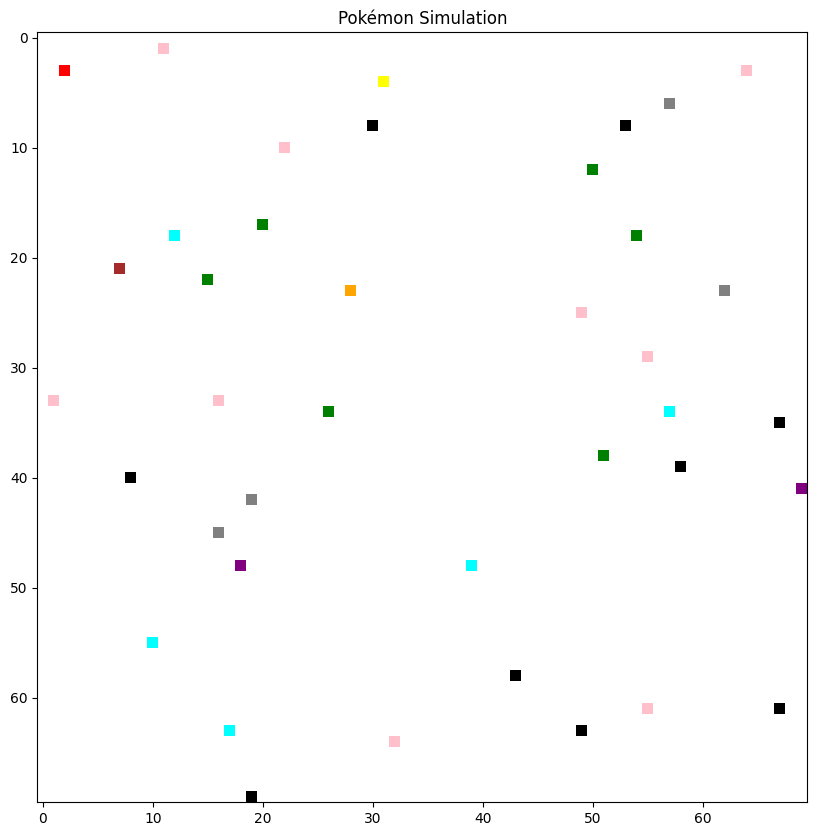

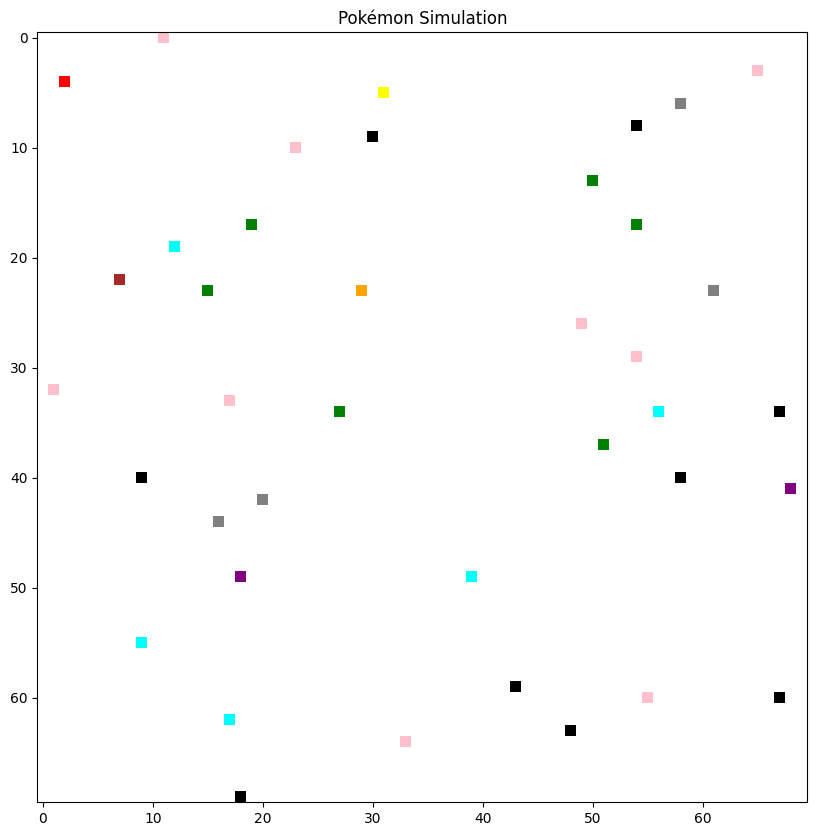

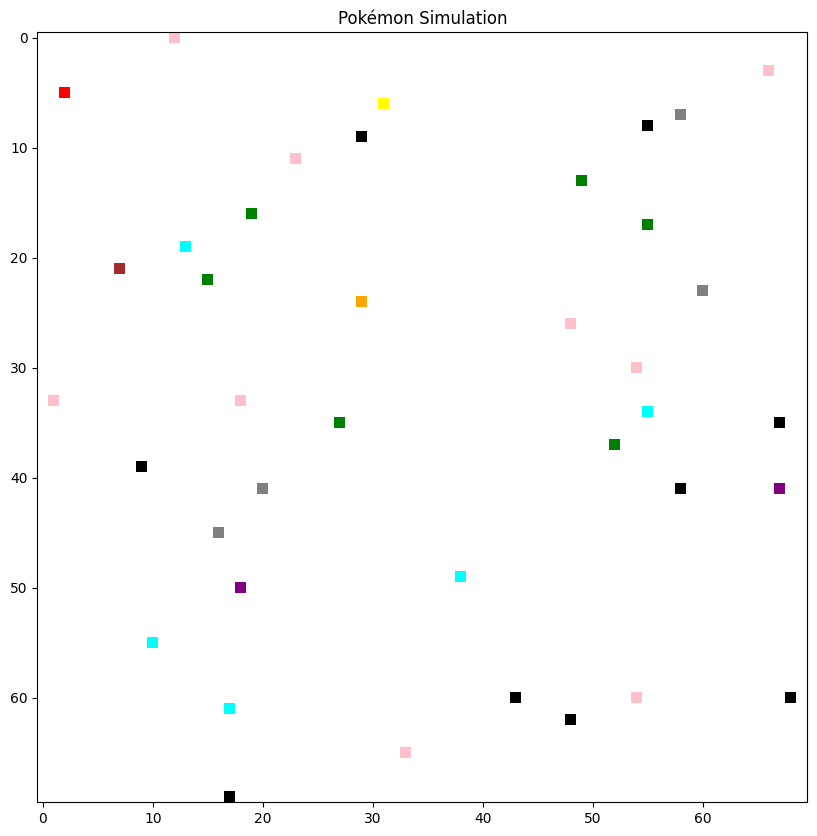

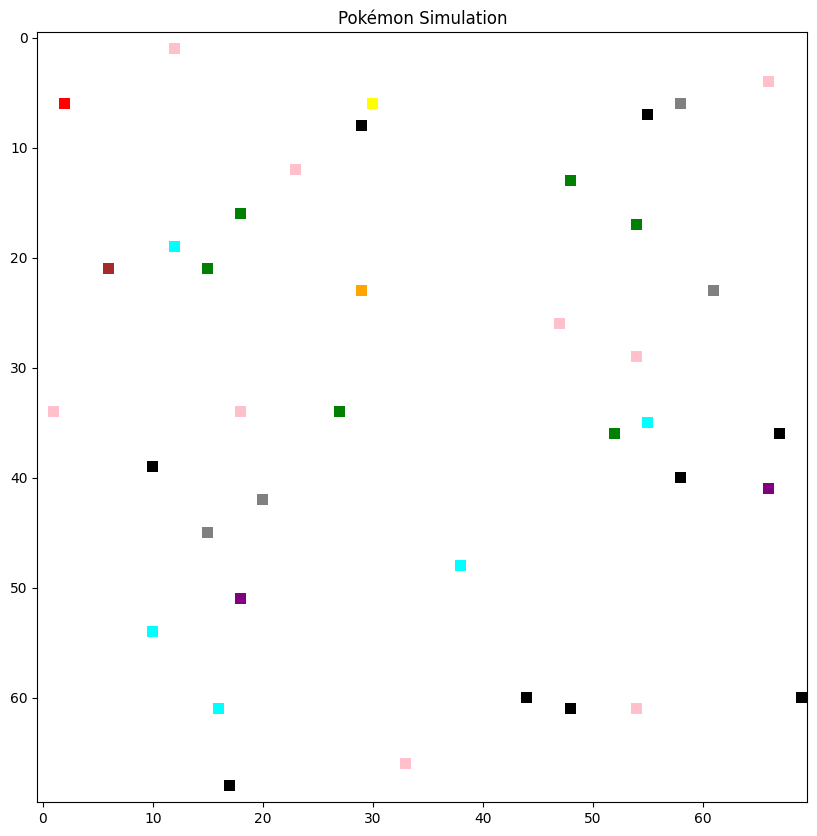

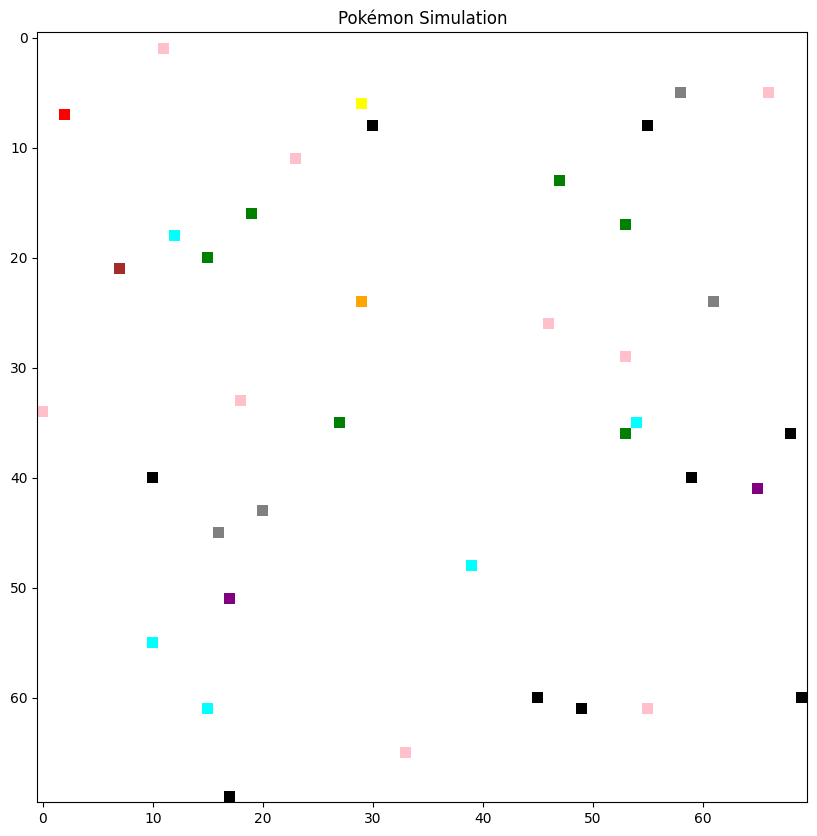

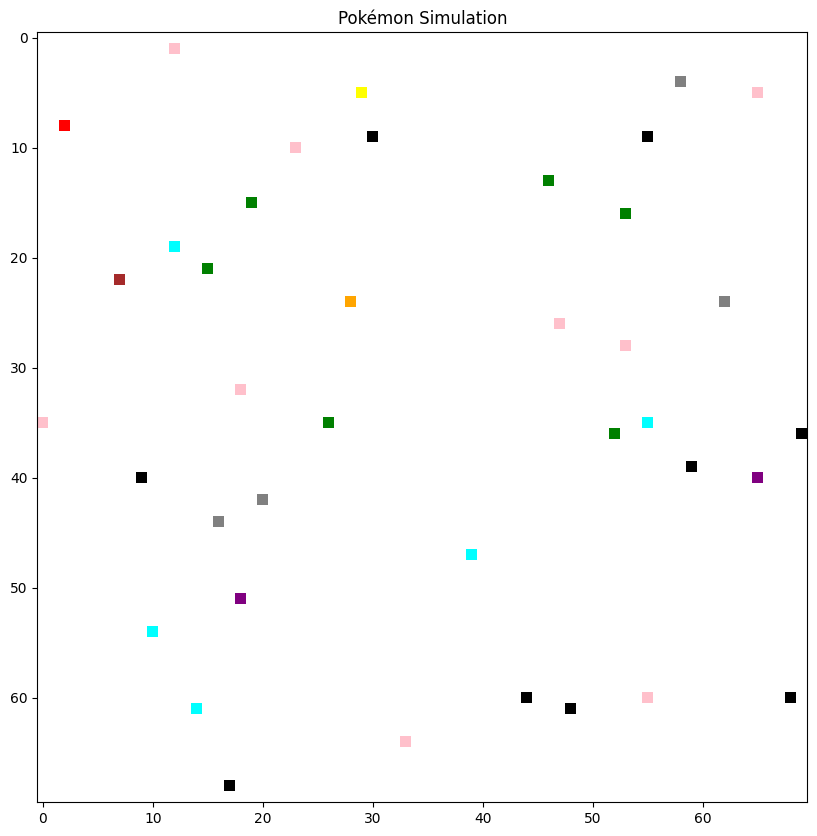

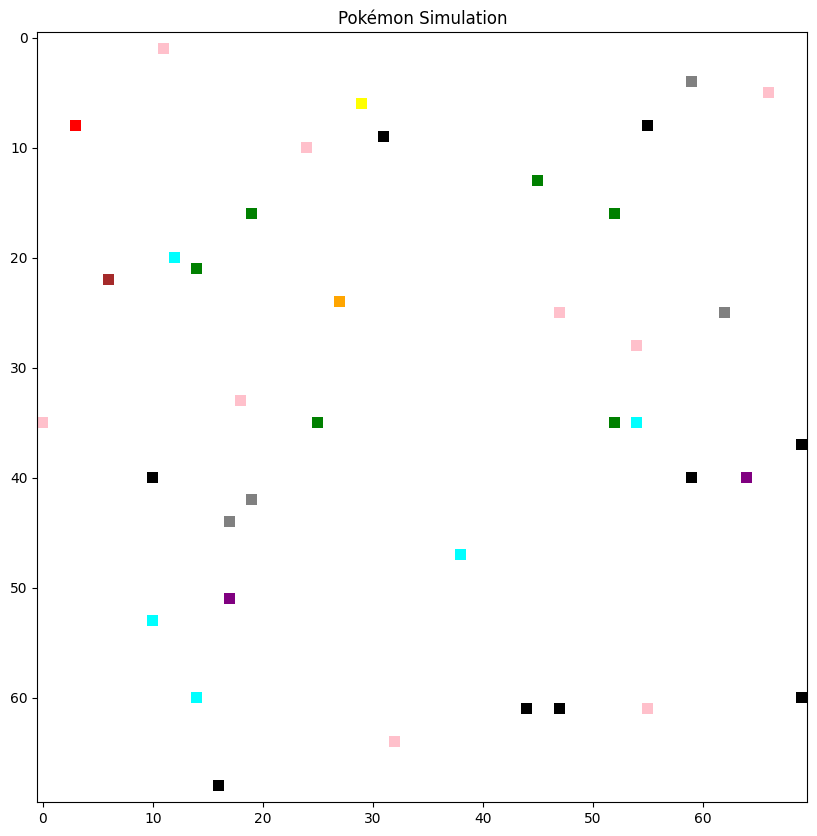

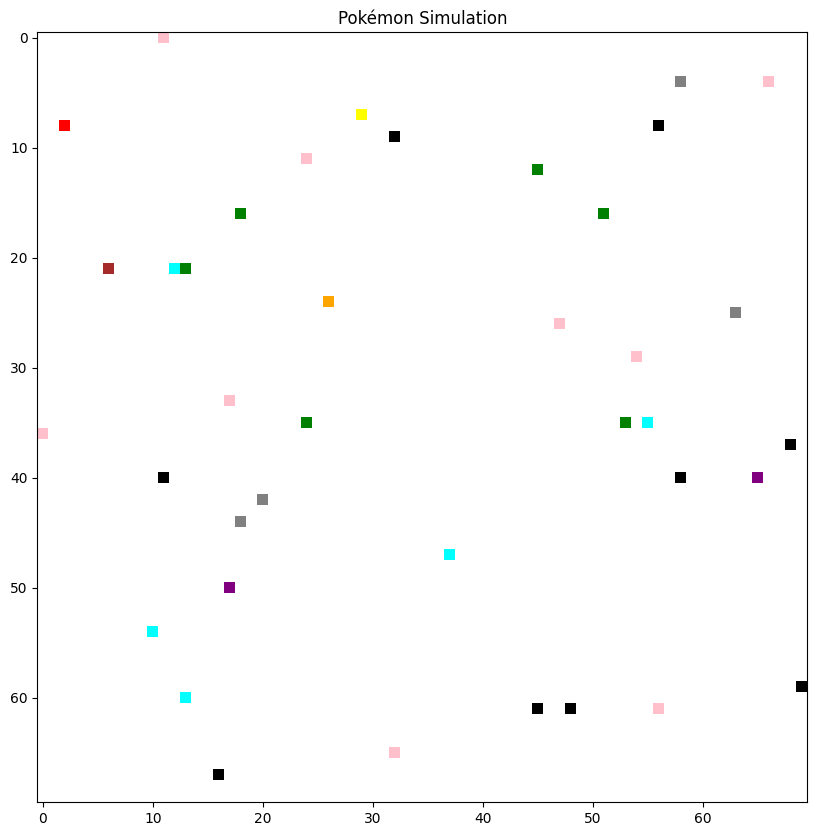

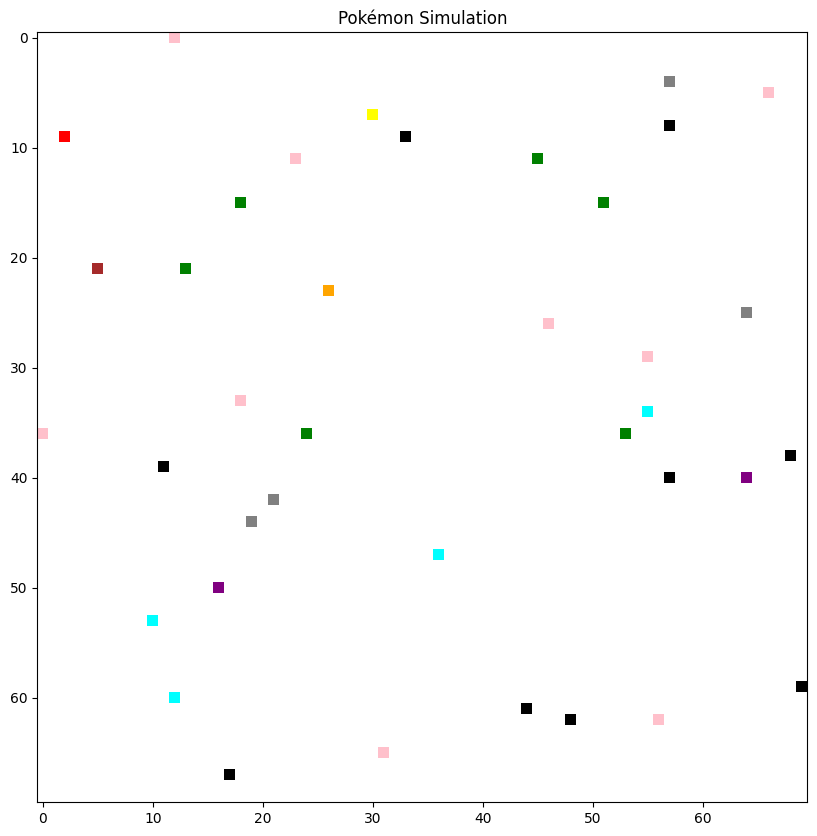

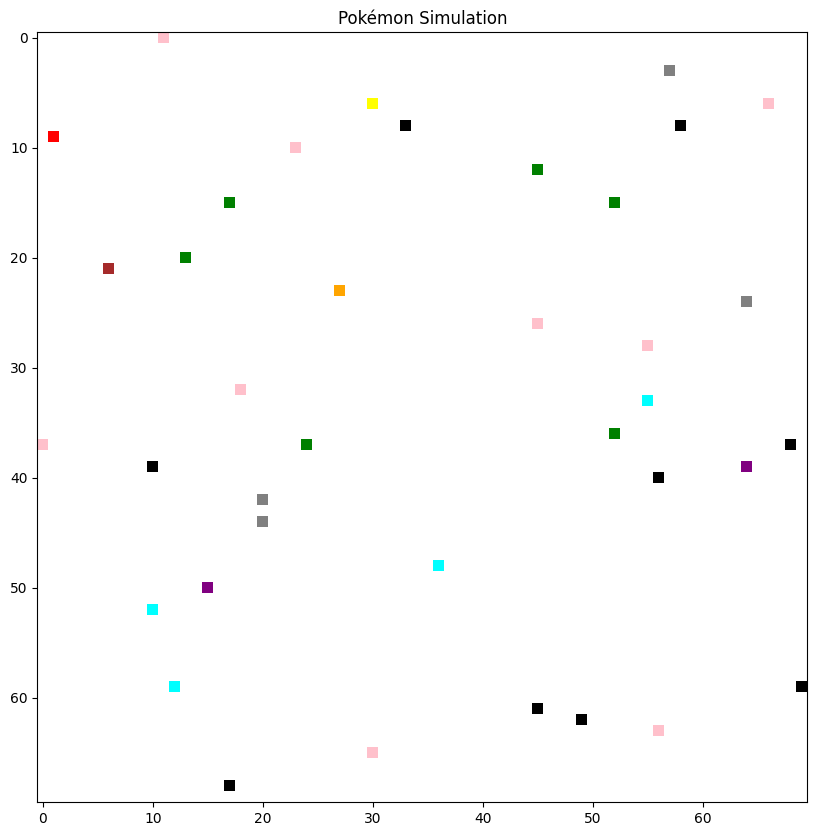

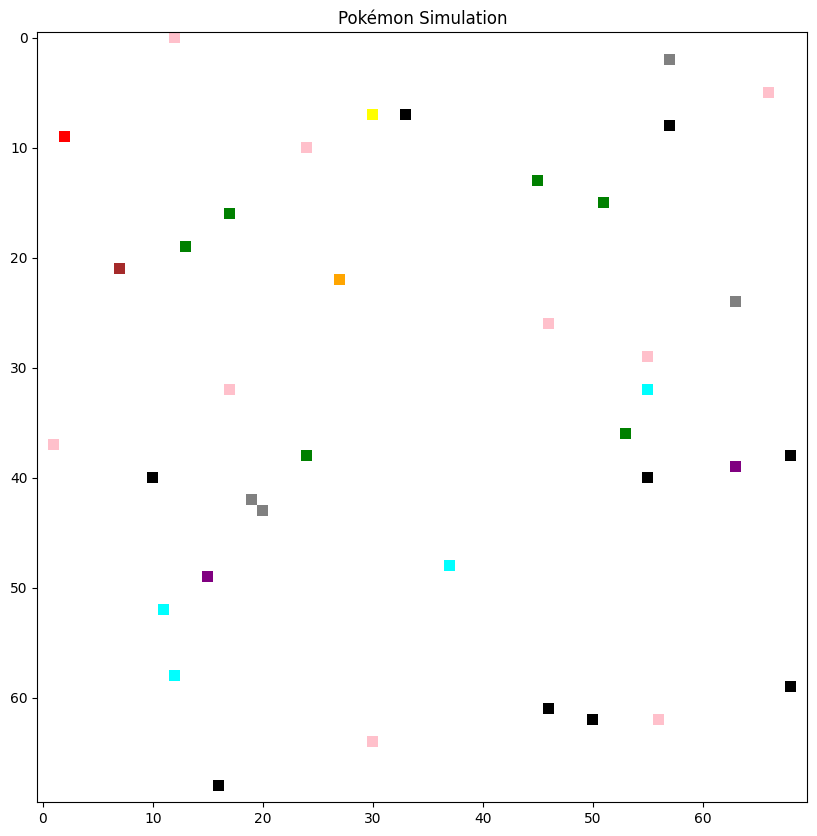

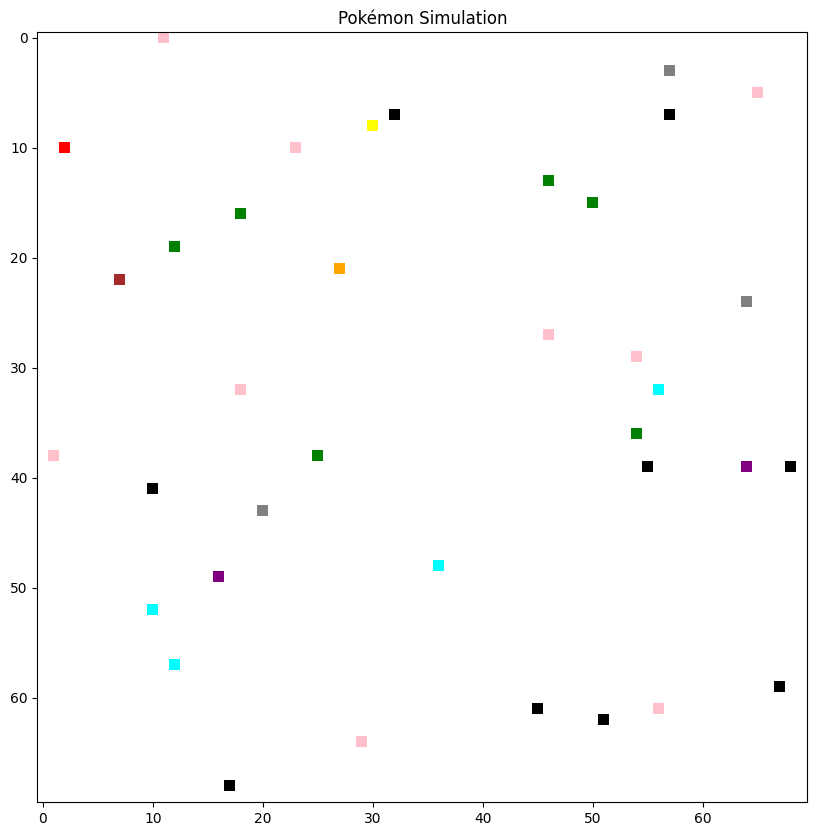

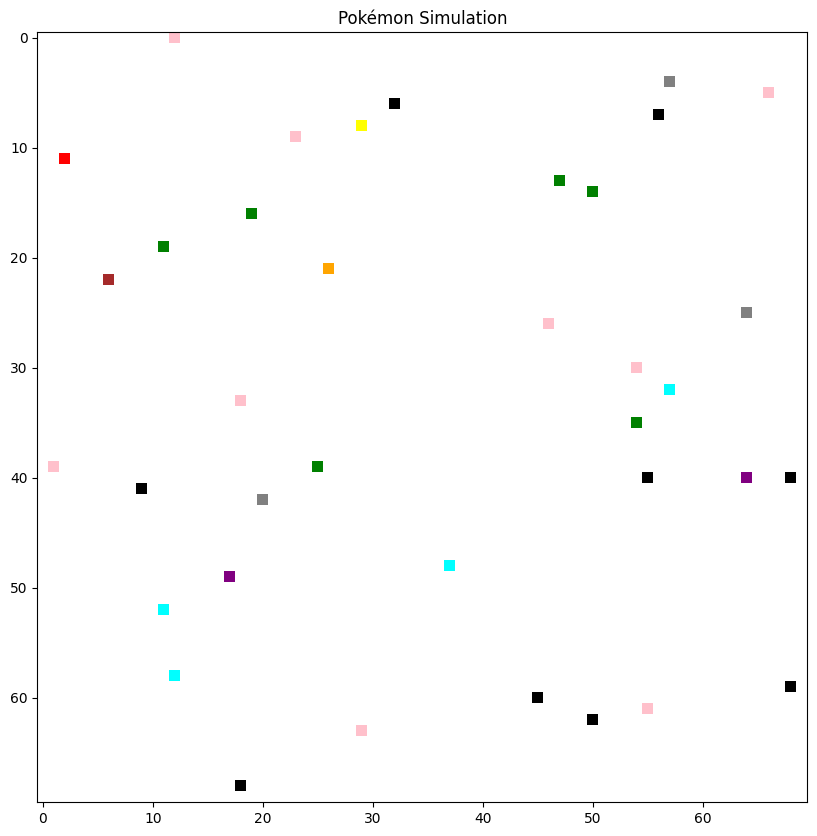

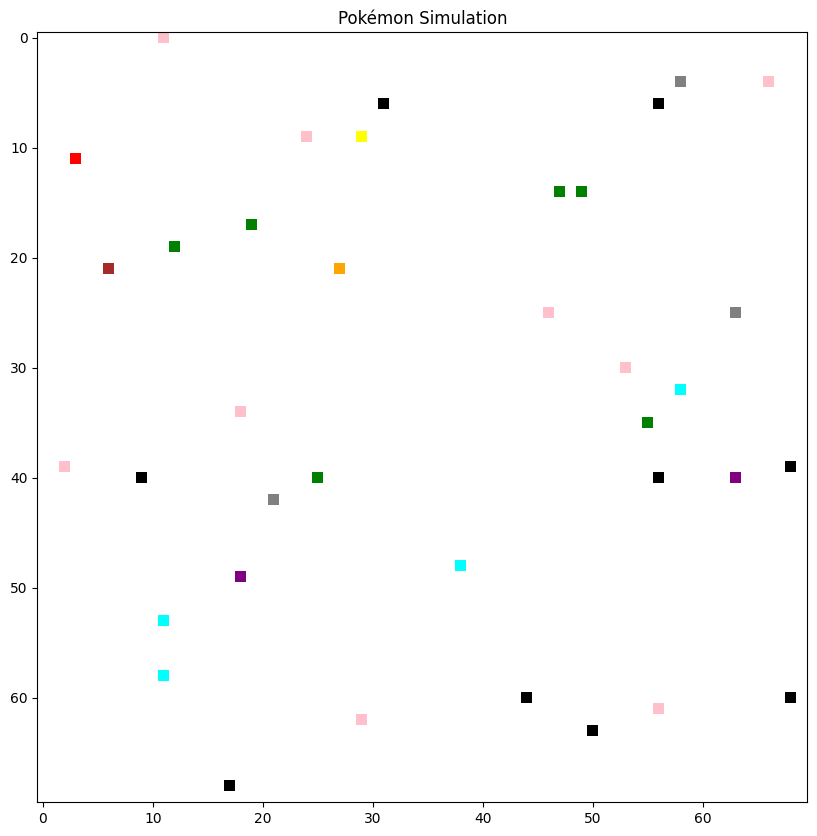

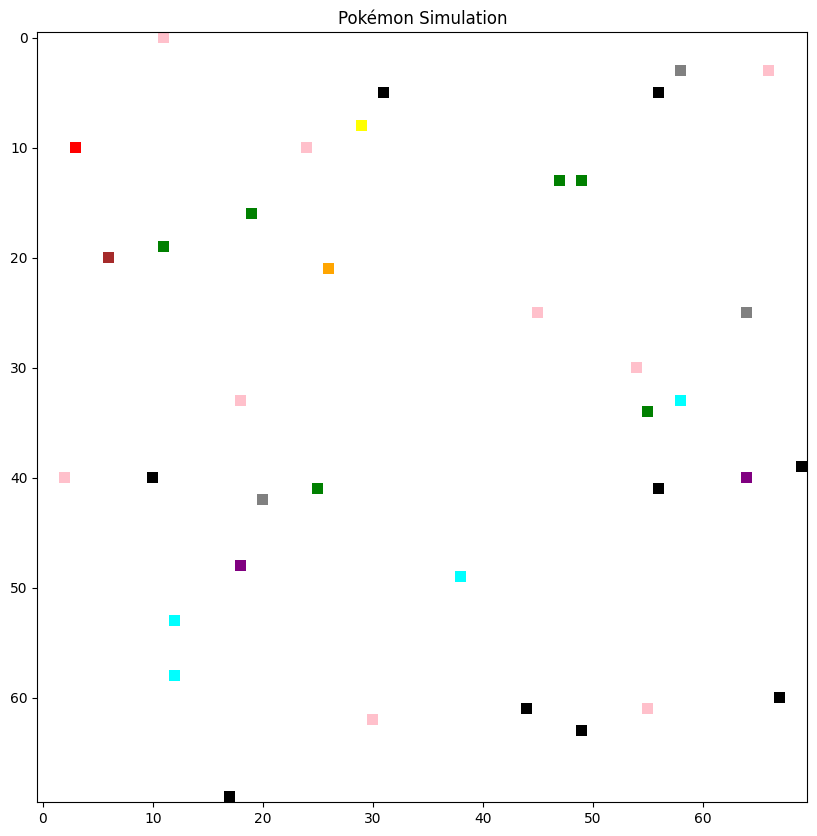

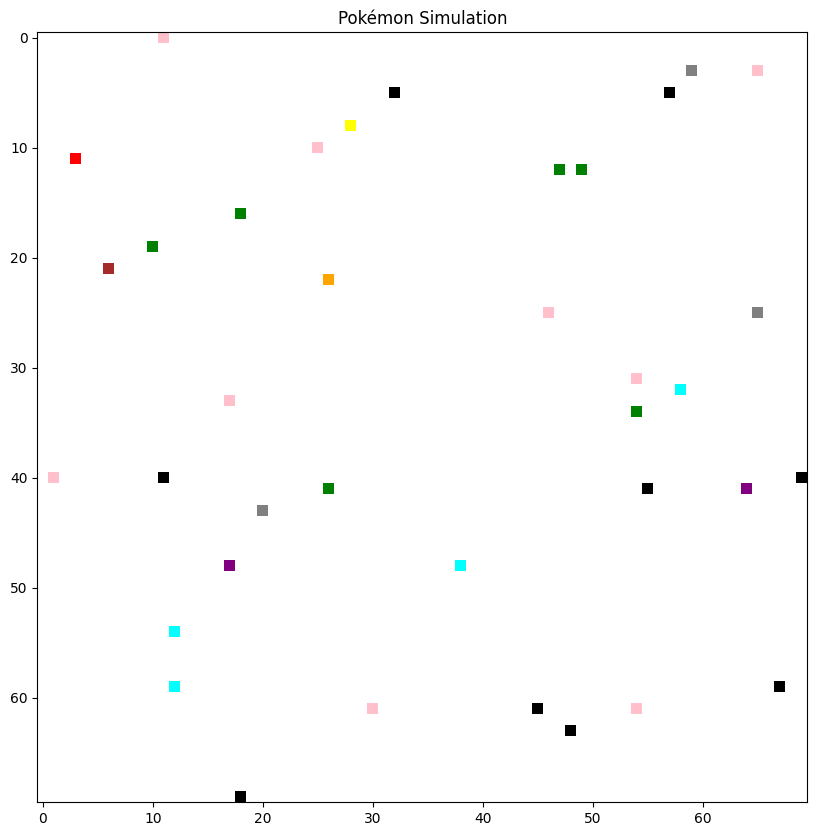

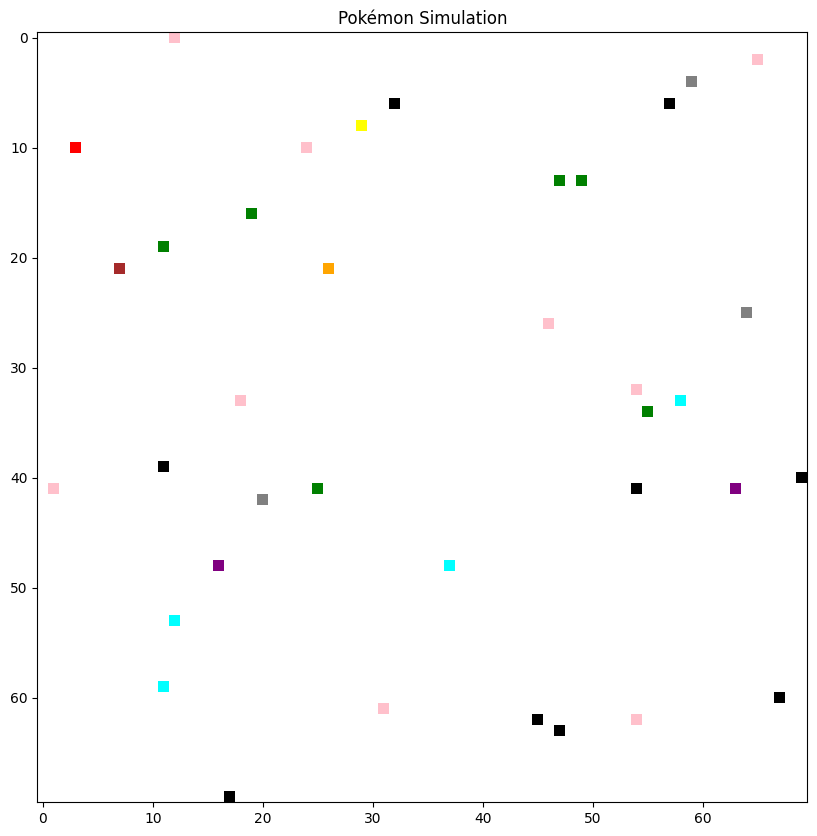

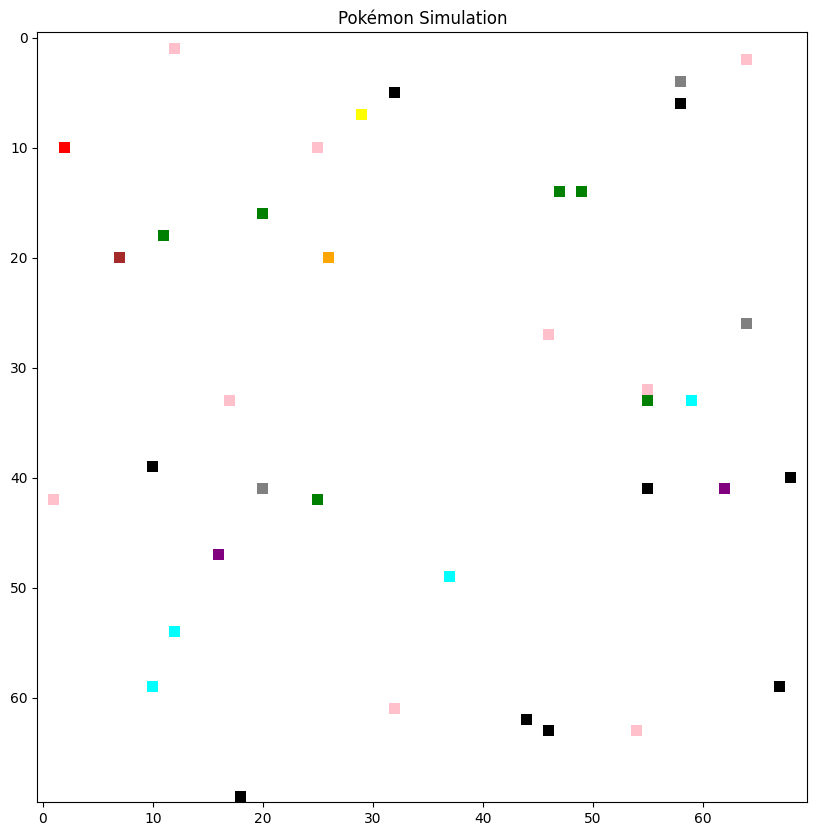

Simulation complete.


'\nfuego: rojo\nagua: azul\nplanta: verde\neléctrico: amarillo\ntierra: marrón\nroca: gris\nvolador: naranja\nfantasma: púrpura\npsíquico: rosa\nlucha: negro\nnormal: cian\n'

In [84]:
def create_pokemons(n):
    types = ["fuego", "agua", "planta", "eléctrico", "tierra", "roca", "volador", "fantasma", "psiquico", "lucha", "normal"]
    pokemons = []
    for i in range(n):
        name = f"Poke{i+1}"
        type_ = random.choice(types)
        pokemons.append(Pokemon(name, type_))
    return pokemons

def initialize_park(park, pokemons):
    index = 0
    for y in range(park.height):
        for x in range(park.width):
            if index < len(pokemons):
                park.add_thing(pokemons[index], (x, y))
                index += 1

def main():
    S = 70
    park = Park2D(S,S)
    pokemons = create_pokemons(S**2)
    initialize_park(park, pokemons)
    park.visualize()

    iterations = 200
    for i in range(iterations):
        park.step()
        park.visualize()


    print("Simulation complete.")
if __name__ == "__main__":
    main()


'''
fuego: rojo
agua: azul
planta: verde
eléctrico: amarillo
tierra: marrón
roca: gris
volador: naranja
fantasma: púrpura
psíquico: rosa
lucha: negro
normal: cian
'''